In [2]:
import tensorflow as tf
import foolbox as fb

import eagerpy as ep
import numpy as np
import matplotlib.pyplot as plt
import pickle
from urllib.request import urlopen

import glob
from PIL import Image
import os
from os import path

In [3]:
# load key value pairs for class detection
imagenet_key_value_pairs = pickle.load(urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl'))

In [4]:
# preprocess image for foolbox
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

In [5]:
# decode predictions number to label
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

In [6]:
# find label idx of prediction
def find_label_id(label):
    for key, value in imagenet_key_value_pairs.items():
        if label in value:
            return key

In [7]:
# Keras Applications are canned architectures with pre-trained weights.
pretrained_model = tf.keras.applications.MobileNetV2(weights='imagenet')
preprocessing = dict()
bounds = (-1, 1)

# tensorflow model into foolbox model
fmodel = fb.TensorFlowModel(pretrained_model, bounds=bounds, preprocessing=preprocessing)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Model accuracy on sample images: 1.0


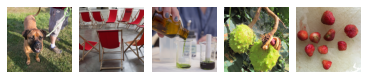

In [8]:
# optionally transform the bounds of the input space of our model
fmodel = fmodel.transform_bounds((0, 1))

# sample images
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=5)

# check accuracy on sample images and plot them
accuracy = fb.utils.accuracy(fmodel, images, labels)
print('Model accuracy on sample images:', accuracy)
# print(labels)
fb.plot.images(images)
plt.show()
plt.close()

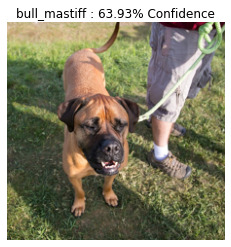

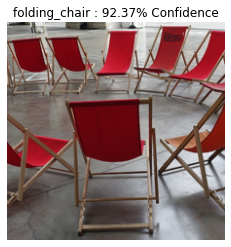

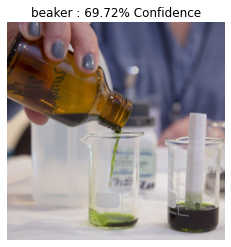

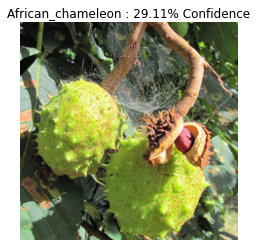

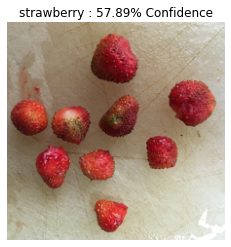

In [9]:
# Predict with pre-trained model
for x in images:
    image = np.expand_dims(x, axis=0)
    image_probs = pretrained_model.predict(image)
    plt.figure()
    plt.imshow(x)  # To change [-1, 1] to [0,1]?
    _, image_class, class_confidence = get_imagenet_label(image_probs)
    plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
    plt.axis('off')
    #plt.close()

Counter: 1
000000000139 598 = home theater
000000000285 294 = brown bear
000000000632 453 = bookcase
000000000724 919 = street sign
000000000776 850 = teddy
000000000785 248 = ski
000000000802 651 = microwave
000000000872 429 = baseball
000000000885 752 = racket
000000001000 450 = bobsled
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


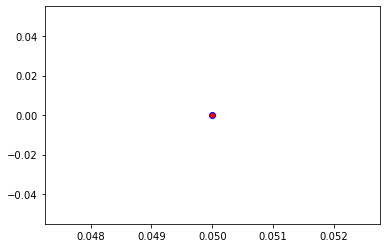

Counter: 2
000000001268 821 = steel arch bridge
000000001296 684 = ocarina
000000001353 857 = throne
000000001425 928 = ice cream
000000001490 693 = paddle
000000001503 526 = desk
000000001532 565 = freight car
000000001584 874 = trolleybus
000000001675 620 = laptop
000000001761 821 = steel arch bridge
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


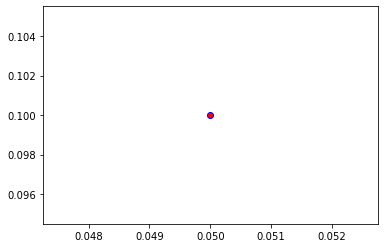

Counter: 3
000000001818 340 = zebra
000000001993 799 = sliding door
000000002006 874 = trolleybus
000000002149 948 = Granny Smith
000000002153 981 = ballplayer
000000002157 123 = crayfish
000000002261 209 = Chesapeake Bay retriever
000000002299 715 = pickelhaube
000000002431 966 = red wine
000000002473 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


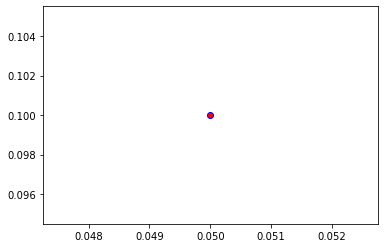

Counter: 4
000000002532 248 = ski
000000002587 954 = banana
000000002592 504 = coffee mug
000000002685 486 = cello
000000002923 864 = wreck
000000003156 739 = potter's wheel
000000003255 140 = alp
000000003501 937 = broccoli
000000003553 703 = park bench
000000003661 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


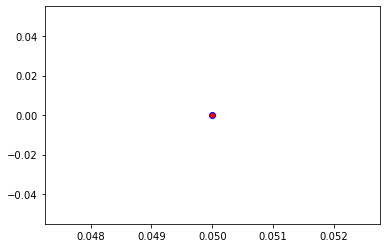

Counter: 5
000000003845 965 = burrito
000000003934 697 = pajama
000000004134 982 = groom
000000004395 906 = Windsor tie
000000004495 831 = studio couch
000000004765 693 = paddle
000000004795 508 = computer keyboard
000000005001 830 = stretcher
000000005037 829 = streetcar
000000005060 564 = four-poster
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


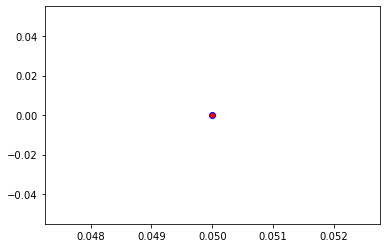

Counter: 6
000000005193 887 = vestment
000000005477 404 = airliner
000000005503 861 = toilet seat
000000005529 248 = ski
000000005586 722 = ping-pong ball
000000005600 941 = acorn squash
000000005992 5 = ram
000000006012 954 = banana
000000006040 829 = streetcar
000000006213 564 = four-poster
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


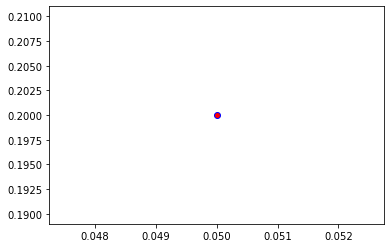

Counter: 7
000000006460 460 = breakwater
000000006471 981 = ballplayer
000000006614 719 = piggy bank
000000006723 358 = pole
000000006763 424 = barbershop
000000006771 862 = torch
000000006818 999 = toilet tissue
000000006894 385 = Indian elephant
000000006954 805 = soccer ball
000000007088 879 = umbrella
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


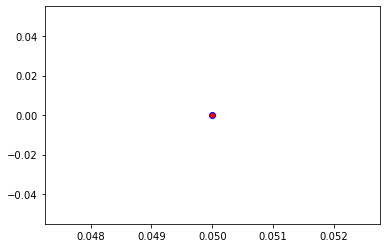

Counter: 8
000000007108 386 = African elephant
000000007278 870 = tricycle
000000007281 354 = Arabian camel
000000007386 870 = tricycle
000000007511 977 = sandbar
000000007574 550 = espresso maker
000000007784 701 = parachute
000000007795 831 = studio couch
000000007816 518 = crash helmet
000000007818 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


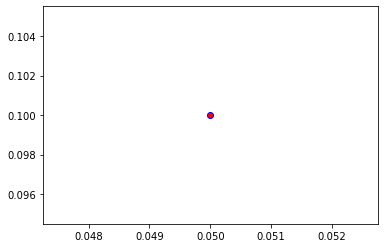

Counter: 9
000000007888 818 = spotlight
000000007977 880 = unicycle
000000007991 66 = corn
000000008021 819 = stage
000000008211 665 = moped
000000008277 924 = guacamole
000000008532 793 = shower cap
000000008629 964 = potpie
000000008690 227 = kelpie
000000008762 920 = traffic light
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


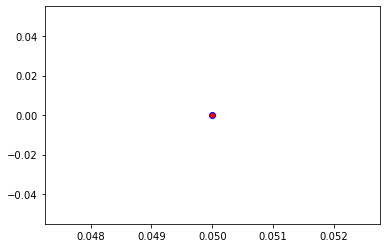

Counter: 10
000000008844 954 = banana
000000008899 860 = tobacco shop
000000009378 793 = shower cap
000000009400 620 = laptop
000000009448 879 = umbrella
000000009483 527 = desktop computer
000000009590 762 = restaurant
000000009769 803 = snowplow
000000009772 736 = pool table
000000009891 407 = ambulance
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


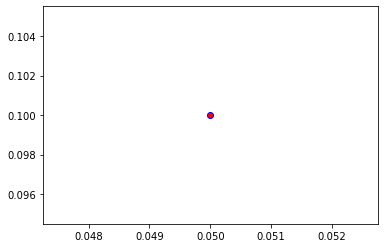

Counter: 11
000000009914 118 = Dungeness crab
000000010092 564 = four-poster
000000010363 285 = Egyptian cat
000000010583 461 = plate
000000010707 862 = torch
000000010764 981 = ballplayer
000000010977 435 = bathtub
000000010995 831 = studio couch
000000011051 982 = groom
000000011122 489 = chainlink fence
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


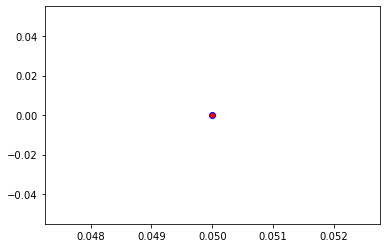

Counter: 12
000000011149 870 = tricycle
000000011197 920 = traffic light
000000011511 562 = fountain
000000011615 919 = street sign
000000011699 745 = projector
000000011760 340 = zebra
000000011813 872 = tripod
000000012062 5 = ram
000000012120 752 = racket
000000012280 799 = sliding door
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


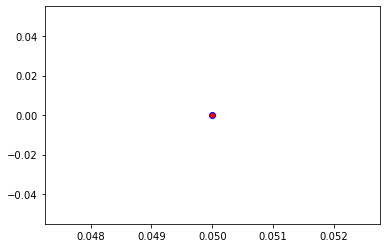

Counter: 13
000000012576 963 = pizza
000000012639 981 = ballplayer
000000012667 528 = dial telephone
000000012670 971 = bubble
000000012748 37 = ox
000000013004 809 = soup bowl
000000013177 665 = moped
000000013201 981 = ballplayer
000000013291 805 = soccer ball
000000013348 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


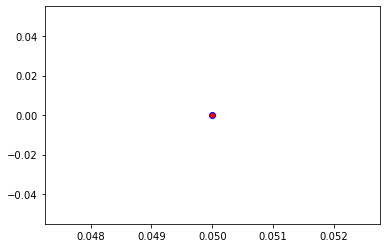

Counter: 14
000000013546 880 = unicycle
000000013597 928 = ice cream
000000013659 620 = laptop
000000013729 700 = paper towel
000000013774 978 = seashore
000000013923 532 = dining table
000000014007 534 = washer
000000014038 747 = punching bag
000000014226 620 = laptop
000000014380 821 = steel arch bridge
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


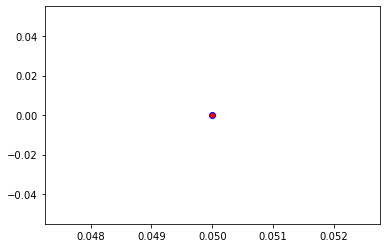

Counter: 15
000000014439 645 = maypole
000000014473 705 = passenger car
000000014831 338 = guinea pig
000000014888 235 = German shepherd
000000015079 964 = potpie
000000015254 948 = Granny Smith
000000015272 920 = traffic light
000000015278 937 = broccoli
000000015335 762 = restaurant
000000015338 829 = streetcar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


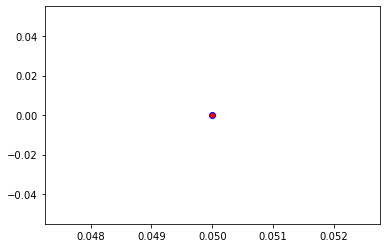

Counter: 16
000000015440 637 = mailbox
000000015497 673 = mouse
000000015517 536 = dock
000000015597 864 = wreck
000000015660 693 = paddle
000000015746 412 = ashcan
000000015751 113 = nail
000000015956 339 = sorrel
000000016010 346 = water buffalo
000000016228 779 = school bus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


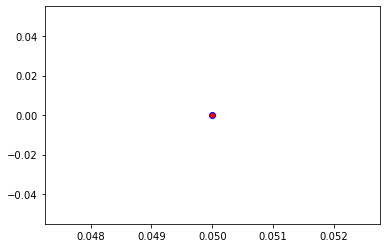

Counter: 17
000000016249 559 = folding chair
000000016439 526 = desk
000000016451 977 = sandbar
000000016502 5 = ram
000000016598 824 = stole
000000016958 556 = fire screen
000000017029 214 = Gordon setter
000000017031 275 = African hunting dog
000000017115 340 = zebra
000000017178 690 = oxcart
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


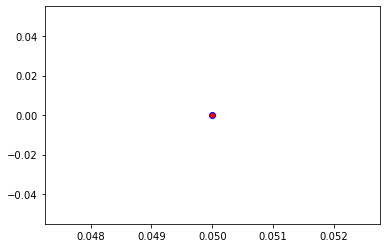

Counter: 18
000000017182 598 = home theater
000000017207 675 = moving van
000000017379 598 = home theater
000000017436 497 = church
000000017627 569 = garbage truck
000000017714 928 = ice cream
000000017899 532 = dining table
000000017905 920 = traffic light
000000017959 701 = parachute
000000018150 740 = power drill
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


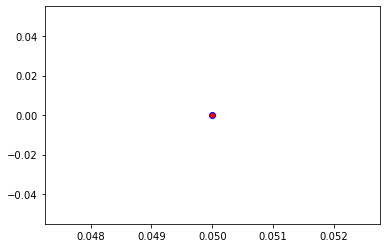

Counter: 19
000000018193 639 = suit
000000018380 461 = plate
000000018491 981 = ballplayer
000000018519 421 = bannister
000000018575 461 = plate
000000018737 670 = motor scooter
000000018770 639 = suit
000000018833 770 = running shoe
000000018837 569 = garbage truck
000000019042 137 = American coot
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


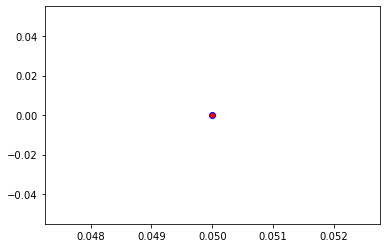

Counter: 20
000000019109 670 = motor scooter
000000019221 937 = broccoli
000000019402 568 = fur coat
000000019432 752 = racket
000000019742 572 = goblet
000000019786 523 = crutch
000000019924 515 = cowboy hat
000000020059 340 = zebra
000000020107 412 = ashcan
000000020247 294 = brown bear
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


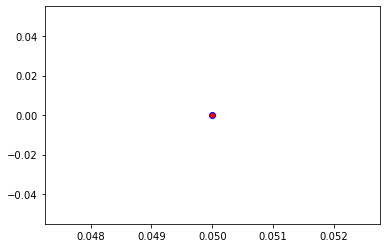

Counter: 21
000000020333 544 = Dutch oven
000000020553 830 = stretcher
000000020571 536 = dock
000000020992 934 = hotdog
000000021167 639 = suit
000000021465 435 = tub
000000021503 964 = potpie
000000021604 639 = suit
000000021839 498 = palace
000000021879 445 = bikini
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


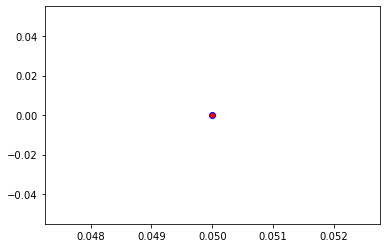

Counter: 22
000000021903 385 = Indian elephant
000000022192 797 = sleeping bag
000000022371 681 = notebook
000000022396 404 = airliner
000000022479 898 = water bottle
000000022589 5 = ram
000000022623 487 = cellular telephone
000000022705 655 = miniskirt
000000022755 633 = loupe
000000022892 237 = miniature pinscher
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


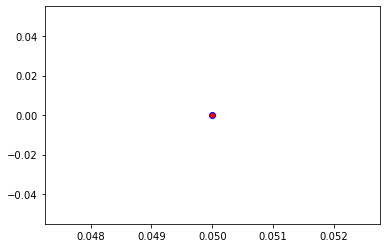

Counter: 23
000000022935 805 = soccer ball
000000022969 9 = ostrich
000000023023 851 = television
000000023034 537 = dogsled
000000023126 515 = cowboy hat
000000023230 99 = goose
000000023272 864 = tow truck
000000023359 248 = ski
000000023666 896 = washbasin
000000023751 701 = parachute
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


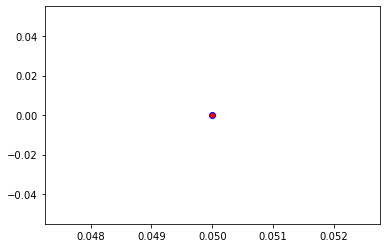

Counter: 24
000000023781 329 = cucumber
000000023899 851 = television
000000023937 296 = ice bear
000000024021 652 = military uniform
000000024027 657 = missile
000000024144 963 = pizza
000000024243 760 = refrigerator
000000024567 121 = king crab
000000024610 532 = dining table
000000024919 386 = African elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


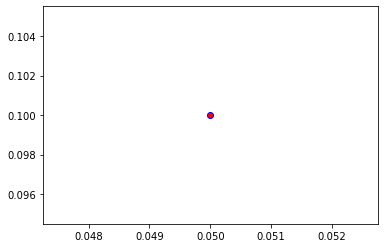

Counter: 25
000000025057 842 = swimming trunks
000000025096 611 = jigsaw puzzle
000000025139 340 = zebra
000000025181 705 = passenger car
000000025228 976 = promontory
000000025386 454 = bookshop
000000025393 617 = lab coat
000000025394 441 = beer glass
000000025424 981 = ballplayer
000000025560 851 = television
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


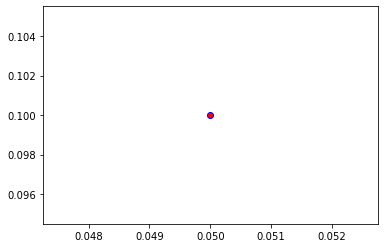

Counter: 26
000000025593 919 = street sign
000000025603 762 = restaurant
000000025986 924 = guacamole
000000026204 324 = cab
000000026465 620 = laptop
000000026564 526 = desk
000000026690 819 = stage
000000026926 637 = mailbox
000000026941 595 = harvester
000000027186 905 = window shade
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


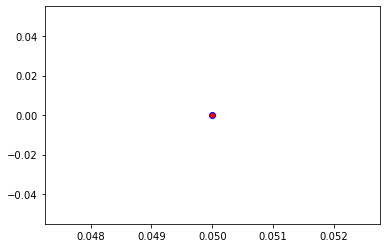

Counter: 27
000000027620 651 = microwave
000000027696 963 = pizza
000000027768 654 = minibus
000000027932 615 = knee pad
000000027972 693 = paddle
000000027982 896 = washbasin
000000028285 497 = church
000000028449 386 = African elephant
000000028452 760 = refrigerator
000000028809 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


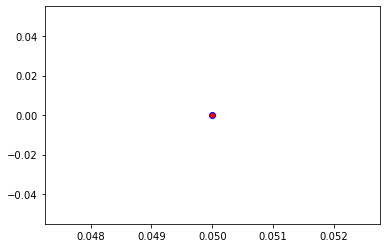

Counter: 28
000000028993 412 = ashcan
000000029187 603 = horse cart
000000029393 159 = Rhodesian ridgeback
000000029397 416 = balance beam
000000029596 905 = window shade
000000029640 909 = wok
000000029675 934 = hotdog
000000029984 879 = umbrella
000000030213 651 = microwave
000000030494 250 = Siberian husky
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


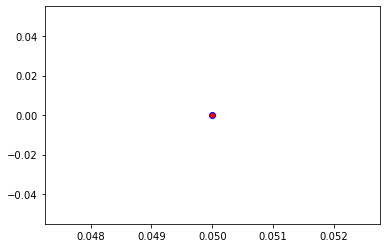

Counter: 29
000000030504 248 = ski
000000030675 565 = freight car
000000030785 924 = guacamole
000000030828 912 = worm fence
000000031050 883 = vase
000000031093 981 = ballplayer
000000031118 645 = maypole
000000031217 752 = racket
000000031248 495 = china cabinet
000000031269 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


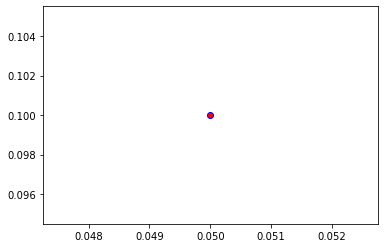

Counter: 30
000000031296 762 = restaurant
000000031322 132 = American egret
000000031620 669 = mosquito net
000000031735 532 = dining table
000000031749 570 = mask
000000031817 518 = crash helmet
000000032038 963 = pizza
000000032081 752 = racket
000000032285 648 = medicine chest
000000032334 105 = ear
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


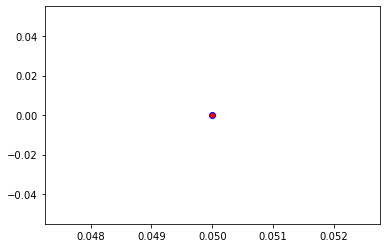

Counter: 31
000000032570 227 = kelpie
000000032610 681 = notebook
000000032735 248 = ski
000000032811 851 = television
000000032817 861 = toilet seat
000000032861 73 = barn
000000032887 979 = valley
000000032901 424 = barbershop
000000032941 412 = ashcan
000000033005 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


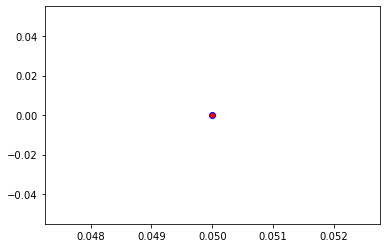

Counter: 32
000000033104 248 = ski
000000033109 569 = garbage truck
000000033114 404 = liner
000000033221 248 = ski
000000033368 248 = ski
000000033638 739 = potter's wheel
000000033707 293 = cheetah
000000033759 429 = baseball
000000033854 627 = limousine
000000034071 695 = padlock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


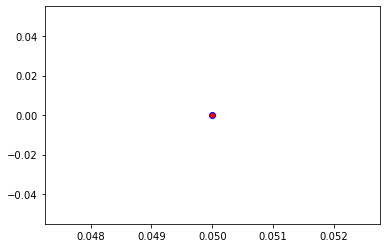

Counter: 33
000000034139 707 = pay-phone
000000034205 937 = broccoli
000000034257 467 = butcher shop
000000034417 509 = confectionery
000000034452 212 = English setter
000000034760 896 = washbasin
000000034873 896 = washbasin
000000035062 797 = sleeping bag
000000035197 491 = chain saw
000000035279 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


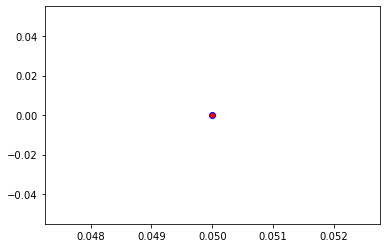

Counter: 34
000000035326 707 = pay-phone
000000035682 762 = restaurant
000000035770 896 = washbasin
000000035963 458 = brass
000000036494 762 = restaurant
000000036539 248 = ski
000000036660 487 = cellular telephone
000000036678 576 = gondola
000000036844 424 = barbershop
000000036861 704 = parking meter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


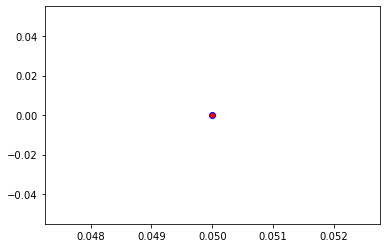

Counter: 35
000000036936 495 = china cabinet
000000037670 861 = toilet seat
000000037689 140 = alp
000000037740 526 = desk
000000037751 671 = mountain bike
000000037777 651 = microwave
000000037988 752 = racket
000000038048 637 = mailbox
000000038070 861 = toilet seat
000000038118 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


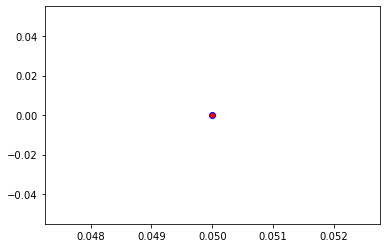

Counter: 36
000000038210 248 = ski
000000038576 527 = desktop computer
000000038678 618 = ladle
000000038825 340 = zebra
000000038829 665 = moped
000000039405 981 = ballplayer
000000039477 905 = window shade
000000039480 752 = racket
000000039484 829 = streetcar
000000039551 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


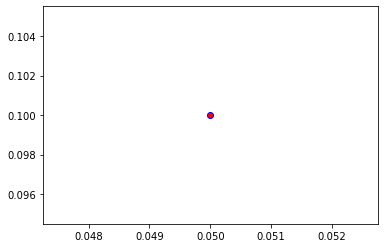

Counter: 37
000000039670 547 = electric locomotive
000000039769 281 = tabby
000000039785 99 = goose
000000039914 413 = rifle
000000039951 752 = racket
000000039956 797 = sleeping bag
000000040036 339 = sorrel
000000040083 762 = restaurant
000000040471 799 = sliding door
000000040757 750 = quilt
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


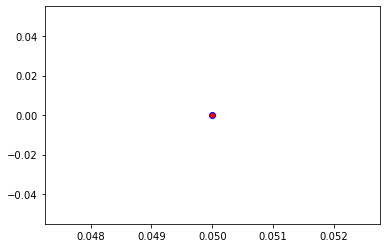

Counter: 38
000000041488 919 = street sign
000000041633 555 = fire engine
000000041635 188 = wire-haired fox terrier
000000041872 651 = microwave
000000041888 305 = dung beetle
000000041990 248 = ski
000000042070 874 = trolleybus
000000042102 639 = suit
000000042178 839 = suspension bridge
000000042276 788 = shoe shop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


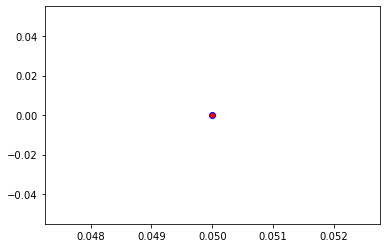

Counter: 39
000000042296 296 = ice bear
000000042528 487 = cellular telephone
000000042563 803 = snowplow
000000042628 606 = iron
000000042888 919 = street sign
000000042889 681 = notebook
000000043314 248 = ski
000000043435 974 = geyser
000000043581 924 = guacamole
000000043737 409 = analog clock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


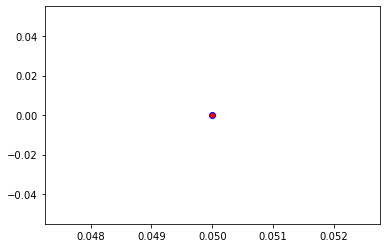

Counter: 40
000000043816 981 = ballplayer
000000044068 850 = teddy
000000044195 248 = ski
000000044260 41 = hip
000000044279 424 = barbershop
000000044590 671 = mountain bike
000000044652 744 = projectile
000000044699 5 = ram
000000044877 752 = racket
000000045070 515 = cowboy hat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


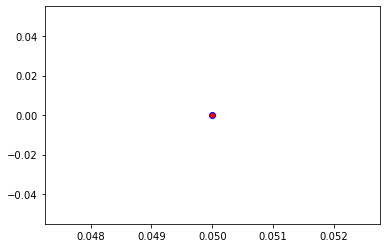

Counter: 41
000000045090 851 = television
000000045229 495 = china cabinet
000000045472 953 = pineapple
000000045550 461 = plate
000000045596 580 = greenhouse
000000045728 924 = guacamole
000000046031 620 = laptop
000000046048 750 = quilt
000000046252 981 = ballplayer
000000046378 284 = Siamese cat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


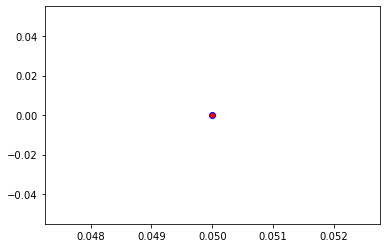

Counter: 42
000000046463 933 = cheeseburger
000000046497 780 = schooner
000000046804 5 = ram
000000046872 867 = trailer truck
000000047010 9 = ostrich
000000047112 963 = pizza
000000047121 435 = bathtub
000000047571 603 = horse cart
000000047585 982 = groom
000000047740 645 = maypole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


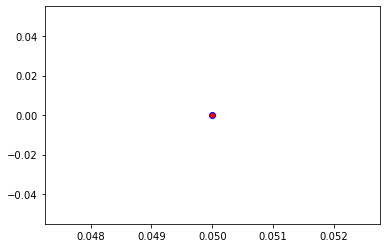

Counter: 43
000000047769 532 = dining table
000000047801 929 = ice lolly
000000047819 603 = horse cart
000000047828 713 = pier
000000048153 502 = clog
000000048396 697 = pajama
000000048504 386 = African elephant
000000048555 864 = wreck
000000048564 593 = harmonica
000000048924 671 = mountain bike
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


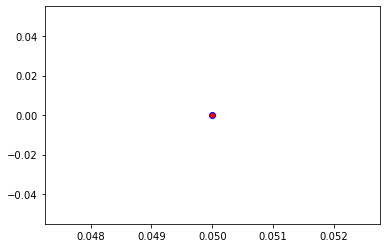

Counter: 44
000000049060 820 = steam locomotive
000000049091 134 = crane
000000049259 703 = park bench
000000049269 208 = Labrador retriever
000000049759 890 = volleyball
000000049761 346 = water buffalo
000000049810 285 = Egyptian cat
000000050006 975 = lakeside
000000050145 444 = bicycle-built-for-two
000000050149 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


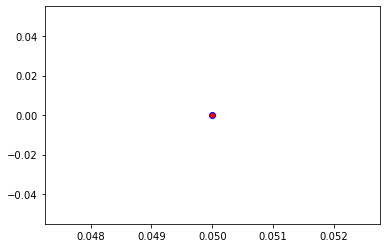

Counter: 45
000000050165 660 = mobile home
000000050326 248 = ski
000000050331 28 = pot
000000050380 161 = basset
000000050638 805 = soccer ball
000000050679 950 = orange
000000050811 572 = goblet
000000050828 831 = studio couch
000000050844 850 = teddy
000000050896 950 = orange
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


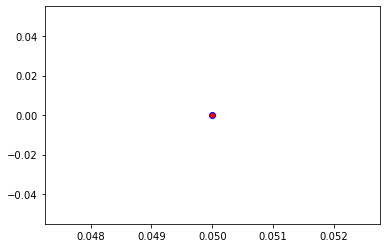

Counter: 46
000000050943 460 = breakwater
000000051008 620 = laptop
000000051309 346 = water buffalo
000000051314 148 = killer whale
000000051326 607 = jack-o'-lantern
000000051598 648 = medicine chest
000000051610 681 = notebook
000000051712 248 = ski
000000051738 750 = quilt
000000051938 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


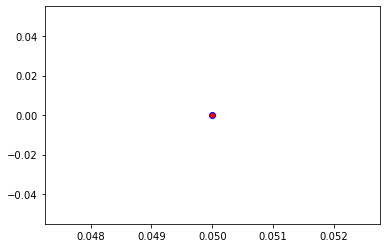

Counter: 47
000000051961 565 = freight car
000000051976 148 = killer whale
000000052007 654 = minibus
000000052017 318 = wing
000000052412 318 = wing
000000052413 419 = Band Aid
000000052462 340 = zebra
000000052507 693 = paddle
000000052565 37 = ox
000000052591 792 = shovel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


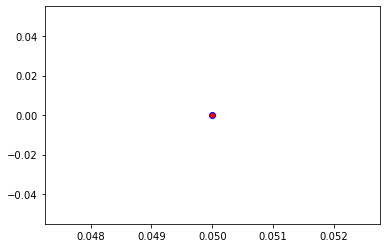

Counter: 48
000000052891 232 = Border collie
000000052996 469 = caldron
000000053505 648 = medicine chest
000000053529 412 = ashcan
000000053624 386 = African elephant
000000053626 248 = ski
000000053909 605 = iPod
000000053994 704 = parking meter
000000054123 340 = zebra
000000054164 693 = paddle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


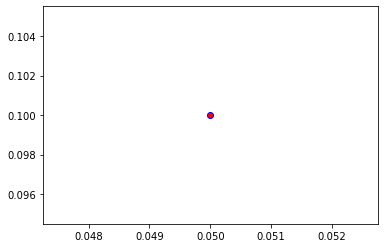

Counter: 49
000000054592 248 = ski
000000054593 429 = baseball
000000054605 928 = ice cream
000000054628 832 = stupa
000000054654 521 = Crock Pot
000000054931 37 = ox
000000054967 920 = traffic light
000000055002 861 = toilet seat
000000055022 444 = bicycle-built-for-two
000000055072 288 = leopard
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


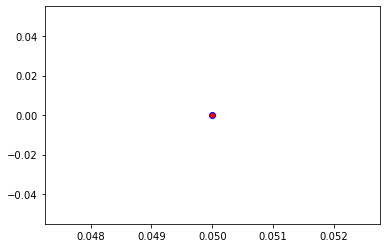

Counter: 50
000000055150 612 = jinrikisha
000000055167 654 = minibus
000000055299 978 = seashore
000000055528 903 = wig
000000055950 752 = racket
000000056127 620 = laptop
000000056288 933 = cheeseburger
000000056344 664 = monitor
000000056350 861 = toilet seat
000000056545 16 = bulbul
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


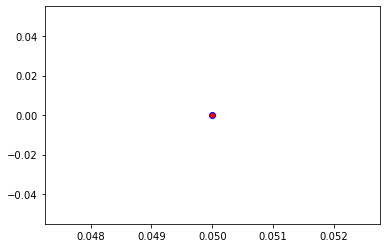

Counter: 51
000000057027 385 = Indian elephant
000000057149 920 = traffic light
000000057150 850 = teddy
000000057232 765 = rocking chair
000000057238 760 = refrigerator
000000057244 634 = lumbermill
000000057597 805 = soccer ball
000000057672 472 = canoe
000000057725 821 = steel arch bridge
000000057760 977 = sandbar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


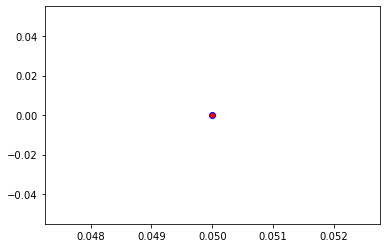

Counter: 52
000000058029 861 = toilet seat
000000058111 282 = tiger cat
000000058350 457 = bow tie
000000058384 385 = Indian elephant
000000058393 703 = park bench
000000058539 639 = suit
000000058636 919 = street sign
000000058655 442 = bell cote
000000058705 433 = bathing cap
000000059044 788 = shoe shop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


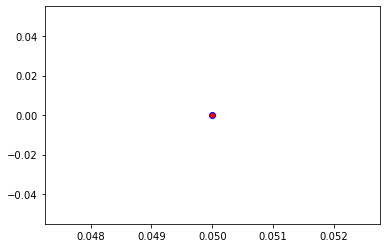

Counter: 53
000000059386 293 = cheetah
000000059598 681 = notebook
000000059635 562 = fountain
000000059920 861 = toilet seat
000000060052 568 = fur coat
000000060090 547 = electric locomotive
000000060102 805 = soccer ball
000000060347 843 = swing
000000060363 409 = analog clock
000000060449 706 = patio
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


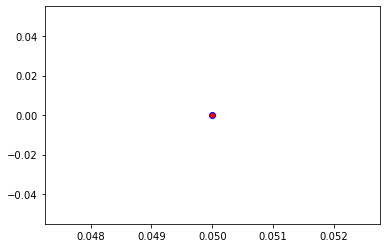

Counter: 54
000000060507 981 = ballplayer
000000060770 340 = zebra
000000060823 37 = ox
000000060835 232 = Border collie
000000060855 950 = orange
000000060886 981 = ballplayer
000000060899 452 = bonnet
000000060932 982 = groom
000000061108 671 = mountain bike
000000061171 37 = ox
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


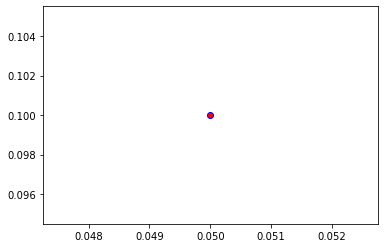

Counter: 55
000000061268 829 = streetcar
000000061333 431 = bassinet
000000061418 642 = marimba
000000061471 534 = dishwasher
000000061584 880 = unicycle
000000061658 938 = cauliflower
000000061747 248 = ski
000000061960 655 = miniskirt
000000062025 896 = washbasin
000000062353 853 = thatch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


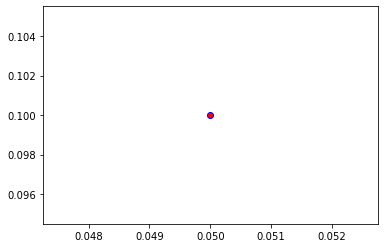

Counter: 56
000000062355 981 = ballplayer
000000062554 937 = broccoli
000000062692 752 = racket
000000062808 963 = pizza
000000063047 929 = ice lolly
000000063154 693 = paddle
000000063552 463 = bucket
000000063602 620 = laptop
000000063740 527 = desktop computer
000000063965 910 = wooden spoon
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


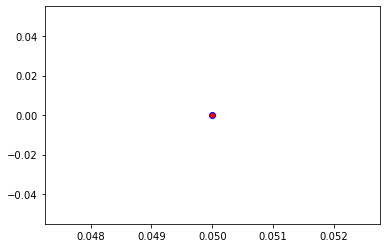

Counter: 57
000000064084 930 = French loaf
000000064359 340 = zebra
000000064462 248 = ski
000000064495 704 = parking meter
000000064499 340 = zebra
000000064523 439 = bearskin
000000064574 413 = rifle
000000064718 752 = racket
000000064868 263 = Pembroke
000000064898 693 = paddle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


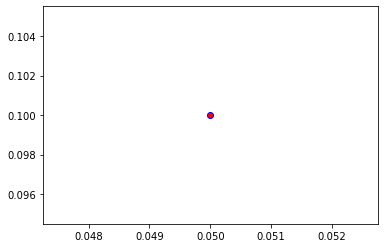

Counter: 58
000000065074 750 = quilt
000000065288 704 = parking meter
000000065350 615 = knee pad
000000065455 41 = whiptail
000000065485 717 = pickup
000000065736 752 = racket
000000065798 981 = ballplayer
000000066038 879 = umbrella
000000066135 547 = electric locomotive
000000066231 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


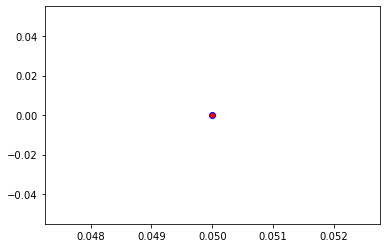

Counter: 59
000000066523 669 = mosquito net
000000066561 5 = ram
000000066635 526 = desk
000000066706 692 = packet
000000066771 503 = cocktail shaker
000000066817 461 = plate
000000066841 423 = barber chair
000000066886 929 = ice lolly
000000066926 931 = bagel
000000067180 445 = bikini
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


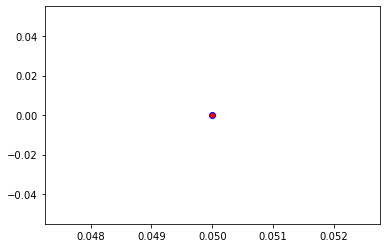

Counter: 60
000000067213 609 = jeep
000000067310 569 = garbage truck
000000067315 797 = sleeping bag
000000067406 701 = parachute
000000067534 451 = bolo tie
000000067616 829 = streetcar
000000067896 409 = analog clock
000000068078 896 = washbasin
000000068093 670 = motor scooter
000000068286 831 = studio couch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


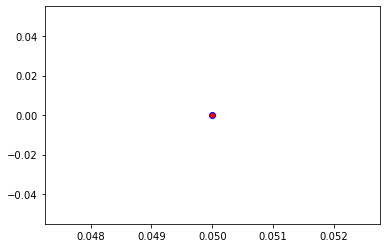

Counter: 61
000000068387 981 = ballplayer
000000068409 715 = pickelhaube
000000068628 880 = unicycle
000000068765 673 = mouse
000000068833 762 = restaurant
000000068933 340 = zebra
000000069106 340 = zebra
000000069138 920 = traffic light
000000069213 612 = jinrikisha
000000069224 700 = paper towel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


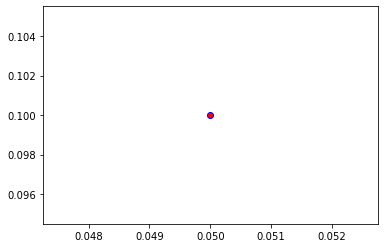

Counter: 62
000000069356 614 = kimono
000000069795 840 = swab
000000070048 809 = soup bowl
000000070158 340 = zebra
000000070229 658 = mitten
000000070254 547 = electric locomotive
000000070739 813 = spatula
000000070774 665 = moped
000000071226 180 = American Staffordshire terrier
000000071451 750 = quilt
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


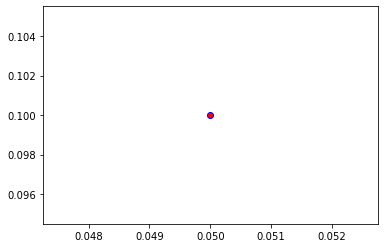

Counter: 63
000000071711 895 = warplane
000000071756 295 = American black bear
000000071877 634 = lumbermill
000000071938 487 = cellular telephone
000000072281 880 = unicycle
000000072795 981 = ballplayer
000000072813 180 = American Staffordshire terrier
000000072852 480 = cash machine
000000073118 850 = teddy
000000073153 825 = stone wall
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


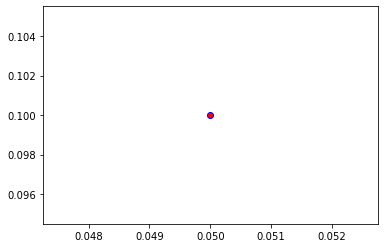

Counter: 64
000000073326 760 = refrigerator
000000073533 398 = abacus
000000073702 830 = stretcher
000000073946 838 = sunscreen
000000074058 879 = umbrella
000000074092 752 = racket
000000074200 749 = quill
000000074209 909 = wok
000000074256 824 = stole
000000074457 978 = seashore
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


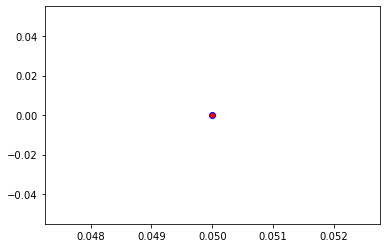

Counter: 65
000000074646 405 = airship
000000074733 415 = bakery
000000074860 802 = snowmobile
000000075393 105 = ear
000000075456 963 = pizza
000000075612 620 = laptop
000000076211 498 = cinema
000000076261 895 = warplane
000000076416 734 = police van
000000076417 245 = French bulldog
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


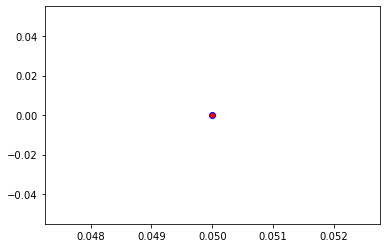

Counter: 66
000000076468 752 = racket
000000076547 612 = jinrikisha
000000076625 829 = streetcar
000000076731 418 = ballpoint
000000077396 851 = television
000000077460 701 = parachute
000000077595 285 = Egyptian cat
000000078032 706 = patio
000000078170 851 = television
000000078266 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


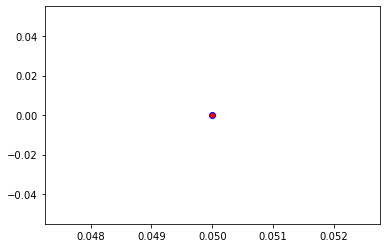

Counter: 67
000000078404 703 = park bench
000000078420 620 = laptop
000000078426 281 = tabby
000000078565 914 = yawl
000000078748 665 = moped
000000078823 191 = Airedale
000000078843 515 = cowboy hat
000000078915 752 = racket
000000078959 954 = banana
000000079014 441 = beer glass
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


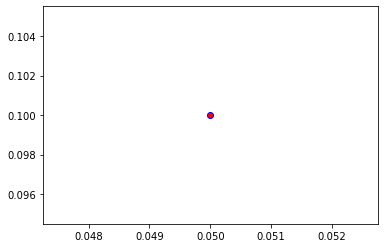

Counter: 68
000000079031 472 = canoe
000000079034 358 = pole
000000079144 367 = chimpanzee
000000079188 288 = leopard
000000079229 354 = Arabian camel
000000079408 919 = street sign
000000079565 354 = Arabian camel
000000079588 498 = palace
000000079651 440 = beer bottle
000000079837 536 = dock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


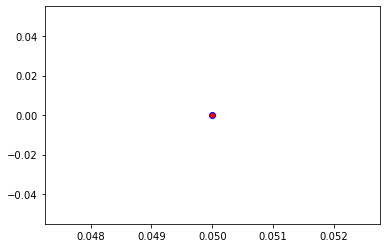

Counter: 69
000000079969 752 = racket
000000080022 752 = racket
000000080057 850 = teddy
000000080153 248 = ski
000000080273 248 = ski
000000080274 386 = African elephant
000000080340 775 = sarong
000000080413 485 = CD player
000000080659 603 = horse cart
000000080666 285 = Egyptian cat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


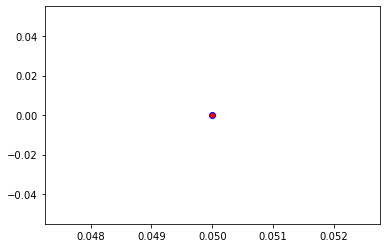

Counter: 70
000000080671 248 = ski
000000080932 762 = restaurant
000000080949 620 = laptop
000000081061 765 = rocking chair
000000081394 569 = garbage truck
000000081594 879 = umbrella
000000081738 478 = carton
000000081766 244 = Tibetan mastiff
000000081988 693 = paddle
000000082085 705 = passenger car
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


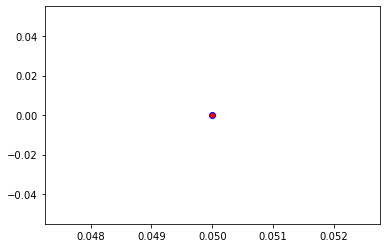

Counter: 71
000000082180 703 = park bench
000000082688 793 = shower cap
000000082696 169 = borzoi
000000082715 2 = great white shark
000000082765 750 = quilt
000000082807 207 = golden retriever
000000082812 466 = bullet train
000000082821 449 = boathouse
000000082846 874 = trolleybus
000000082986 358 = pole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


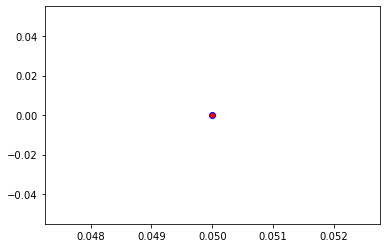

Counter: 72
000000083113 354 = Arabian camel
000000083172 752 = racket
000000083531 467 = butcher shop
000000083540 140 = alp
000000084031 981 = ballplayer
000000084170 609 = jeep
000000084241 618 = ladle
000000084270 877 = turnstile
000000084362 198 = standard schnauzer
000000084431 965 = burrito
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


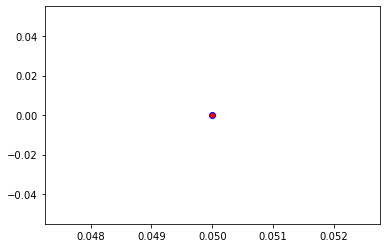

Counter: 73
000000084477 879 = umbrella
000000084492 562 = fountain
000000084650 155 = Shih-Tzu
000000084664 461 = plate
000000084674 929 = ice lolly
000000084752 895 = warplane
000000085089 441 = beer glass
000000085157 697 = pajama
000000085195 928 = ice cream
000000085329 903 = wig
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


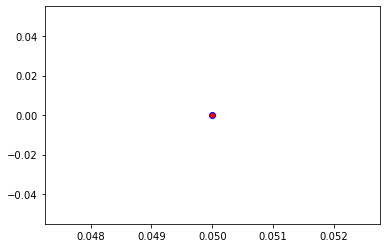

Counter: 74
000000085376 670 = motor scooter
000000085478 296 = ice bear
000000085576 999 = toilet tissue
000000085665 557 = flagpole
000000085682 140 = alp
000000085772 752 = racket
000000085823 340 = zebra
000000085911 879 = umbrella
000000086220 874 = trolleybus
000000086483 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


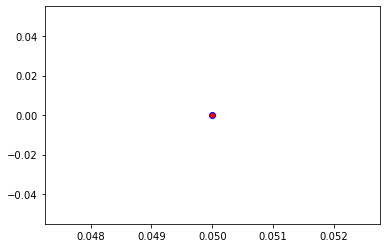

Counter: 75
000000086582 681 = notebook
000000086755 537 = dogsled
000000086956 824 = stole
000000087038 880 = unicycle
000000087144 703 = park bench
000000087244 447 = binoculars
000000087470 37 = ox
000000087476 422 = barbell
000000087742 28 = pot
000000087875 898 = water bottle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


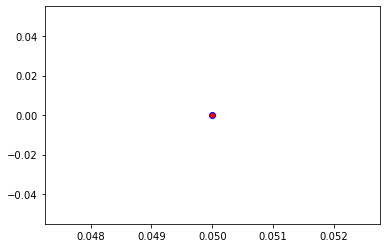

Counter: 76
000000088040 461 = plate
000000088218 920 = traffic light
000000088250 386 = African elephant
000000088265 603 = horse cart
000000088269 809 = soup bowl
000000088345 892 = wall clock
000000088432 637 = mailbox
000000088462 779 = school bus
000000088485 752 = racket
000000088848 920 = traffic light
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


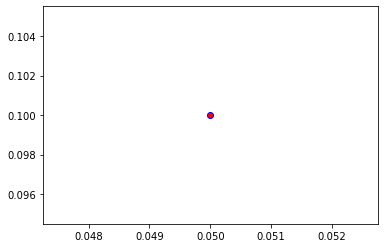

Counter: 77
000000088951 703 = park bench
000000088970 752 = racket
000000089045 831 = studio couch
000000089078 248 = ski
000000089271 281 = tabby
000000089296 602 = horizontal bar
000000089556 734 = police van
000000089648 615 = knee pad
000000089670 415 = bakery
000000089697 562 = fountain
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


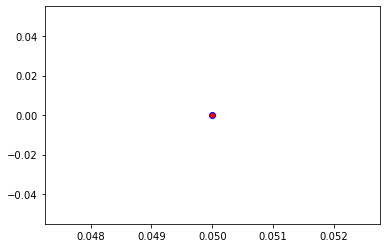

Counter: 78
000000089761 896 = washbasin
000000089880 176 = Saluki
000000090003 267 = standard poodle
000000090062 37 = ox
000000090108 435 = bathtub
000000090155 547 = electric locomotive
000000090208 867 = trailer truck
000000090284 752 = racket
000000090631 895 = warplane
000000090891 982 = groom
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


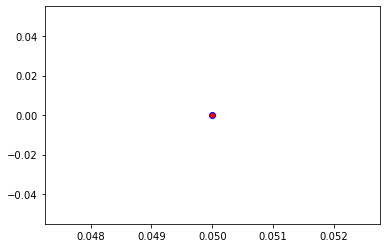

Counter: 79
000000090956 248 = ski
000000091406 415 = bakery
000000091495 981 = ballplayer
000000091500 683 = oboe
000000091615 651 = microwave
000000091619 919 = street sign
000000091654 809 = soup bowl
000000091779 934 = hotdog
000000091921 340 = zebra
000000092053 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


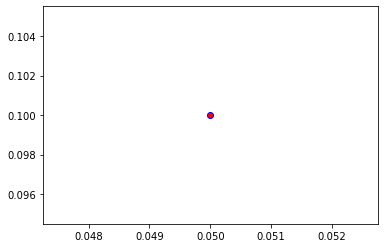

Counter: 80
000000092091 593 = harmonica
000000092124 861 = toilet seat
000000092177 470 = candle
000000092416 639 = suit
000000092660 937 = broccoli
000000092839 296 = ice bear
000000092939 762 = restaurant
000000093154 920 = traffic light
000000093261 842 = swimming trunks
000000093353 941 = acorn squash
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


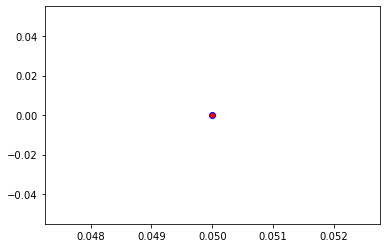

Counter: 81
000000093437 499 = cleaver
000000093717 248 = ski
000000093965 340 = zebra
000000094157 442 = bell cote
000000094185 454 = bookshop
000000094326 703 = park bench
000000094336 896 = washbasin
000000094614 248 = ski
000000094751 920 = traffic light
000000094852 101 = tusker
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


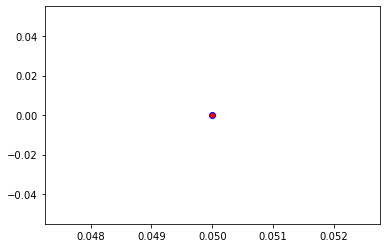

Counter: 82
000000094871 5 = ram
000000094944 140 = alp
000000095069 483 = castle
000000095155 248 = ski
000000095707 813 = spatula
000000095786 504 = coffee mug
000000095843 757 = recreational vehicle
000000095862 981 = ballplayer
000000095899 134 = crane
000000096001 623 = letter opener
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


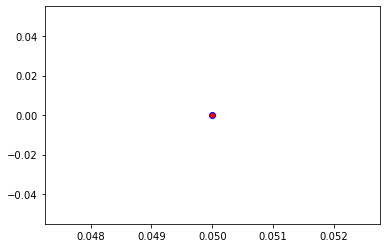

Counter: 83
000000096427 752 = racket
000000096493 434 = bath towel
000000096549 404 = airliner
000000096825 140 = alp
000000096960 296 = ice bear
000000097022 651 = microwave
000000097230 386 = African elephant
000000097278 248 = ski
000000097337 598 = home theater
000000097585 883 = vase
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


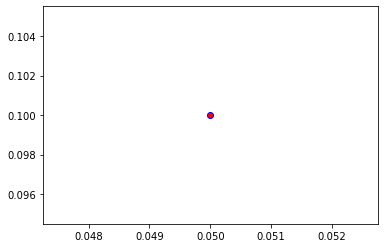

Counter: 84
000000097679 436 = beach wagon
000000097924 807 = solar dish
000000097988 582 = grocery store
000000097994 526 = desk
000000098018 424 = barbershop
000000098261 11 = goldfinch
000000098287 792 = shovel
000000098392 409 = analog clock
000000098497 668 = mosque
000000098520 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


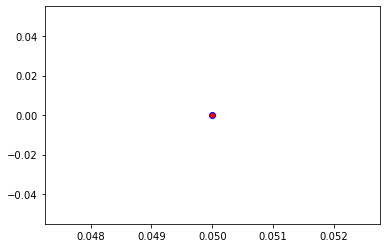

Counter: 85
000000098633 949 = strawberry
000000098716 703 = park bench
000000098839 664 = monitor
000000098853 752 = racket
000000099024 456 = bow
000000099039 762 = restaurant
000000099053 809 = soup bowl
000000099054 404 = airliner
000000099114 612 = jinrikisha
000000099182 918 = crossword puzzle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


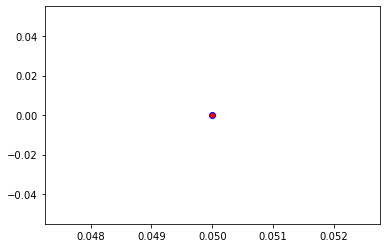

Counter: 86
000000099242 248 = ski
000000099428 848 = tape player
000000099810 910 = wooden spoon
000000100238 852 = tennis ball
000000100274 536 = dock
000000100283 762 = restaurant
000000100428 457 = bow tie
000000100489 16 = bulbul
000000100510 339 = sorrel
000000100582 924 = guacamole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


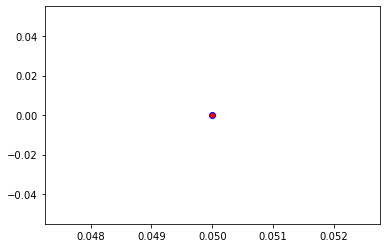

Counter: 87
000000100624 487 = cellular telephone
000000100723 430 = basketball
000000101022 919 = street sign
000000101068 429 = baseball
000000101420 721 = pillow
000000101762 880 = unicycle
000000101780 67 = dam
000000101787 895 = warplane
000000101884 498 = cinema
000000102331 671 = mountain bike
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


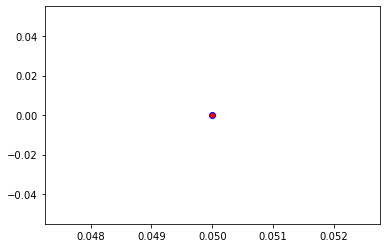

Counter: 88
000000102356 670 = motor scooter
000000102411 665 = moped
000000102644 861 = toilet seat
000000102707 804 = soap dispenser
000000102805 808 = sombrero
000000102820 122 = American lobster
000000103548 340 = zebra
000000103585 896 = washbasin
000000103723 385 = Indian elephant
000000104119 100 = black swan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


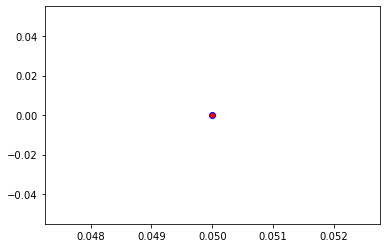

Counter: 89
000000104198 919 = street sign
000000104424 752 = racket
000000104455 340 = zebra
000000104572 611 = jigsaw puzzle
000000104603 295 = American black bear
000000104612 937 = broccoli
000000104619 293 = cheetah
000000104666 541 = drum
000000104669 461 = plate
000000104782 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


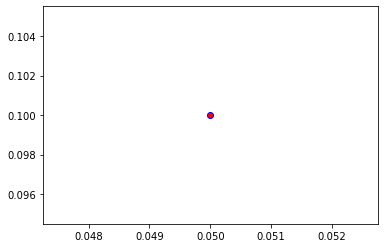

Counter: 90
000000104803 861 = toilet seat
000000105014 641 = maraca
000000105249 861 = toilet seat
000000105264 37 = ox
000000105335 942 = butternut squash
000000105455 442 = bell cote
000000105912 637 = mailbox
000000105923 829 = streetcar
000000106048 757 = recreational vehicle
000000106235 846 = table lamp
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


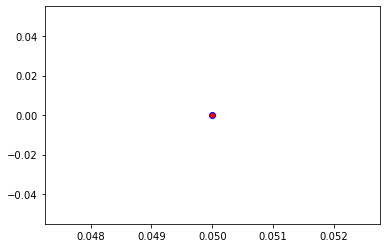

Counter: 91
000000106266 941 = acorn squash
000000106281 67 = dam
000000106330 850 = teddy
000000106389 281 = tabby
000000106563 884 = vault
000000106757 385 = Indian elephant
000000106881 19 = chickadee
000000106912 880 = unicycle
000000107087 785 = seat belt
000000107094 791 = shopping cart
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


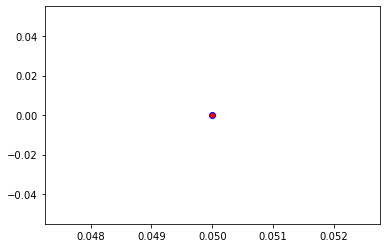

Counter: 92
000000107226 249 = malamute
000000107339 598 = home theater
000000107554 412 = ashcan
000000107851 346 = water buffalo
000000108026 508 = computer keyboard
000000108244 478 = carton
000000108253 461 = plate
000000108440 703 = park bench
000000108495 608 = jean
000000108503 978 = seashore
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


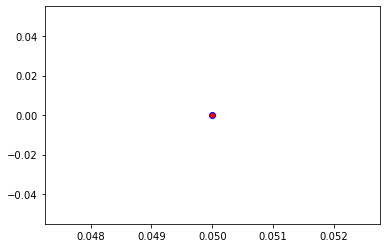

Counter: 93
000000108864 386 = African elephant
000000109055 880 = unicycle
000000109118 652 = military uniform
000000109313 740 = power drill
000000109441 807 = solar dish
000000109798 933 = cheeseburger
000000109827 850 = teddy
000000109900 864 = tow truck
000000109916 891 = waffle iron
000000109976 651 = microwave
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


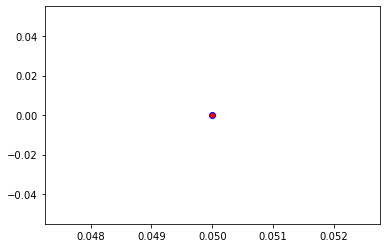

Counter: 94
000000109992 792 = shovel
000000110042 575 = golfcart
000000110211 340 = zebra
000000110282 920 = traffic light
000000110359 318 = wing
000000110449 722 = ping-pong ball
000000110638 385 = Indian elephant
000000110721 466 = bullet train
000000110784 829 = streetcar
000000110884 896 = washbasin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


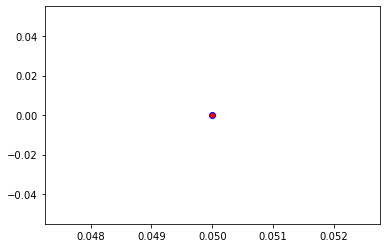

Counter: 95
000000110972 295 = American black bear
000000110999 868 = tray
000000111036 827 = stove
000000111086 498 = cinema
000000111179 442 = bell cote
000000111207 981 = ballplayer
000000111609 750 = quilt
000000111951 896 = washbasin
000000112110 674 = mousetrap
000000112298 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


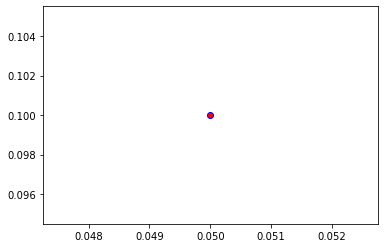

Counter: 96
000000112378 67 = dam
000000112626 637 = mailbox
000000112634 288 = leopard
000000112798 281 = tabby
000000112997 848 = tape player
000000113051 576 = gondola
000000113235 355 = llama
000000113354 340 = zebra
000000113403 850 = teddy
000000113589 329 = cucumber
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


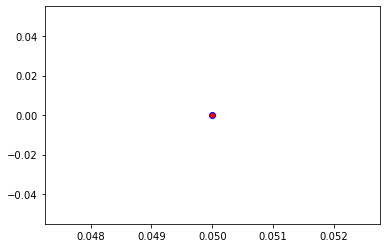

Counter: 97
000000113720 762 = restaurant
000000113867 442 = bell cote
000000114049 518 = crash helmet
000000114770 744 = projectile
000000114871 954 = banana
000000114884 608 = jean
000000114907 583 = guillotine
000000115118 547 = electric locomotive
000000115245 830 = stretcher
000000115870 831 = studio couch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


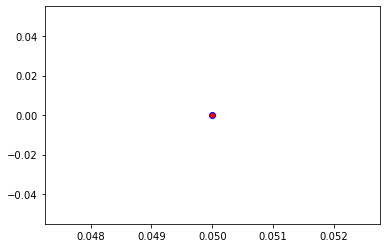

Counter: 98
000000115885 620 = laptop
000000115898 693 = paddle
000000115946 920 = traffic light
000000116068 775 = sarong
000000116206 924 = guacamole
000000116208 963 = pizza
000000116362 461 = plate
000000116439 394 = sturgeon
000000116479 564 = four-poster
000000116589 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


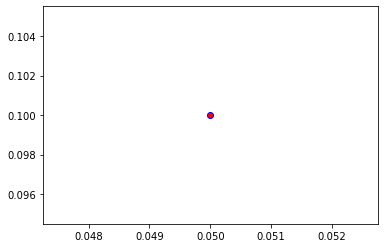

Counter: 99
000000116825 284 = Siamese cat
000000117197 471 = cannon
000000117374 245 = French bulldog
000000117425 470 = candle
000000117492 723 = pinwheel
000000117525 245 = French bulldog
000000117645 314 = cockroach
000000117719 762 = restaurant
000000117744 752 = racket
000000117908 247 = Saint Bernard
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


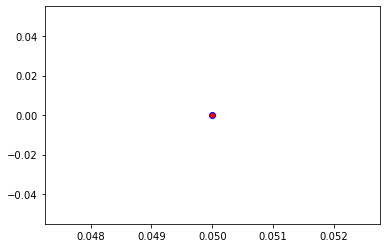

Counter: 100
000000117914 861 = toilet seat
000000118209 339 = sorrel
000000118367 934 = hotdog
000000118405 919 = street sign
000000118515 282 = tiger cat
000000118594 37 = ox
000000118921 248 = ski
000000119038 5 = ram
000000119088 394 = sturgeon
000000119233 361 = skunk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


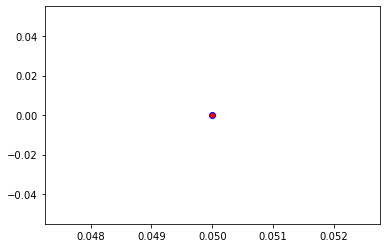

Counter: 101
000000119365 620 = laptop
000000119445 890 = volleyball
000000119452 954 = banana
000000119516 920 = traffic light
000000119641 346 = water buffalo
000000119677 767 = rubber eraser
000000119828 527 = desktop computer
000000119911 646 = maze
000000119995 752 = racket
000000120420 447 = binoculars
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


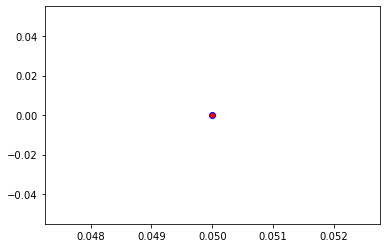

Counter: 102
000000120572 483 = castle
000000120584 409 = analog clock
000000120777 932 = pretzel
000000120853 965 = burrito
000000121031 37 = ox
000000121153 919 = street sign
000000121242 603 = horse cart
000000121417 879 = umbrella
000000121497 822 = steel drum
000000121506 807 = solar dish
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


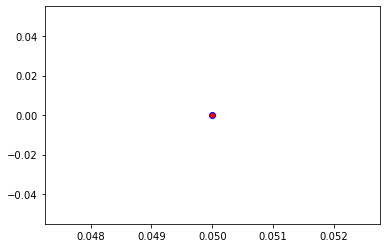

Counter: 103
000000121586 548 = entertainment center
000000121591 18 = magpie
000000121673 693 = paddle
000000121744 752 = racket
000000122046 879 = umbrella
000000122166 324 = cab
000000122217 751 = racer
000000122606 829 = streetcar
000000122672 842 = swimming trunks
000000122745 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


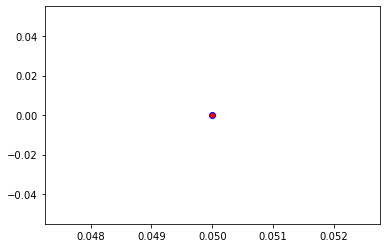

Counter: 104
000000122927 8 = hen
000000122962 865 = toyshop
000000122969 340 = zebra
000000123131 867 = trailer truck
000000123213 981 = ballplayer
000000123321 809 = soup bowl
000000123480 617 = lab coat
000000123585 97 = drake
000000123633 641 = maraca
000000124277 538 = dome
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


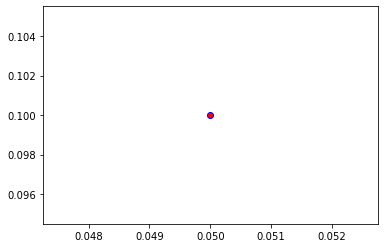

Counter: 105
000000124442 879 = umbrella
000000124636 37 = ox
000000124659 526 = desk
000000124798 920 = traffic light
000000124975 340 = zebra
000000125062 850 = teddy
000000125072 976 = promontory
000000125129 982 = groom
000000125211 340 = zebra
000000125245 973 = coral reef
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


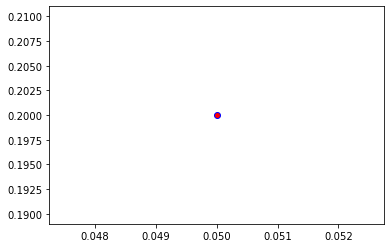

Counter: 106
000000125257 879 = umbrella
000000125405 253 = basenji
000000125472 248 = ski
000000125572 442 = bell cote
000000125778 831 = studio couch
000000125806 295 = American black bear
000000125850 281 = tabby
000000125936 582 = grocery store
000000125952 414 = backpack
000000126107 146 = albatross
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


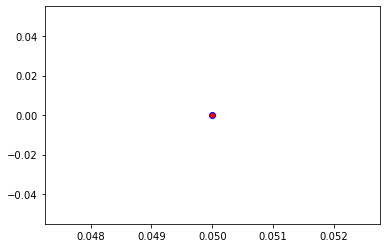

Counter: 107
000000126110 779 = school bus
000000126137 752 = racket
000000126216 101 = tusker
000000126226 830 = stretcher
000000126592 919 = street sign
000000127092 919 = street sign
000000127135 338 = guinea pig
000000127182 534 = dishwasher
000000127263 805 = soccer ball
000000127270 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


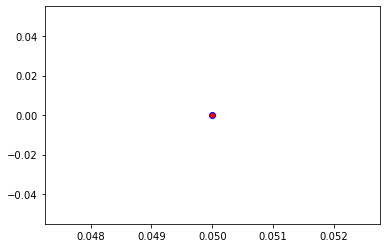

Counter: 108
000000127394 762 = restaurant
000000127476 963 = pizza
000000127494 461 = plate
000000127517 428 = barrow
000000127530 819 = stage
000000127624 975 = lakeside
000000127660 588 = hamper
000000127955 294 = brown bear
000000127987 673 = mouse
000000128051 757 = recreational vehicle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


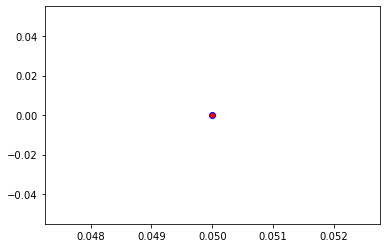

Counter: 109
000000128112 140 = alp
000000128148 598 = home theater
000000128372 829 = streetcar
000000128476 533 = dishrag
000000128598 950 = orange
000000128654 416 = balance beam
000000128658 928 = ice cream
000000128675 693 = paddle
000000128699 858 = tile roof
000000128748 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


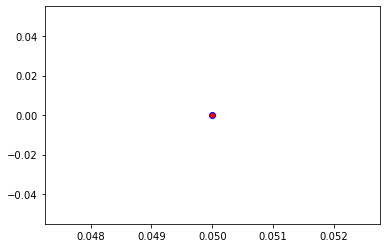

Counter: 110
000000129054 340 = zebra
000000129062 762 = restaurant
000000129113 618 = ladle
000000129135 547 = electric locomotive
000000129322 423 = barber chair
000000129416 347 = bison
000000129492 910 = wooden spoon
000000129756 730 = plow
000000129812 248 = ski
000000129945 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


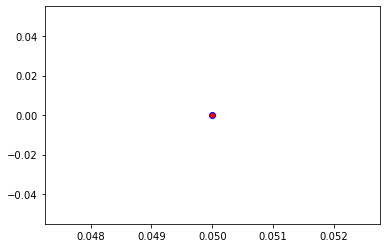

Counter: 111
000000130386 498 = cinema
000000130465 442 = bell cote
000000130566 547 = electric locomotive
000000130579 981 = ballplayer
000000130586 645 = maypole
000000130599 4 = hammer
000000130613 329 = sea cucumber
000000130699 890 = volleyball
000000130826 515 = cowboy hat
000000131131 664 = monitor
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


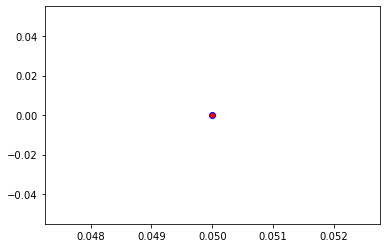

Counter: 112
000000131138 526 = desk
000000131273 250 = Siberian husky
000000131379 930 = French loaf
000000131386 895 = warplane
000000131431 409 = analog clock
000000131444 639 = suit
000000131556 248 = ski
000000131938 281 = tabby
000000132116 937 = broccoli
000000132329 760 = refrigerator
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


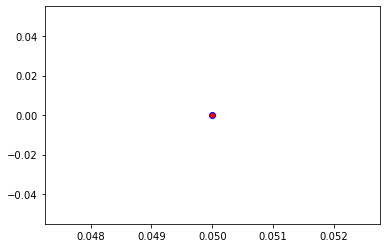

Counter: 113
000000132375 883 = vase
000000132408 730 = plow
000000132544 768 = rugby ball
000000132587 843 = swing
000000132622 294 = brown bear
000000132703 248 = ski
000000132796 385 = Indian elephant
000000132931 981 = ballplayer
000000133000 547 = electric locomotive
000000133087 498 = cinema
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


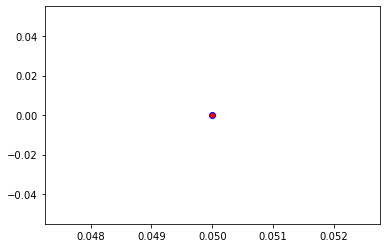

Counter: 114
000000133233 536 = dock
000000133244 752 = racket
000000133343 785 = seat belt
000000133418 752 = racket
000000133567 569 = garbage truck
000000133631 386 = African elephant
000000133645 975 = lakeside
000000133778 37 = ox
000000133819 874 = trolleybus
000000133969 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


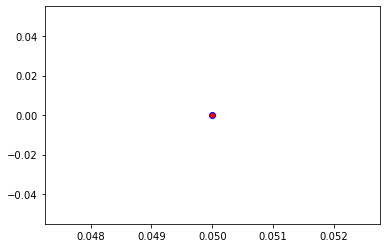

Counter: 115
000000134034 912 = worm fence
000000134096 534 = dishwasher
000000134112 620 = laptop
000000134322 864 = wreck
000000134689 275 = hyena
000000134722 705 = passenger car
000000134856 977 = sandbar
000000134882 831 = studio couch
000000134886 895 = warplane
000000135410 704 = parking meter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


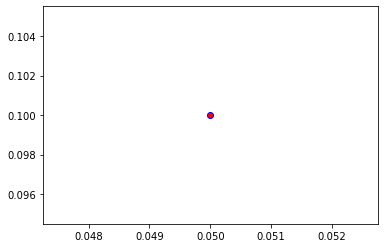

Counter: 116
000000135561 648 = medicine chest
000000135604 805 = soccer ball
000000135670 799 = sliding door
000000135673 895 = warplane
000000135872 526 = desk
000000135890 442 = bell cote
000000135902 547 = electric locomotive
000000136033 648 = medicine chest
000000136334 248 = ski
000000136355 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


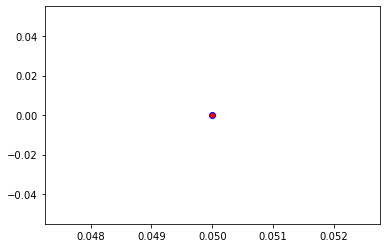

Counter: 117
000000136466 766 = rotisserie
000000136600 526 = desk
000000136633 582 = grocery store
000000136715 670 = motor scooter
000000136772 949 = strawberry
000000136915 480 = cash machine
000000137106 434 = bath towel
000000137246 66 = corn
000000137294 579 = grand piano
000000137576 161 = basset
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


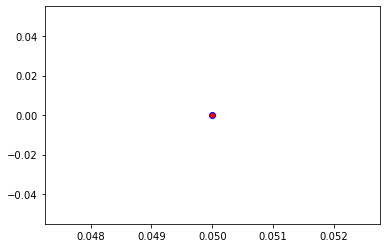

Counter: 118
000000137727 705 = passenger car
000000137950 895 = warplane
000000138115 950 = orange
000000138241 461 = plate
000000138492 232 = Border collie
000000138550 704 = parking meter
000000138639 880 = unicycle
000000138819 896 = washbasin
000000138856 827 = stove
000000138954 952 = fig
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


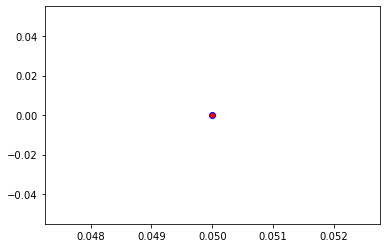

Counter: 119
000000138979 829 = streetcar
000000139077 598 = home theater
000000139099 582 = grocery store
000000139260 928 = ice cream
000000139684 831 = studio couch
000000139871 404 = airliner
000000139872 232 = Border collie
000000139883 791 = shopping cart
000000140076 532 = dining table
000000140203 734 = police van
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


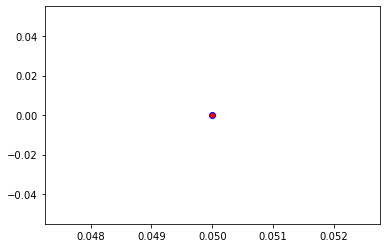

Counter: 120
000000140270 177 = Scottish deerhound
000000140286 603 = horse cart
000000140420 197 = giant schnauzer
000000140439 883 = vase
000000140556 830 = stretcher
000000140583 140 = alp
000000140640 515 = cowboy hat
000000140658 442 = bell cote
000000140840 787 = shield
000000140929 409 = analog clock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


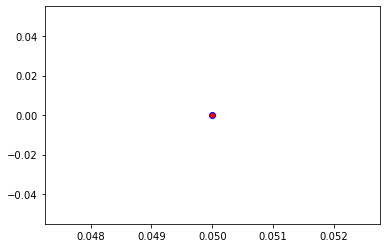

Counter: 121
000000140987 762 = restaurant
000000141328 937 = broccoli
000000141597 867 = trailer truck
000000141671 870 = tricycle
000000141821 963 = pizza
000000142092 963 = pizza
000000142238 768 = rugby ball
000000142324 670 = motor scooter
000000142472 498 = cinema
000000142585 324 = cab
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


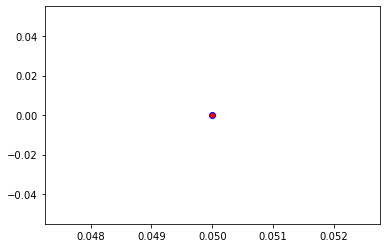

Counter: 122
000000142620 544 = Dutch oven
000000142790 248 = ski
000000142971 814 = speedboat
000000143068 701 = parachute
000000143556 518 = crash helmet
000000143572 752 = racket
000000143931 675 = moving van
000000143961 879 = umbrella
000000143998 499 = cleaver
000000144003 982 = groom
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


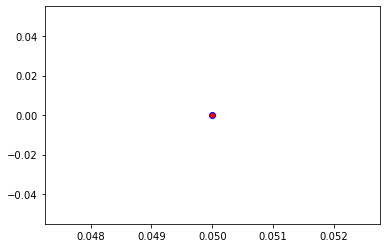

Counter: 123
000000144114 895 = warplane
000000144300 665 = moped
000000144333 665 = moped
000000144706 358 = pole
000000144784 503 = cocktail shaker
000000144798 896 = washbasin
000000144932 484 = catamaran
000000144984 870 = tricycle
000000145020 971 = bubble
000000145591 409 = analog clock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


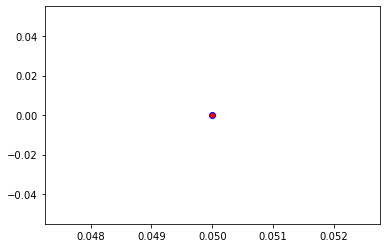

Counter: 124
000000145597 582 = grocery store
000000145620 671 = mountain bike
000000145665 797 = sleeping bag
000000145781 179 = Staffordshire bullterrier
000000146155 398 = abacus
000000146358 982 = groom
000000146363 978 = seashore
000000146457 499 = cleaver
000000146489 907 = wine bottle
000000146498 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


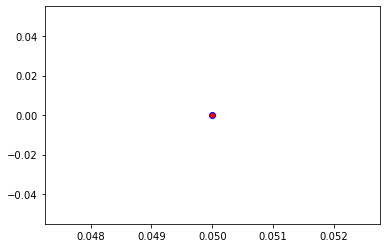

Counter: 125
000000146667 670 = motor scooter
000000146825 547 = electric locomotive
000000146831 880 = unicycle
000000147205 461 = plate
000000147223 569 = garbage truck
000000147338 412 = ashcan
000000147415 749 = quill
000000147498 358 = pole
000000147518 861 = toilet seat
000000147725 874 = trolleybus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


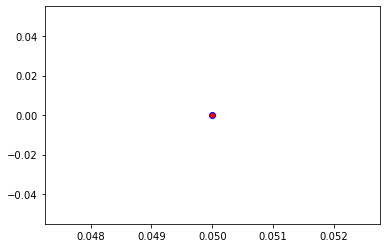

Counter: 126
000000147729 177 = Scottish deerhound
000000147740 452 = bonnet
000000147745 867 = trailer truck
000000148508 555 = fire engine
000000148620 526 = desk
000000148662 452 = bonnet
000000148707 950 = orange
000000148719 717 = pickup
000000148730 536 = dock
000000148739 236 = Doberman
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


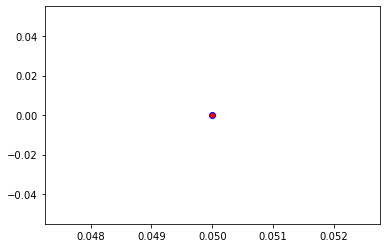

Counter: 127
000000148783 340 = zebra
000000148957 932 = pretzel
000000148999 820 = steam locomotive
000000149222 526 = desk
000000149375 880 = unicycle
000000149406 665 = moped
000000149568 267 = standard poodle
000000149622 24 = great grey owl
000000149770 148 = killer whale
000000150224 701 = parachute
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


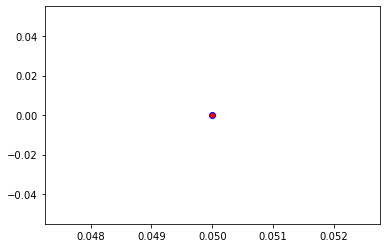

Counter: 128
000000150265 862 = torch
000000150417 965 = burrito
000000150638 423 = barber chair
000000150649 880 = unicycle
000000150726 9 = ostrich
000000150930 409 = analog clock
000000151000 400 = gown
000000151051 248 = ski
000000151480 981 = ballplayer
000000151516 150 = sea lion
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


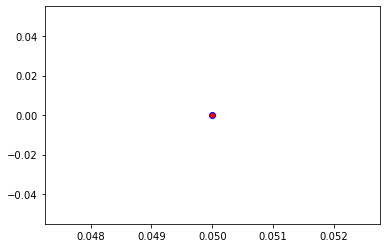

Counter: 129
000000151629 429 = baseball
000000151657 639 = suit
000000151662 489 = chainlink fence
000000151820 762 = restaurant
000000151857 705 = passenger car
000000151938 836 = sunglass
000000151962 475 = car mirror
000000152120 518 = crash helmet
000000152214 639 = suit
000000152465 63 = Indian cobra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


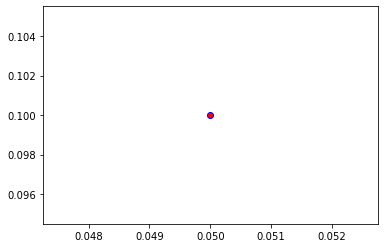

Counter: 130
000000152686 752 = racket
000000152740 9 = ostrich
000000152771 703 = park bench
000000152870 83 = prairie chicken
000000153011 874 = trolleybus
000000153217 665 = moped
000000153229 768 = rugby ball
000000153299 251 = dalmatian
000000153343 570 = mask
000000153510 924 = guacamole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


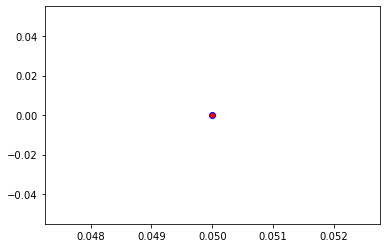

Counter: 131
000000153527 634 = lumbermill
000000153529 756 = rain barrel
000000153568 919 = street sign
000000153632 461 = plate
000000153669 981 = ballplayer
000000153782 498 = palace
000000153797 981 = ballplayer
000000154000 569 = garbage truck
000000154004 977 = sandbar
000000154087 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


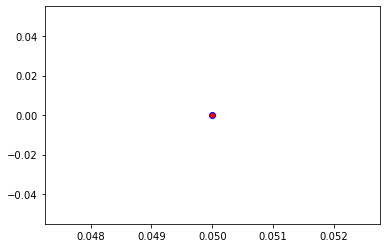

Counter: 132
000000154213 541 = drum
000000154339 633 = loupe
000000154358 564 = four-poster
000000154425 728 = plastic bag
000000154431 548 = entertainment center
000000154644 447 = binoculars
000000154705 526 = desk
000000154718 778 = scale
000000154947 5 = ram
000000155051 409 = analog clock
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


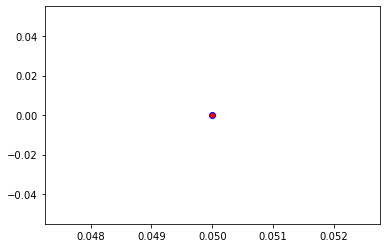

Counter: 133
000000155145 472 = canoe
000000155154 760 = refrigerator
000000155179 961 = dough
000000155291 282 = tiger cat
000000155341 864 = tow truck
000000155443 829 = streetcar
000000155451 818 = spotlight
000000155571 386 = African elephant
000000156071 602 = horizontal bar
000000156076 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


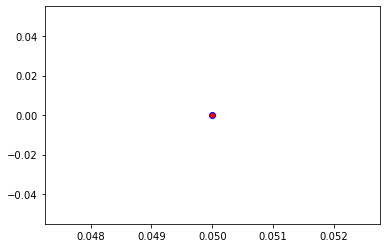

Counter: 134
000000156278 495 = china cabinet
000000156292 892 = wall clock
000000156372 758 = reel
000000156643 470 = candle
000000156924 882 = vacuum
000000157046 904 = window screen
000000157098 134 = crane
000000157124 435 = tub
000000157138 928 = ice cream
000000157213 386 = African elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


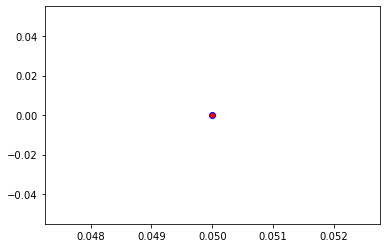

Counter: 135
000000157365 515 = cowboy hat
000000157390 937 = broccoli
000000157418 910 = wooden spoon
000000157601 899 = water jug
000000157756 442 = bell cote
000000157767 399 = abaya
000000157807 861 = toilet seat
000000157847 979 = valley
000000157928 802 = snowmobile
000000158227 429 = baseball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


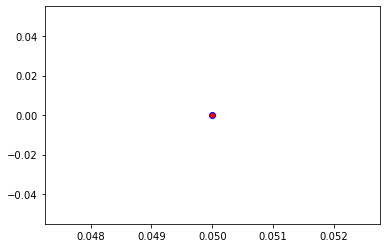

Counter: 136
000000158548 160 = Afghan hound
000000158660 891 = waffle iron
000000158744 706 = patio
000000158945 385 = Indian elephant
000000158956 470 = candle
000000159112 963 = pizza
000000159282 584 = hair slide
000000159311 340 = zebra
000000159399 701 = parachute
000000159458 435 = tub
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


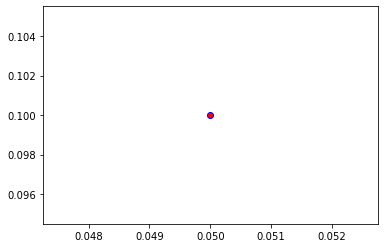

Counter: 137
000000159684 705 = passenger car
000000159791 760 = refrigerator
000000159977 293 = cheetah
000000160012 963 = pizza
000000160556 556 = screen
000000160666 450 = bobsled
000000160728 536 = dock
000000160772 404 = liner
000000160864 981 = ballplayer
000000161008 616 = knot
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


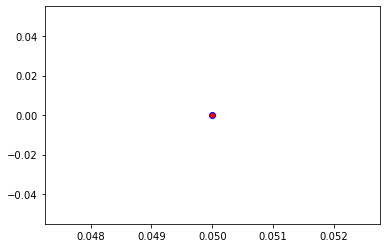

Counter: 138
000000161032 879 = umbrella
000000161044 895 = warplane
000000161128 919 = street sign
000000161397 711 = perfume
000000161609 851 = television
000000161642 892 = wall clock
000000161781 248 = ski
000000161799 880 = unicycle
000000161820 944 = artichoke
000000161861 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


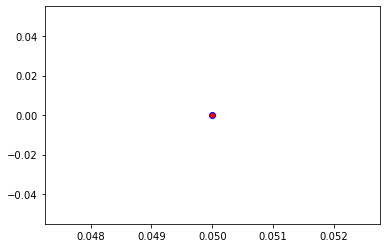

Counter: 139
000000161875 501 = cloak
000000161879 421 = bannister
000000161925 544 = Dutch oven
000000161978 788 = shoe shop
000000162035 478 = carton
000000162092 470 = candle
000000162130 912 = worm fence
000000162366 707 = pay-phone
000000162415 768 = rugby ball
000000162543 385 = Indian elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


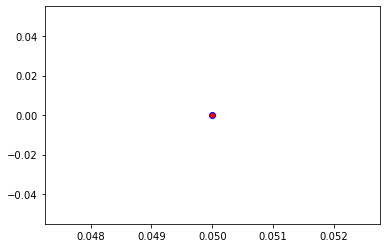

Counter: 140
000000162581 752 = racket
000000162732 768 = rugby ball
000000162858 920 = traffic light
000000163057 975 = lakeside
000000163117 701 = parachute
000000163118 890 = volleyball
000000163155 281 = tabby
000000163257 429 = baseball
000000163258 861 = toilet seat
000000163290 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


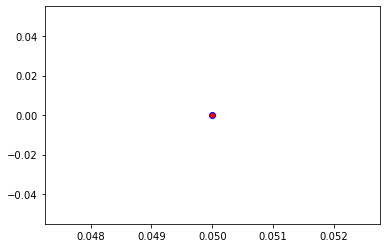

Counter: 141
000000163314 454 = bookshop
000000163562 463 = bucket
000000163611 963 = pizza
000000163640 762 = restaurant
000000163682 639 = suit
000000163746 842 = swimming trunks
000000163951 512 = corkscrew
000000164115 541 = drum
000000164363 409 = analog clock
000000164602 696 = paintbrush
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


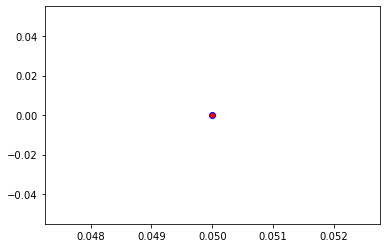

Counter: 142
000000164637 896 = washbasin
000000164883 745 = projector
000000164885 248 = ski
000000164969 963 = pizza
000000165039 874 = trolleybus
000000165257 651 = microwave
000000165336 9 = ostrich
000000165351 962 = meat loaf
000000165500 54 = hog
000000165518 670 = motor scooter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


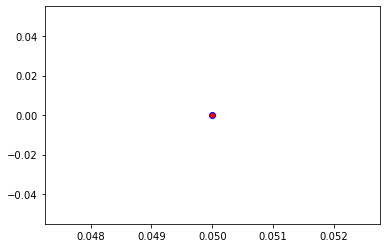

Counter: 143
000000165681 788 = shoe shop
000000165713 695 = padlock
000000165831 962 = meat loaf
000000166165 752 = racket
000000166166 526 = desk
000000166259 83 = prairie chicken
000000166277 286 = cougar
000000166287 343 = warthog
000000166391 920 = traffic light
000000166426 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


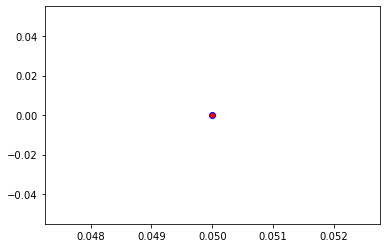

Counter: 144
000000166478 831 = studio couch
000000166509 475 = car mirror
000000166521 598 = home theater
000000166563 920 = traffic light
000000166642 385 = Indian elephant
000000166664 386 = African elephant
000000166747 829 = streetcar
000000166768 457 = bow tie
000000166918 762 = restaurant
000000167067 457 = bow tie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


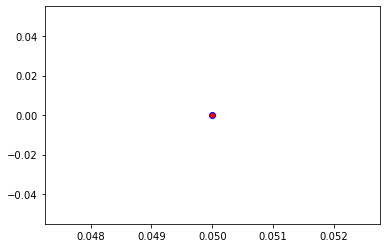

Counter: 145
000000167122 475 = car mirror
000000167128 386 = African elephant
000000167159 452 = bonnet
000000167240 883 = vase
000000167353 892 = wall clock
000000167486 546 = electric guitar
000000167540 895 = warplane
000000167572 329 = cucumber
000000167898 896 = washbasin
000000167902 96 = toucan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


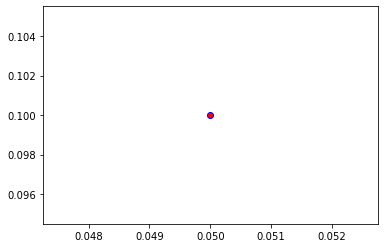

Counter: 146
000000168330 920 = traffic light
000000168337 637 = mailbox
000000168458 883 = vase
000000168593 760 = refrigerator
000000168619 975 = lakeside
000000168883 570 = gasmask
000000168974 784 = screwdriver
000000169076 527 = desktop computer
000000169169 920 = traffic light
000000169356 491 = chain saw
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


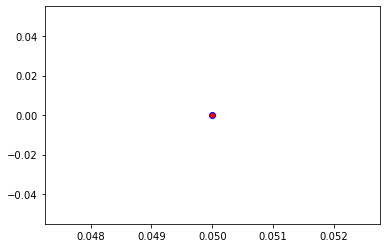

Counter: 147
000000169996 661 = Model T
000000170099 614 = kimono
000000170116 454 = bookshop
000000170191 831 = studio couch
000000170278 242 = boxer
000000170474 752 = racket
000000170545 818 = spotlight
000000170595 934 = hotdog
000000170613 693 = paddle
000000170670 567 = frying pan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


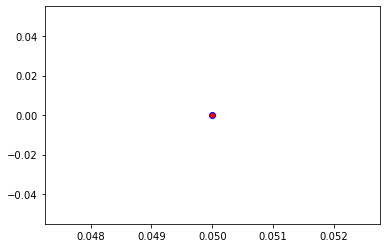

Counter: 148
000000170739 385 = Indian elephant
000000170893 208 = Labrador retriever
000000170955 639 = suit
000000171050 494 = chime
000000171190 762 = restaurant
000000171298 654 = minibus
000000171382 324 = cab
000000171611 536 = dock
000000171740 424 = barbershop
000000171757 523 = crutch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


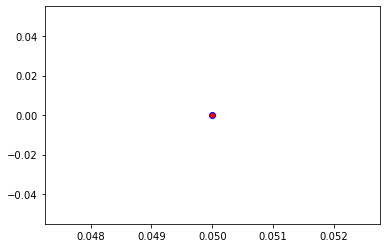

Counter: 149
000000171788 752 = racket
000000172083 479 = car wheel
000000172330 511 = convertible
000000172396 827 = stove
000000172547 979 = valley
000000172571 963 = pizza
000000172595 526 = desk
000000172617 670 = motor scooter
000000172648 569 = garbage truck
000000172649 48 = ant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


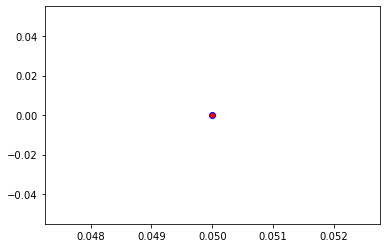

Counter: 150
000000172856 919 = street sign
000000172877 457 = bow tie
000000172935 421 = bannister
000000172946 683 = oboe
000000172977 340 = zebra
000000173004 461 = plate
000000173008 697 = pajama
000000173033 295 = American black bear
000000173044 442 = bell cote
000000173057 627 = limousine
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


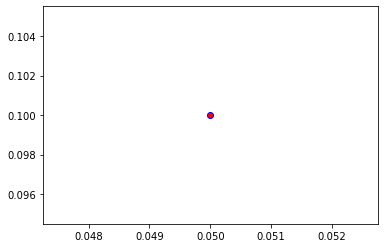

Counter: 151
000000173091 631 = lotion
000000173183 919 = street sign
000000173302 424 = barbershop
000000173371 461 = plate
000000173383 406 = altar
000000173799 346 = water buffalo
000000173830 248 = ski
000000174004 803 = snowplow
000000174018 850 = teddy
000000174123 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


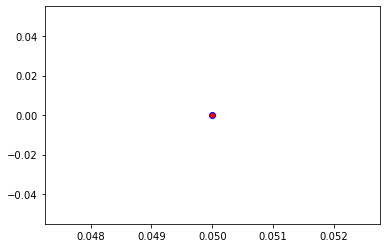

Counter: 152
000000174231 620 = laptop
000000174371 642 = marimba
000000174482 671 = mountain bike
000000175251 784 = screwdriver
000000175364 651 = microwave
000000175387 861 = toilet seat
000000175438 920 = traffic light
000000175443 850 = teddy
000000175535 461 = plate
000000176037 654 = minibus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


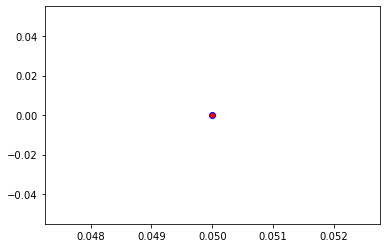

Counter: 153
000000176232 28 = pot
000000176446 579 = grand piano
000000176606 355 = llama
000000176634 340 = zebra
000000176701 358 = pole
000000176778 861 = toilet seat
000000176799 28 = pot
000000176847 93 = hornbill
000000176857 899 = water jug
000000176901 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


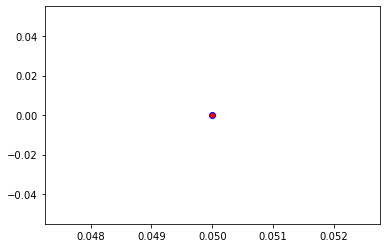

Counter: 154
000000177015 285 = Egyptian cat
000000177065 752 = racket
000000177213 963 = pizza
000000177357 814 = speedboat
000000177383 547 = electric locomotive
000000177489 788 = shoe shop
000000177539 541 = drum
000000177714 461 = plate
000000177861 879 = umbrella
000000177893 874 = trolleybus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


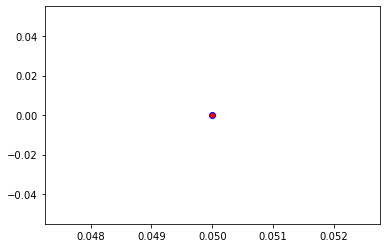

Counter: 155
000000177934 665 = moped
000000177935 639 = tank
000000178028 896 = washbasin
000000178469 681 = notebook
000000178618 386 = African elephant
000000178744 324 = cab
000000178982 920 = traffic light
000000179112 487 = cellular telephone
000000179141 568 = fur coat
000000179174 867 = trailer truck
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


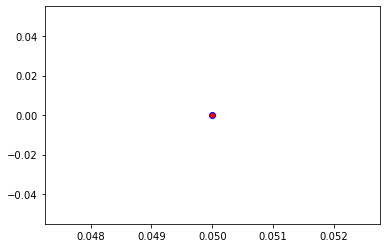

Counter: 156
000000179214 963 = pizza
000000179265 874 = trolleybus
000000179285 752 = racket
000000179392 227 = kelpie
000000179487 768 = rugby ball
000000179642 752 = racket
000000179653 426 = barometer
000000179765 665 = moped
000000179898 112 = conch
000000180011 562 = fountain
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


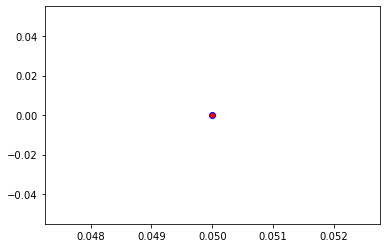

Counter: 157
000000180101 470 = candle
000000180135 546 = electric guitar
000000180188 705 = passenger car
000000180296 116 = cradle
000000180383 527 = desktop computer
000000180487 879 = umbrella
000000180560 470 = candle
000000180751 762 = restaurant
000000180792 861 = toilet seat
000000180798 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


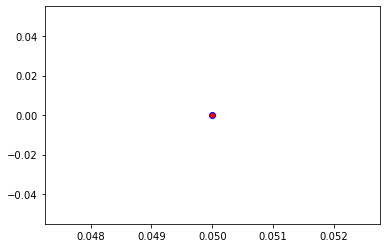

Counter: 158
000000180878 748 = purse
000000181303 879 = umbrella
000000181421 879 = umbrella
000000181499 681 = notebook
000000181542 665 = moped
000000181666 37 = ox
000000181753 857 = throne
000000181796 461 = plate
000000181816 703 = park bench
000000181859 896 = washbasin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


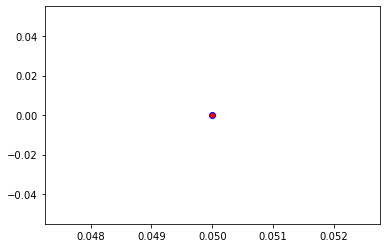

Counter: 159
000000181969 202 = soft-coated wheaten terrier
000000182021 981 = ballplayer
000000182155 589 = hand blower
000000182162 423 = barber chair
000000182202 681 = notebook
000000182417 461 = plate
000000182441 139 = ruddy turnstone
000000182611 544 = Dutch oven
000000182805 256 = Newfoundland
000000182923 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


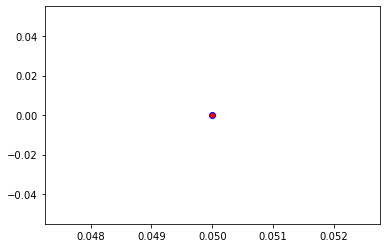

Counter: 160
000000183049 453 = bookcase
000000183104 355 = llama
000000183127 814 = speedboat
000000183246 920 = traffic light
000000183391 752 = racket
000000183437 385 = Indian elephant
000000183500 318 = wing
000000183648 385 = Indian elephant
000000183675 603 = horse cart
000000183709 501 = cloak
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


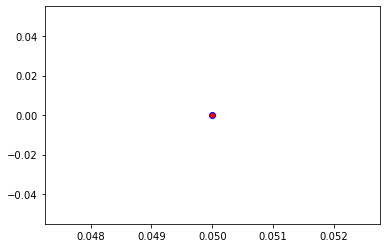

Counter: 161
000000183716 639 = suit
000000183965 990 = buckeye
000000184321 705 = passenger car
000000184324 612 = jinrikisha
000000184338 586 = half track
000000184384 927 = trifle
000000184400 498 = cinema
000000184611 612 = jinrikisha
000000184762 409 = analog clock
000000184791 868 = tray
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


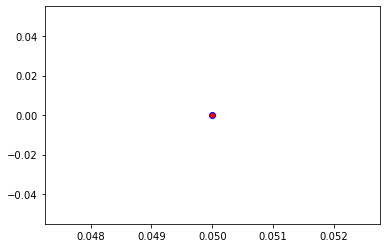

Counter: 162
000000184978 248 = ski
000000185157 919 = street sign
000000185250 264 = Cardigan
000000185292 148 = killer whale
000000185409 340 = zebra
000000185472 705 = passenger car
000000185473 354 = Arabian camel
000000185599 950 = orange
000000185802 954 = banana
000000185890 889 = violin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


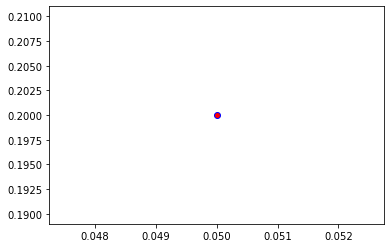

Counter: 163
000000185950 981 = ballplayer
000000186042 248 = ski
000000186282 527 = desktop computer
000000186296 589 = hand blower
000000186345 701 = parachute
000000186422 294 = brown bear
000000186449 634 = lumbermill
000000186624 820 = steam locomotive
000000186632 598 = home theater
000000186637 290 = jaguar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


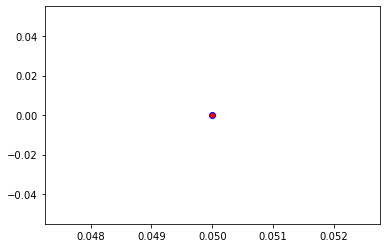

Counter: 164
000000186873 576 = gondola
000000186929 950 = orange
000000186938 139 = ruddy turnstone
000000186980 532 = dining table
000000187055 752 = racket
000000187144 757 = recreational vehicle
000000187236 191 = Airedale
000000187243 731 = plunger
000000187249 851 = television
000000187271 760 = refrigerator
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


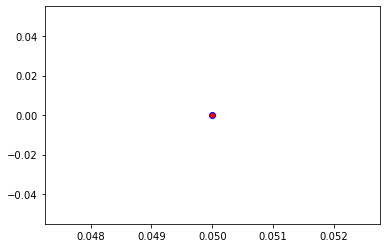

Counter: 165
000000187362 842 = swimming trunks
000000187513 648 = medicine chest
000000187585 776 = sax
000000187734 788 = shoe shop
000000187745 895 = warplane
000000187990 456 = bow
000000188296 560 = football helmet
000000188439 569 = garbage truck
000000188465 981 = ballplayer
000000188592 929 = ice lolly
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


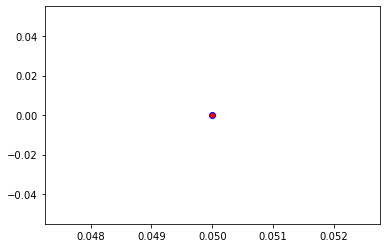

Counter: 166
000000188689 864 = wreck
000000188906 461 = plate
000000189078 954 = banana
000000189213 573 = go-kart
000000189226 898 = water bottle
000000189310 495 = china cabinet
000000189436 850 = teddy
000000189451 813 = spatula
000000189475 762 = restaurant
000000189698 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


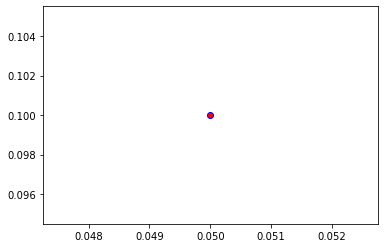

Counter: 167
000000189752 461 = plate
000000189775 752 = racket
000000189806 162 = beagle
000000189820 526 = desk
000000189828 904 = window screen
000000190007 148 = killer whale
000000190140 693 = paddle
000000190236 526 = desk
000000190307 445 = bikini
000000190637 529 = diaper
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


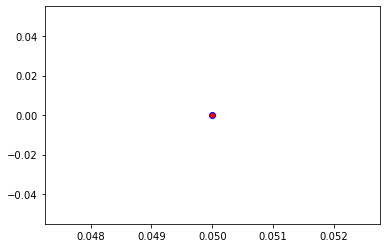

Counter: 168
000000190648 750 = quilt
000000190676 405 = airship
000000190753 627 = limousine
000000190756 671 = mountain bike
000000190841 703 = park bench
000000190853 954 = banana
000000190923 920 = traffic light
000000191013 409 = analog clock
000000191288 339 = sorrel
000000191471 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


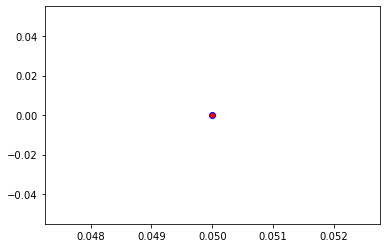

Counter: 169
000000191580 461 = plate
000000191614 339 = sorrel
000000191672 97 = drake
000000191761 43 = frilled lizard
000000191845 879 = umbrella
000000192047 648 = medicine chest
000000192191 827 = stove
000000192607 609 = jeep
000000192670 429 = baseball
000000192699 518 = crash helmet
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


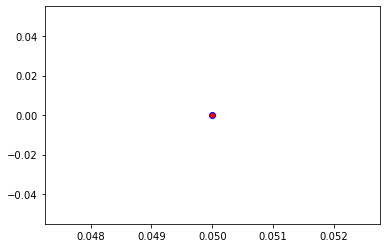

Counter: 170
000000192716 919 = street sign
000000192871 950 = orange
000000192904 617 = lab coat
000000192964 981 = ballplayer
000000193162 730 = plow
000000193181 981 = ballplayer
000000193245 417 = balloon
000000193348 629 = lipstick
000000193429 248 = ski
000000193494 669 = mosquito net
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


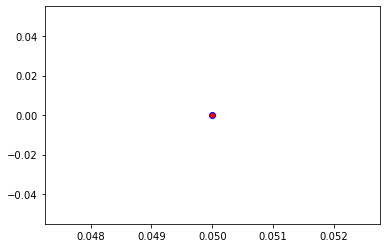

Counter: 171
000000193674 147 = grey whale
000000193717 562 = fountain
000000193743 752 = racket
000000193884 716 = picket fence
000000193926 954 = banana
000000194216 274 = dhole
000000194471 248 = ski
000000194506 294 = brown bear
000000194716 929 = ice lolly
000000194724 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


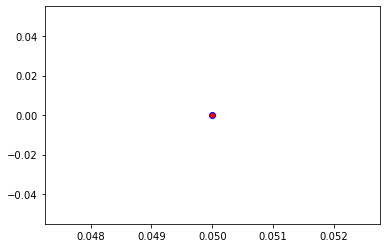

Counter: 172
000000194746 766 = rotisserie
000000194832 705 = passenger car
000000194875 518 = crash helmet
000000194940 941 = acorn squash
000000195045 73 = barn
000000195165 648 = medicine chest
000000195754 598 = home theater
000000195842 526 = desk
000000195918 527 = desktop computer
000000196009 941 = acorn
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


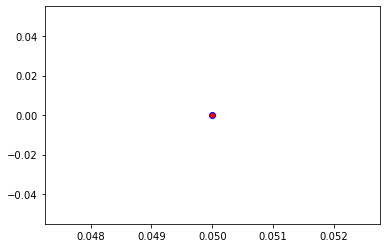

Counter: 173
000000196141 981 = ballplayer
000000196185 404 = airliner
000000196442 248 = ski
000000196754 919 = street sign
000000196759 656 = minivan
000000196843 779 = school bus
000000197004 933 = cheeseburger
000000197022 963 = pizza
000000197388 248 = ski
000000197528 904 = window screen
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


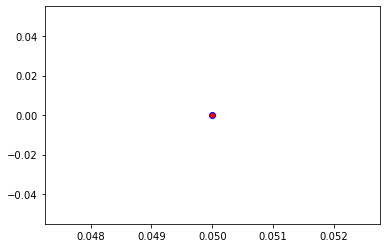

Counter: 174
000000197658 429 = baseball
000000197796 896 = washbasin
000000197870 129 = spoonbill
000000198489 787 = shield
000000198510 523 = crutch
000000198641 527 = desktop computer
000000198805 717 = pickup
000000198915 919 = street sign
000000198928 498 = palace
000000198960 5 = ram
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


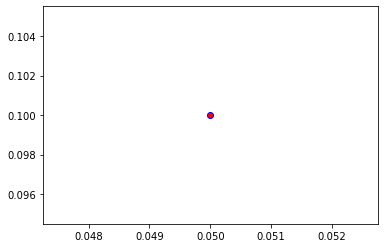

Counter: 175
000000199055 608 = jean
000000199236 787 = shield
000000199310 752 = racket
000000199395 701 = parachute
000000199442 693 = paddle
000000199551 669 = mosquito net
000000199681 485 = CD player
000000199771 582 = grocery store
000000199977 318 = wing
000000200152 498 = cinema
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


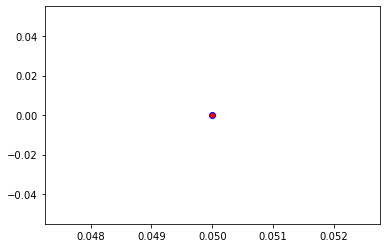

Counter: 176
000000200162 547 = electric locomotive
000000200252 770 = running shoe
000000200421 452 = bonnet
000000200667 583 = guillotine
000000200839 407 = ambulance
000000200961 140 = alp
000000201025 101 = tusker
000000201072 752 = racket
000000201148 565 = freight car
000000201418 450 = bobsled
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


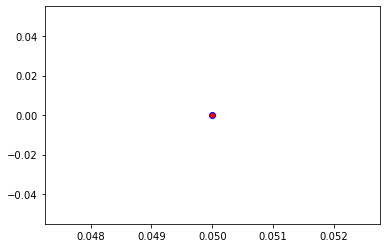

Counter: 177
000000201426 813 = spatula
000000201646 593 = harmonica
000000201676 340 = zebra
000000201775 896 = washbasin
000000201934 705 = passenger car
000000202001 784 = screwdriver
000000202228 648 = medicine chest
000000202339 675 = moving van
000000202445 225 = malinois
000000203095 868 = tray
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


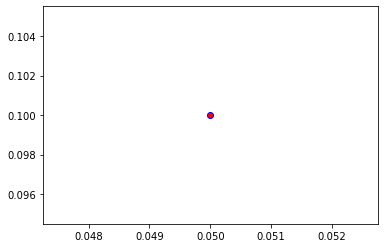

Counter: 178
000000203294 874 = trolleybus
000000203317 707 = pay-phone
000000203389 671 = mountain bike
000000203488 704 = parking meter
000000203546 294 = brown bear
000000203580 879 = umbrella
000000203629 683 = oboe
000000203639 474 = cardigan
000000203864 752 = racket
000000203931 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


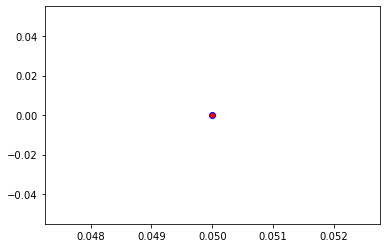

Counter: 179
000000204186 787 = shield
000000204329 472 = canoe
000000204871 505 = coffeepot
000000205105 752 = racket
000000205282 288 = leopard
000000205289 603 = horse cart
000000205324 255 = Leonberg
000000205333 248 = ski
000000205401 449 = boathouse
000000205514 526 = desk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


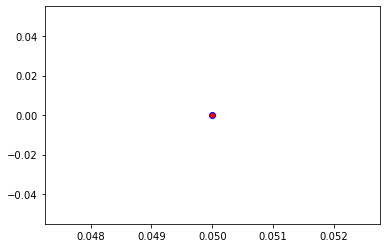

Counter: 180
000000205542 883 = vase
000000205647 867 = trailer truck
000000205776 354 = Arabian camel
000000205834 231 = collie
000000206025 906 = Windsor tie
000000206027 963 = pizza
000000206135 37 = ox
000000206218 681 = notebook
000000206271 846 = table lamp
000000206411 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


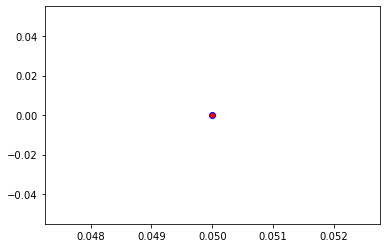

Counter: 181
000000206487 874 = trolleybus
000000206579 470 = candle
000000206831 243 = bull mastiff
000000206838 801 = snorkel
000000206994 547 = electric locomotive
000000207306 412 = ashcan
000000207538 651 = microwave
000000207585 850 = teddy
000000207728 350 = ibex
000000207844 915 = yurt
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


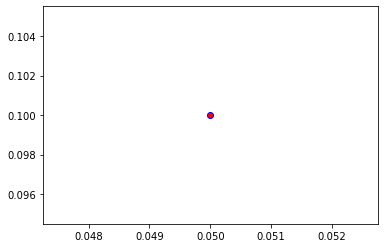

Counter: 182
000000208208 318 = wing
000000208363 982 = groom
000000208423 358 = pole
000000208901 404 = airliner
000000209142 937 = broccoli
000000209222 703 = park bench
000000209530 762 = restaurant
000000209613 5 = ram
000000209747 896 = washbasin
000000209753 613 = joystick
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


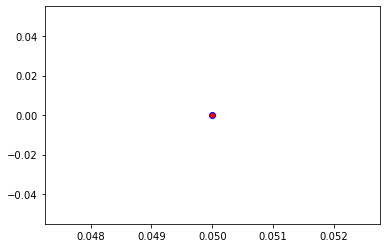

Counter: 183
000000209757 421 = bannister
000000209829 814 = speedboat
000000209972 484 = catamaran
000000210030 928 = ice cream
000000210032 931 = bagel
000000210099 286 = cougar
000000210230 982 = groom
000000210273 898 = water bottle
000000210299 880 = unicycle
000000210388 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


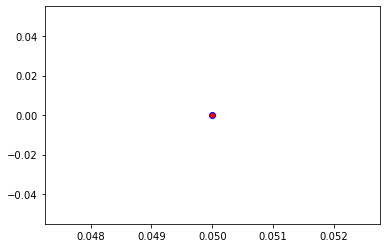

Counter: 184
000000210394 654 = minibus
000000210502 705 = passenger car
000000210520 406 = altar
000000210708 386 = African elephant
000000210789 879 = umbrella
000000210855 896 = washbasin
000000210915 148 = killer whale
000000211042 285 = Egyptian cat
000000211069 293 = cheetah
000000211120 850 = teddy
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


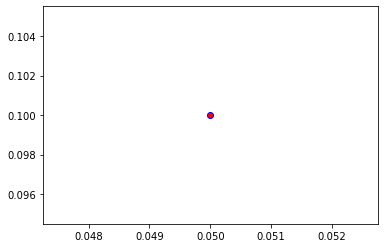

Counter: 185
000000211674 829 = streetcar
000000211825 438 = beaker
000000212072 919 = street sign
000000212166 813 = spatula
000000212226 475 = car mirror
000000212453 999 = toilet tissue
000000212559 5 = ram
000000212573 879 = umbrella
000000212800 814 = speedboat
000000212895 9 = ostrich
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


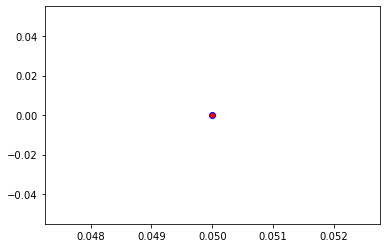

Counter: 186
000000213033 879 = umbrella
000000213035 419 = Band Aid
000000213086 534 = dishwasher
000000213171 981 = ballplayer
000000213224 883 = vase
000000213255 412 = ashcan
000000213422 750 = quilt
000000213445 281 = tabby
000000213547 865 = toyshop
000000213593 920 = traffic light
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


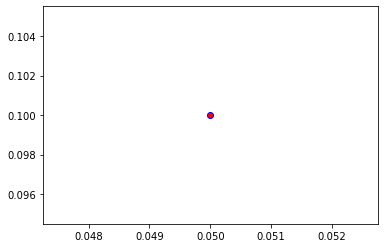

Counter: 187
000000213605 874 = trolleybus
000000213816 829 = streetcar
000000213830 752 = racket
000000213935 950 = orange
000000214192 665 = moped
000000214200 919 = street sign
000000214205 404 = airliner
000000214224 648 = medicine chest
000000214539 805 = soccer ball
000000214703 98 = red-breasted merganser
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


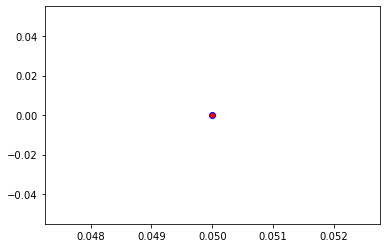

Counter: 188
000000214720 762 = restaurant
000000214753 354 = Arabian camel
000000214869 464 = buckle
000000215072 444 = bicycle-built-for-two
000000215114 760 = refrigerator
000000215245 340 = zebra
000000215259 608 = jean
000000215644 651 = microwave
000000215723 879 = umbrella
000000215778 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


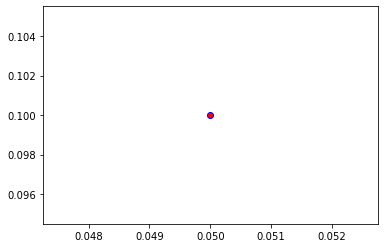

Counter: 189
000000216277 859 = toaster
000000216296 752 = racket
000000216419 892 = wall clock
000000216497 526 = desk
000000216516 248 = ski
000000216636 470 = candle
000000216739 350 = ibex
000000217060 812 = space shuttle
000000217219 750 = quilt
000000217285 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


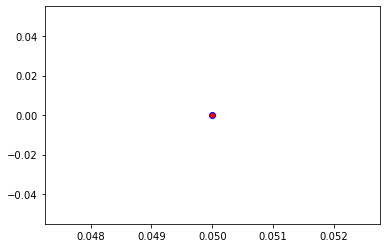

Counter: 190
000000217400 705 = passenger car
000000217425 409 = analog clock
000000217614 293 = cheetah
000000217753 582 = grocery store
000000217872 248 = ski
000000217948 294 = brown bear
000000217957 497 = church
000000218091 564 = four-poster
000000218249 933 = cheeseburger
000000218362 745 = projector
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


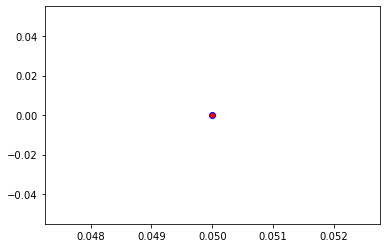

Counter: 191
000000218424 340 = zebra
000000218439 788 = shoe shop
000000218997 981 = ballplayer
000000219271 140 = alp
000000219283 850 = teddy
000000219440 346 = water buffalo
000000219485 904 = window screen
000000219578 151 = Chihuahua
000000220310 850 = teddy
000000220584 693 = paddle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


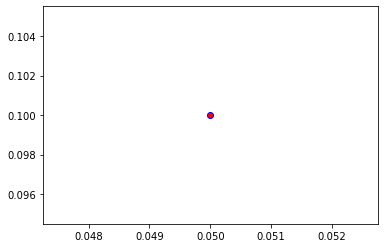

Counter: 192
000000220732 829 = streetcar
000000220764 248 = ski
000000220858 977 = sandbar
000000221017 7 = cock
000000221155 843 = swing
000000221213 839 = suspension bridge
000000221281 293 = cheetah
000000221291 701 = parachute
000000221502 703 = park bench
000000221693 227 = kelpie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


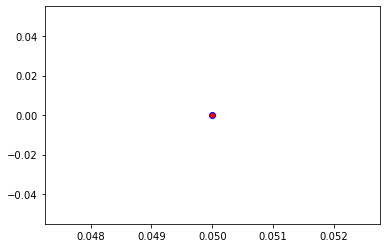

Counter: 193
000000221708 762 = restaurant
000000221754 660 = mobile home
000000221872 935 = mashed potato
000000222094 557 = flagpole
000000222118 776 = sax
000000222235 282 = tiger cat
000000222299 692 = packet
000000222317 168 = redbone
000000222455 827 = stove
000000222458 703 = park bench
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


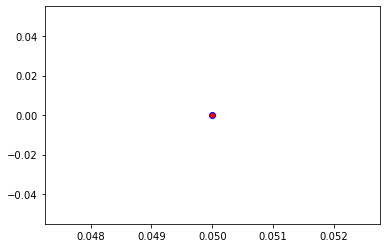

Counter: 194
000000222559 864 = wreck
000000222735 761 = remote control
000000222825 651 = microwave
000000222863 37 = ox
000000222991 840 = swab
000000223090 936 = head cabbage
000000223130 293 = cheetah
000000223182 752 = racket
000000223188 346 = water buffalo
000000223738 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


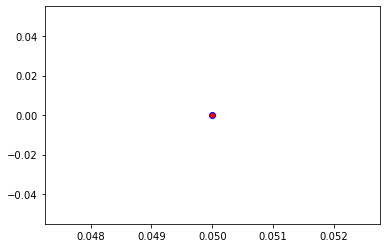

Counter: 195
000000223747 36 = terrapin
000000223789 896 = washbasin
000000223955 522 = croquet ball
000000223959 752 = racket
000000224051 880 = unicycle
000000224093 958 = hay
000000224119 421 = bannister
000000224200 195 = Boston bull
000000224222 814 = speedboat
000000224337 424 = barbershop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


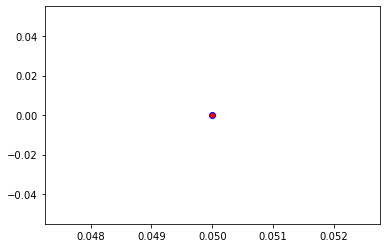

Counter: 196
000000224664 978 = seashore
000000224675 645 = maypole
000000224724 498 = cinema
000000224807 762 = restaurant
000000225184 254 = pug
000000225405 805 = soccer ball
000000225532 920 = traffic light
000000225670 183 = Kerry blue terrier
000000225757 527 = desktop computer
000000225946 569 = garbage truck
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


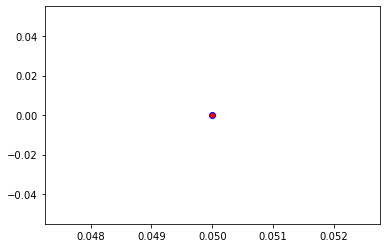

Counter: 197
000000226058 850 = teddy
000000226111 919 = street sign
000000226130 934 = hotdog
000000226147 461 = plate
000000226154 654 = minibus
000000226171 664 = monitor
000000226408 568 = fur coat
000000226417 870 = tricycle
000000226592 8 = hen
000000226662 471 = cannon
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


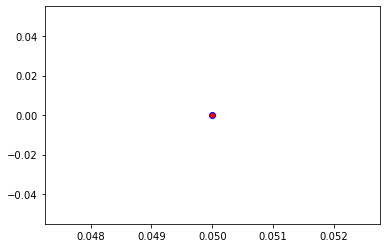

Counter: 198
000000226802 829 = streetcar
000000226883 756 = rain barrel
000000226903 762 = restaurant
000000226984 651 = microwave
000000227044 435 = tub
000000227187 912 = worm fence
000000227399 864 = tow truck
000000227478 428 = barrow
000000227482 805 = soccer ball
000000227491 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


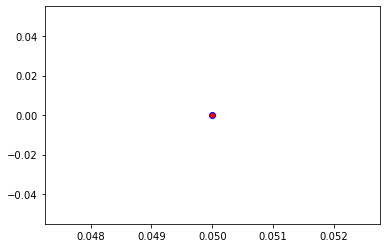

Counter: 199
000000227511 920 = traffic light
000000227686 339 = sorrel
000000227765 926 = hot pot
000000227898 603 = horse cart
000000227985 965 = burrito
000000228144 765 = rocking chair
000000228214 740 = power drill
000000228436 444 = bicycle-built-for-two
000000228771 919 = street sign
000000228942 324 = cab
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


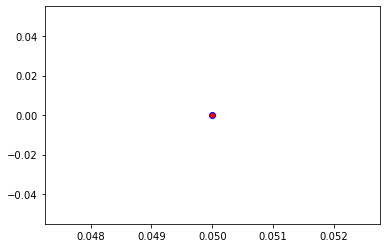

Counter: 200
000000228981 487 = cellular telephone
000000229111 761 = remote control
000000229216 838 = sunscreen
000000229221 37 = ox
000000229311 651 = microwave
000000229358 648 = medicine chest
000000229553 880 = unicycle
000000229601 981 = ballplayer
000000229659 762 = restaurant
000000229747 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


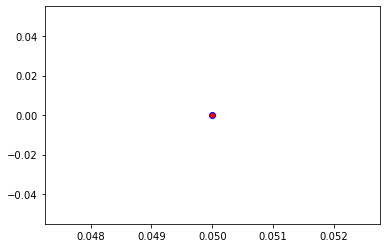

Counter: 201
000000229753 500 = cliff
000000229849 752 = racket
000000229858 343 = warthog
000000229948 603 = horse cart
000000229997 369 = siamang
000000230008 670 = motor scooter
000000230166 5 = ram
000000230362 536 = dock
000000230450 704 = parking meter
000000230819 148 = killer whale
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


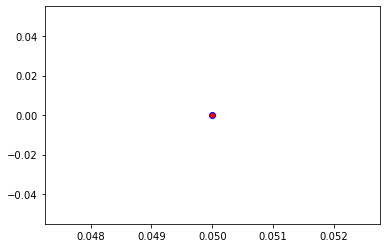

Counter: 202
000000230983 412 = ashcan
000000230993 879 = umbrella
000000231088 879 = umbrella
000000231097 937 = broccoli
000000231125 415 = bakery
000000231169 705 = passenger car
000000231237 883 = vase
000000231339 760 = refrigerator
000000231508 981 = ballplayer
000000231527 942 = butternut squash
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


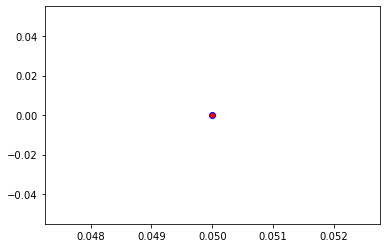

Counter: 203
000000231549 564 = four-poster
000000231580 856 = thresher
000000231747 894 = wardrobe
000000231822 461 = plate
000000231831 700 = paper towel
000000231879 585 = hair spray
000000232088 831 = studio couch
000000232244 385 = Indian elephant
000000232348 859 = toaster
000000232489 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


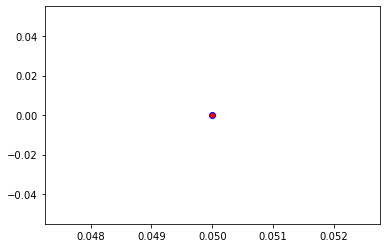

Counter: 204
000000232538 829 = streetcar
000000232563 879 = umbrella
000000232646 704 = parking meter
000000232649 896 = washbasin
000000232684 620 = laptop
000000232692 693 = paddle
000000233033 706 = patio
000000233139 688 = oscilloscope
000000233238 582 = grocery store
000000233370 655 = miniskirt
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


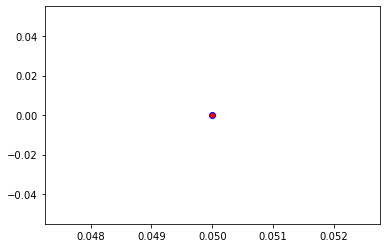

Counter: 205
000000233567 5 = ram
000000233727 874 = trolleybus
000000233771 879 = umbrella
000000233825 905 = window shade
000000234366 708 = pedestal
000000234413 861 = toilet seat
000000234526 37 = ox
000000234607 879 = umbrella
000000234660 466 = bullet train
000000234757 707 = pay-phone
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


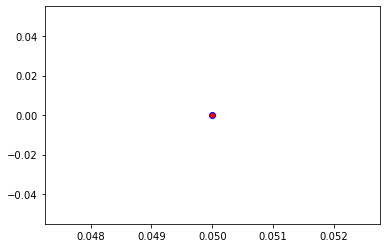

Counter: 206
000000234779 933 = cheeseburger
000000234807 649 = megalith
000000235057 290 = jaguar
000000235064 294 = brown bear
000000235241 880 = unicycle
000000235252 354 = Arabian camel
000000235399 675 = moving van
000000235778 645 = maypole
000000235784 523 = crutch
000000235836 522 = croquet ball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


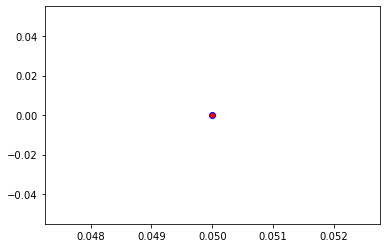

Counter: 207
000000235857 37 = ox
000000236166 447 = binoculars
000000236308 248 = ski
000000236412 964 = potpie
000000236426 752 = racket
000000236592 217 = English springer
000000236599 248 = ski
000000236690 146 = albatross
000000236721 969 = eggnog
000000236730 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


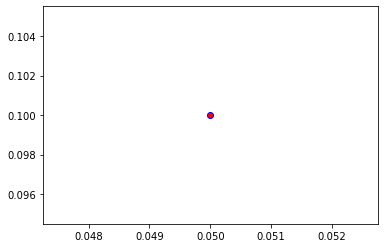

Counter: 208
000000236784 172 = whippet
000000236845 919 = street sign
000000236914 850 = teddy
000000237071 752 = racket
000000237118 457 = bow tie
000000237316 896 = washbasin
000000237517 461 = plate
000000237864 385 = Indian elephant
000000237928 651 = microwave
000000237984 416 = balance beam
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


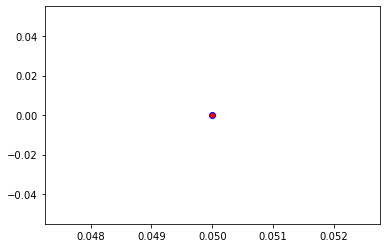

Counter: 209
000000238013 722 = ping-pong ball
000000238039 5 = ram
000000238410 683 = oboe
000000238866 961 = dough
000000239041 648 = medicine chest
000000239274 625 = lifeboat
000000239318 620 = laptop
000000239347 564 = four-poster
000000239537 522 = croquet ball
000000239627 896 = washbasin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


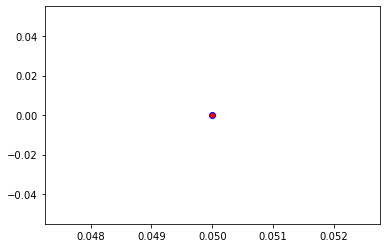

Counter: 210
000000239717 762 = restaurant
000000239773 981 = ballplayer
000000239843 919 = street sign
000000239857 879 = umbrella
000000240023 752 = racket
000000240049 421 = bannister
000000240250 461 = plate
000000240754 227 = kelpie
000000240767 557 = flagpole
000000240940 548 = entertainment center
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


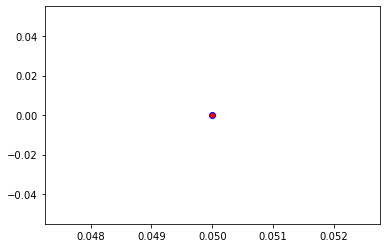

Counter: 211
000000241297 547 = electric locomotive
000000241319 896 = washbasin
000000241326 223 = schipperke
000000241602 406 = altar
000000241668 982 = groom
000000241677 690 = oxcart
000000242060 931 = bagel
000000242287 519 = crate
000000242411 442 = bell cote
000000242678 595 = harvester
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


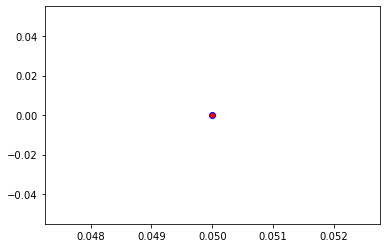

Counter: 212
000000242724 801 = snorkel
000000242934 624 = library
000000242946 461 = plate
000000243034 442 = bell cote
000000243075 296 = ice bear
000000243148 248 = ski
000000243199 620 = laptop
000000243204 813 = spatula
000000243344 894 = wardrobe
000000243495 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


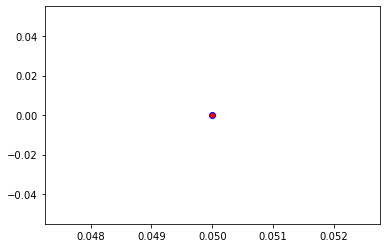

Counter: 213
000000243626 461 = plate
000000243867 705 = passenger car
000000243989 731 = plunger
000000244019 704 = parking meter
000000244099 354 = Arabian camel
000000244181 934 = hotdog
000000244379 920 = traffic light
000000244411 346 = water buffalo
000000244496 639 = suit
000000244592 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


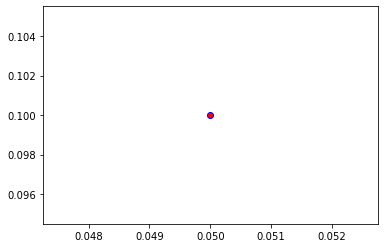

Counter: 214
000000244750 999 = toilet tissue
000000244833 541 = drum
000000245026 611 = jigsaw puzzle
000000245102 421 = bannister
000000245173 497 = church
000000245311 118 = Dungeness crab
000000245320 84 = peacock
000000245448 612 = jinrikisha
000000245513 912 = worm fence
000000245576 673 = mouse
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


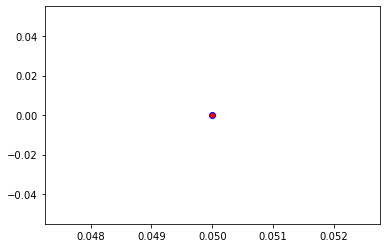

Counter: 215
000000245651 606 = iron
000000245764 794 = shower curtain
000000245915 346 = water buffalo
000000246308 526 = desk
000000246436 909 = wok
000000246454 178 = Weimaraner
000000246522 663 = monastery
000000246883 978 = seashore
000000246963 665 = moped
000000246968 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


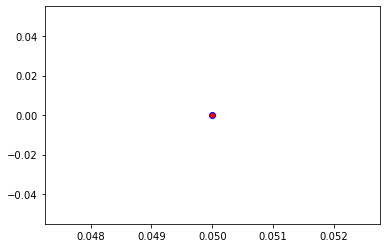

Counter: 216
000000247806 497 = church
000000247838 537 = dogsled
000000247917 981 = ballplayer
000000248111 651 = microwave
000000248112 752 = racket
000000248284 879 = umbrella
000000248314 526 = desk
000000248334 472 = canoe
000000248400 963 = pizza
000000248616 830 = stretcher
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


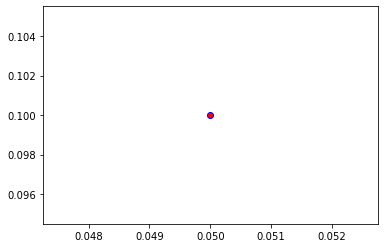

Counter: 217
000000248631 673 = mouse
000000248752 981 = ballplayer
000000248810 293 = cheetah
000000248980 461 = plate
000000249025 883 = vase
000000249129 850 = teddy
000000249180 421 = bannister
000000249219 874 = trolleybus
000000249550 750 = quilt
000000249643 547 = electric locomotive
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


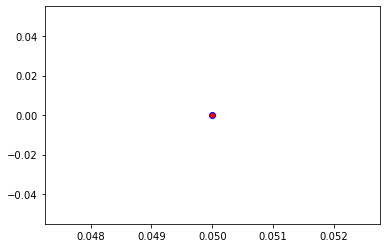

Counter: 218
000000249786 802 = snowmobile
000000250127 879 = umbrella
000000250137 476 = carousel
000000250205 146 = albatross
000000250282 433 = bathing cap
000000250619 879 = umbrella
000000250758 340 = zebra
000000250766 461 = plate
000000250901 938 = cauliflower
000000251065 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


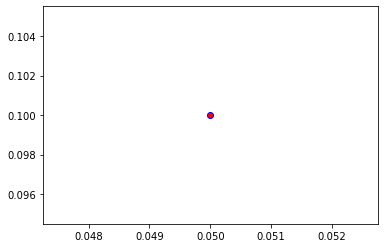

Counter: 219
000000251119 930 = French loaf
000000251140 921 = book jacket
000000251537 496 = Christmas stocking
000000251572 215 = Brittany spaniel
000000251824 845 = syringe
000000252216 355 = llama
000000252219 707 = pay-phone
000000252294 788 = shoe shop
000000252332 919 = street sign
000000252507 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


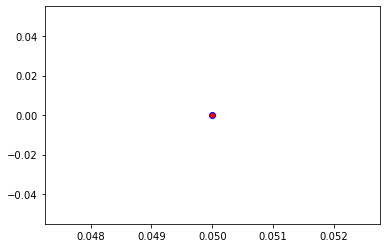

Counter: 220
000000252559 858 = tile roof
000000252701 148 = killer whale
000000252716 649 = megalith
000000252776 752 = racket
000000253002 705 = passenger car
000000253386 234 = Rottweiler
000000253433 850 = teddy
000000253452 934 = hotdog
000000253695 981 = ballplayer
000000253742 879 = umbrella
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


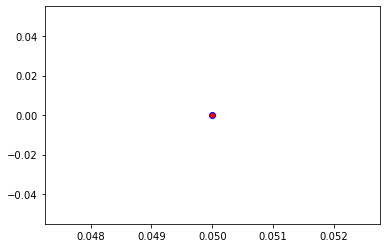

Counter: 221
000000253819 880 = unicycle
000000253835 829 = streetcar
000000254016 415 = bakery
000000254368 116 = cradle
000000254516 981 = ballplayer
000000254814 829 = streetcar
000000255165 526 = desk
000000255401 861 = toilet seat
000000255483 549 = envelope
000000255536 706 = patio
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


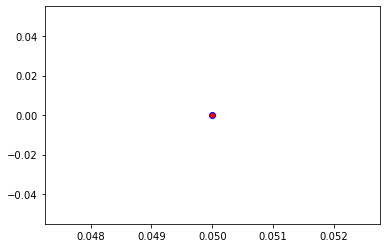

Counter: 222
000000255664 209 = Chesapeake Bay retriever
000000255718 562 = fountain
000000255747 928 = ice cream
000000255749 874 = trolleybus
000000255824 965 = burrito
000000255912 965 = burrito
000000255917 920 = traffic light
000000255965 281 = tabby
000000256192 670 = motor scooter
000000256195 547 = electric locomotive
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


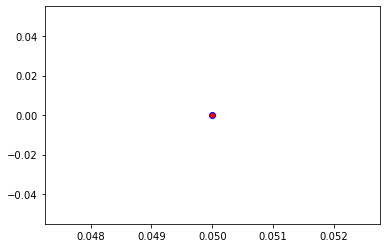

Counter: 223
000000256407 455 = bottlecap
000000256518 461 = plate
000000256775 701 = parachute
000000256868 458 = brass
000000256916 927 = trifle
000000256941 896 = washbasin
000000257084 248 = ski
000000257169 589 = hand blower
000000257370 851 = television
000000257478 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


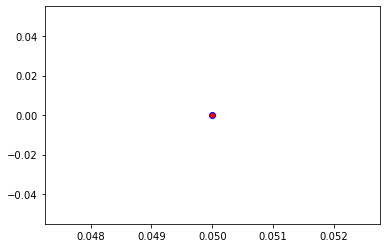

Counter: 224
000000257566 67 = dam
000000257624 805 = soccer ball
000000257865 752 = racket
000000257896 639 = suit
000000258388 862 = torch
000000258541 906 = Windsor tie
000000258793 498 = cinema
000000258883 961 = dough
000000258911 246 = Great Dane
000000259097 984 = rapeseed
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


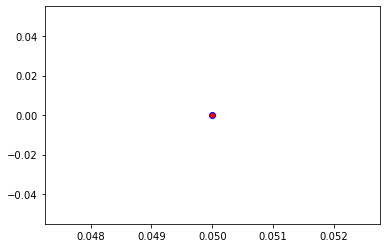

Counter: 225
000000259382 288 = leopard
000000259571 569 = garbage truck
000000259597 762 = restaurant
000000259625 385 = Indian elephant
000000259640 582 = grocery store
000000259690 880 = unicycle
000000259830 612 = jinrikisha
000000259854 919 = street sign
000000260105 461 = plate
000000260106 358 = pole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


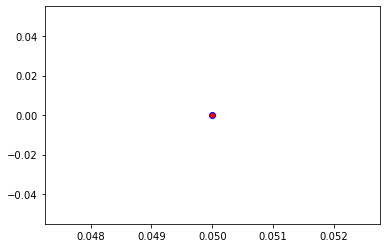

Counter: 226
000000260261 582 = grocery store
000000260266 358 = pole
000000260470 415 = bakery
000000260657 919 = street sign
000000260925 859 = toaster
000000261036 429 = baseball
000000261061 842 = swimming trunks
000000261097 752 = racket
000000261116 570 = mask
000000261161 239 = Bernese mountain dog
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


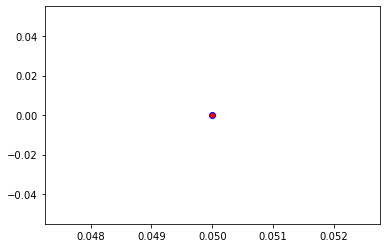

Counter: 227
000000261318 612 = jinrikisha
000000261535 752 = racket
000000261706 264 = Cardigan
000000261712 293 = cheetah
000000261732 752 = racket
000000261796 449 = boathouse
000000261888 671 = mountain bike
000000261982 770 = running shoe
000000262048 879 = umbrella
000000262227 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


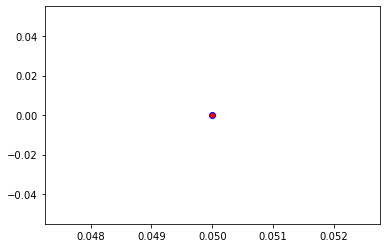

Counter: 228
000000262440 896 = washbasin
000000262487 981 = ballplayer
000000262587 814 = speedboat
000000262631 971 = bubble
000000262682 651 = microwave
000000262895 639 = suit
000000262938 850 = teddy
000000263068 421 = bannister
000000263299 779 = school bus
000000263403 562 = fountain
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


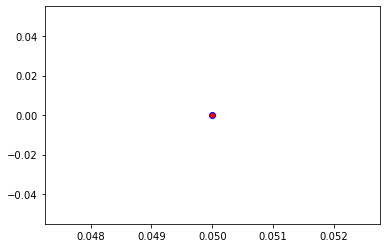

Counter: 229
000000263425 410 = apiary
000000263463 475 = car mirror
000000263474 544 = Dutch oven
000000263594 436 = beach wagon
000000263644 564 = four-poster
000000263679 879 = umbrella
000000263796 634 = lumbermill
000000263860 386 = African elephant
000000263966 385 = Indian elephant
000000263969 982 = groom
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


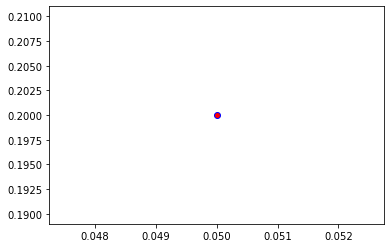

Counter: 230
000000264335 21 = kite
000000264441 204 = Lhasa
000000264535 703 = park bench
000000264968 429 = baseball
000000265108 417 = balloon
000000265518 813 = spatula
000000265777 957 = pomegranate
000000265816 603 = horse cart
000000266082 863 = totem pole
000000266206 799 = sliding door
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


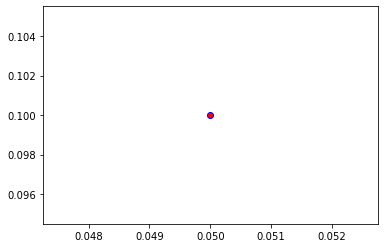

Counter: 231
000000266400 670 = motor scooter
000000266409 248 = ski
000000266768 756 = rain barrel
000000266892 752 = racket
000000266981 557 = flagpole
000000267169 354 = Arabian camel
000000267191 386 = African elephant
000000267300 172 = whippet
000000267351 442 = bell cote
000000267434 37 = ox
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


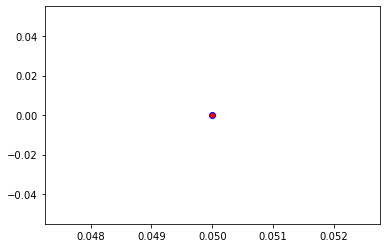

Counter: 232
000000267537 612 = jinrikisha
000000267670 896 = washbasin
000000267903 896 = washbasin
000000267933 958 = hay
000000267940 404 = liner
000000267946 919 = street sign
000000268000 821 = steel arch bridge
000000268375 385 = Indian elephant
000000268378 641 = maraca
000000268729 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


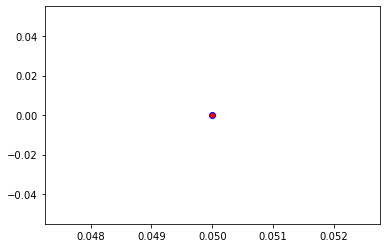

Counter: 233
000000268831 794 = shower curtain
000000268996 919 = street sign
000000269113 151 = Chihuahua
000000269121 752 = racket
000000269196 54 = hog
000000269314 952 = fig
000000269316 768 = rugby ball
000000269632 779 = school bus
000000269682 920 = traffic light
000000269866 651 = microwave
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


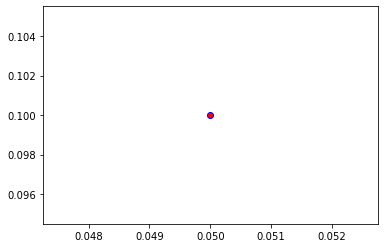

Counter: 234
000000269932 424 = barbershop
000000269942 920 = traffic light
000000270066 665 = moped
000000270122 460 = breakwater
000000270244 340 = zebra
000000270297 547 = electric locomotive
000000270386 919 = street sign
000000270402 386 = African elephant
000000270474 655 = miniskirt
000000270677 610 = jersey
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


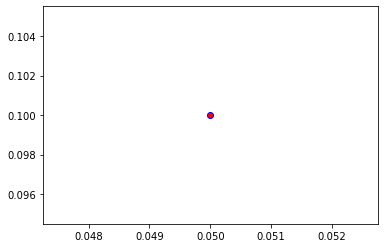

Counter: 235
000000270705 21 = kite
000000270883 831 = studio couch
000000270908 752 = racket
000000271116 639 = suit
000000271402 752 = racket
000000271457 67 = dam
000000271471 954 = banana
000000271728 263 = Pembroke
000000271997 457 = bow tie
000000272049 779 = school bus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


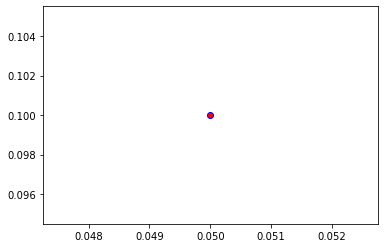

Counter: 236
000000272136 833 = submarine
000000272148 977 = sandbar
000000272212 354 = Arabian camel
000000272364 62 = rock python
000000272416 861 = toilet seat
000000272566 954 = banana
000000273132 586 = half track
000000273198 282 = tiger cat
000000273232 541 = drum
000000273420 696 = paintbrush
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


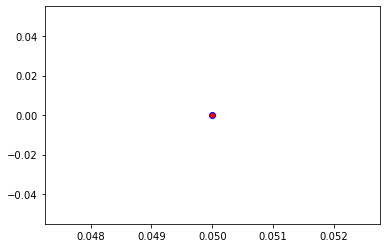

Counter: 237
000000273493 805 = soccer ball
000000273551 665 = moped
000000273617 920 = traffic light
000000273642 241 = EntleBucher
000000273711 461 = plate
000000273712 894 = wardrobe
000000273715 248 = ski
000000273760 752 = racket
000000274066 693 = paddle
000000274219 457 = bow tie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


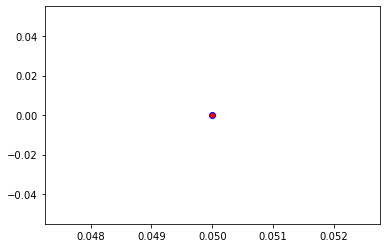

Counter: 238
000000274272 920 = traffic light
000000274411 752 = racket
000000274460 977 = sandbar
000000274687 444 = bicycle-built-for-two
000000274708 549 = envelope
000000275058 864 = wreck
000000275198 879 = umbrella
000000275392 339 = sorrel
000000275727 547 = electric locomotive
000000275749 526 = desk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


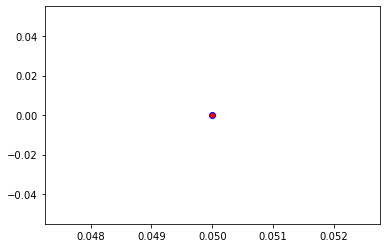

Counter: 239
000000275791 829 = streetcar
000000276018 645 = maypole
000000276024 354 = Arabian camel
000000276055 971 = bubble
000000276284 665 = moped
000000276285 461 = plate
000000276434 461 = plate
000000276707 424 = barbershop
000000276720 483 = castle
000000276804 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


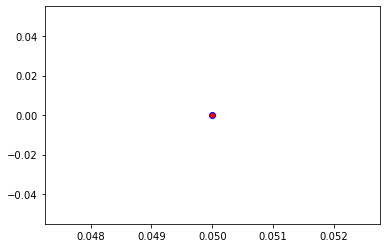

Counter: 240
000000276921 850 = teddy
000000277005 498 = cinema
000000277020 743 = prison
000000277051 12 = house finch
000000277197 406 = altar
000000277584 284 = Siamese cat
000000277689 41 = hip
000000278006 498 = cinema
000000278353 5 = ram
000000278463 526 = desk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


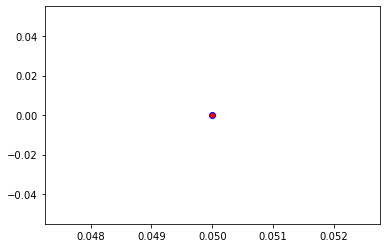

Counter: 241
000000278705 702 = parallel bars
000000278749 523 = crutch
000000278848 879 = umbrella
000000278973 693 = paddle
000000279145 28 = pot
000000279278 444 = bicycle-built-for-two
000000279541 582 = grocery store
000000279714 475 = car mirror
000000279730 934 = hotdog
000000279769 721 = pillow
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


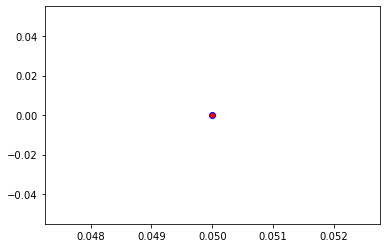

Counter: 242
000000279774 981 = ballplayer
000000279887 788 = shoe shop
000000279927 866 = tractor
000000280325 704 = parking meter
000000280710 829 = streetcar
000000280779 248 = ski
000000280891 950 = orange
000000280918 827 = stove
000000280930 491 = chain saw
000000281032 766 = rotisserie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


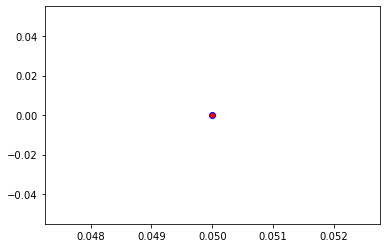

Counter: 243
000000281179 920 = traffic light
000000281409 981 = ballplayer
000000281414 843 = swing
000000281447 339 = sorrel
000000281687 401 = accordion
000000281693 404 = airliner
000000281754 879 = umbrella
000000281759 805 = soccer ball
000000281929 444 = bicycle-built-for-two
000000282037 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


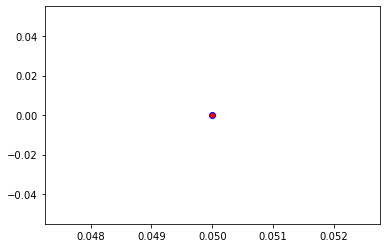

Counter: 244
000000282046 428 = barrow
000000282296 760 = refrigerator
000000282298 877 = turnstile
000000282912 293 = cheetah
000000283037 920 = traffic light
000000283038 919 = street sign
000000283070 950 = orange
000000283113 934 = hotdog
000000283268 838 = sunscreen
000000283318 424 = barbershop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


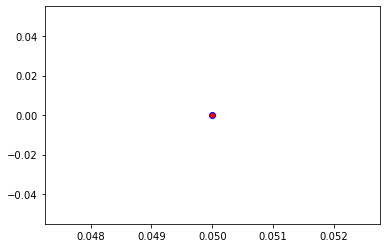

Counter: 245
000000283412 265 = toy poodle
000000283520 634 = lumbermill
000000283717 651 = microwave
000000283785 788 = shoe shop
000000284106 461 = plate
000000284279 19 = chickadee
000000284282 700 = paper towel
000000284296 293 = cheetah
000000284445 134 = crane
000000284623 285 = Egyptian cat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


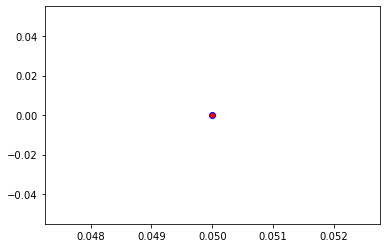

Counter: 246
000000284698 575 = golfcart
000000284725 829 = streetcar
000000284743 819 = stage
000000284762 920 = traffic light
000000284764 845 = syringe
000000284991 898 = water bottle
000000285047 778 = scale
000000285349 509 = confectionery
000000285788 386 = African elephant
000000285894 355 = llama
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


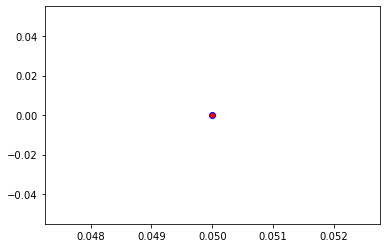

Counter: 247
000000286182 762 = restaurant
000000286422 914 = yawl
000000286458 481 = cassette
000000286503 354 = Arabian camel
000000286507 565 = freight car
000000286523 424 = barbershop
000000286553 762 = restaurant
000000286660 850 = teddy
000000286708 434 = bath towel
000000286849 61 = boa constrictor
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


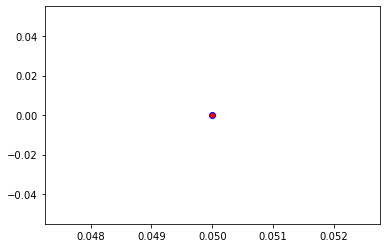

Counter: 248
000000286907 861 = toilet seat
000000286908 952 = fig
000000286994 354 = Arabian camel
000000287291 704 = parking meter
000000287347 762 = restaurant
000000287527 452 = bonnet
000000287545 290 = jaguar
000000287649 508 = computer keyboard
000000287667 641 = maraca
000000287714 648 = medicine chest
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


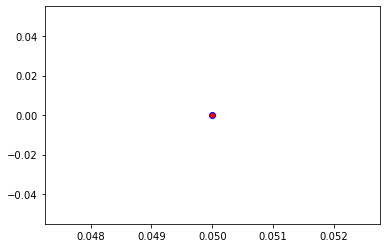

Counter: 249
000000287874 705 = passenger car
000000287959 934 = hotdog
000000288042 67 = dam
000000288062 861 = toilet seat
000000288391 674 = mousetrap
000000288430 977 = sandbar
000000288584 645 = maypole
000000288685 5 = ram
000000288762 461 = plate
000000288862 884 = vault
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


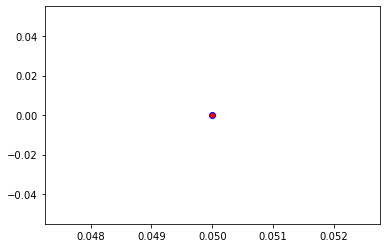

Counter: 250
000000288882 23 = vulture
000000289059 752 = racket
000000289222 920 = traffic light
000000289229 617 = lab coat
000000289343 791 = shopping cart
000000289393 112 = conch
000000289415 963 = pizza
000000289417 248 = ski
000000289516 409 = analog clock
000000289586 63 = Indian cobra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


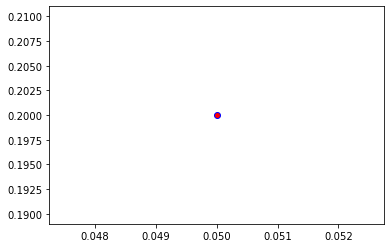

Counter: 251
000000289594 498 = cinema
000000289659 290 = jaguar
000000289702 254 = pug
000000289741 978 = seashore
000000289938 561 = forklift
000000289960 701 = parachute
000000289992 896 = washbasin
000000290081 950 = orange
000000290163 461 = plate
000000290179 839 = suspension bridge
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


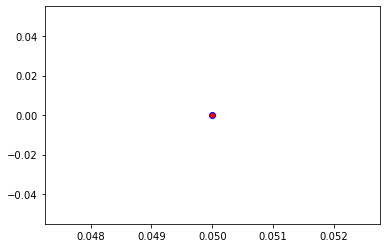

Counter: 252
000000290248 442 = bell cote
000000290293 466 = bullet train
000000290592 5 = ram
000000290619 544 = Dutch oven
000000290768 651 = microwave
000000290771 799 = sliding door
000000290833 340 = zebra
000000290843 285 = Egyptian cat
000000291490 285 = Egyptian cat
000000291551 416 = balance beam
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


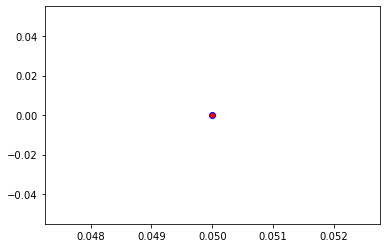

Counter: 253
000000291619 523 = crutch
000000291634 665 = moped
000000291664 159 = Rhodesian ridgeback
000000291791 665 = moped
000000291861 340 = zebra
000000292005 648 = medicine chest
000000292024 963 = pizza
000000292060 827 = stove
000000292082 982 = groom
000000292155 735 = poncho
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


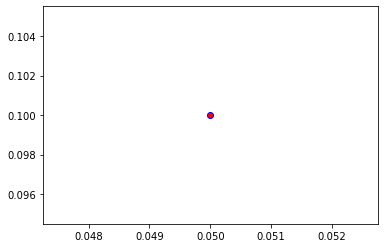

Counter: 254
000000292225 602 = horizontal bar
000000292236 515 = cowboy hat
000000292330 207 = golden retriever
000000292415 864 = wreck
000000292446 611 = jigsaw puzzle
000000292456 670 = motor scooter
000000292488 487 = cellular telephone
000000292908 977 = sandbar
000000292997 803 = snowplow
000000293044 962 = meat loaf
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


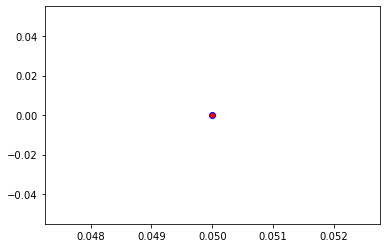

Counter: 255
000000293071 704 = parking meter
000000293200 645 = maypole
000000293245 665 = moped
000000293300 386 = African elephant
000000293324 404 = airliner
000000293390 896 = washbasin
000000293474 440 = beer bottle
000000293625 680 = nipple
000000293794 954 = banana
000000293804 905 = window shade
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


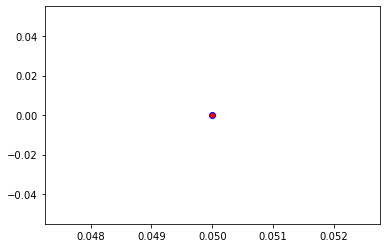

Counter: 256
000000293858 965 = burrito
000000294162 681 = notebook
000000294163 442 = bell cote
000000294350 691 = oxygen mask
000000294695 701 = parachute
000000294783 624 = library
000000294831 963 = pizza
000000294855 872 = tripod
000000295138 880 = unicycle
000000295231 5 = ram
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


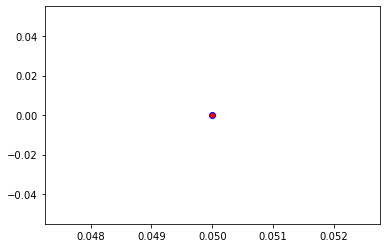

Counter: 257
000000295316 983 = scuba diver
000000295420 675 = moving van
000000295478 608 = jean
000000295713 843 = swing
000000295797 538 = dome
000000295809 919 = street sign
000000296222 813 = spatula
000000296224 757 = recreational vehicle
000000296231 851 = television
000000296284 931 = bagel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


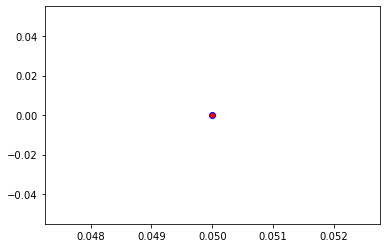

Counter: 258
000000296317 350 = ibex
000000296634 599 = honeycomb
000000296649 665 = moped
000000296657 385 = Indian elephant
000000296969 293 = cheetah
000000297022 609 = jeep
000000297084 762 = restaurant
000000297085 598 = home theater
000000297147 665 = moped
000000297343 644 = matchstick
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


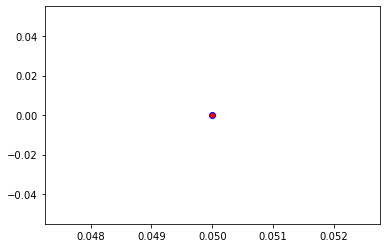

Counter: 259
000000297353 546 = electric guitar
000000297396 960 = chocolate sauce
000000297427 933 = cheeseburger
000000297562 433 = bathing cap
000000297578 982 = groom
000000297595 802 = snowmobile
000000297681 919 = street sign
000000297698 895 = warplane
000000297830 232 = Border collie
000000298251 176 = gazelle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


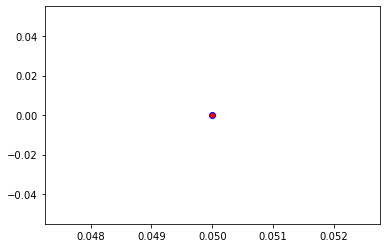

Counter: 260
000000298396 415 = bakery
000000298697 9 = ostrich
000000298738 388 = giant panda
000000298904 899 = water jug
000000298994 329 = cucumber
000000299355 937 = broccoli
000000299553 701 = parachute
000000299609 354 = Arabian camel
000000299720 105 = koala
000000299887 612 = jinrikisha
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


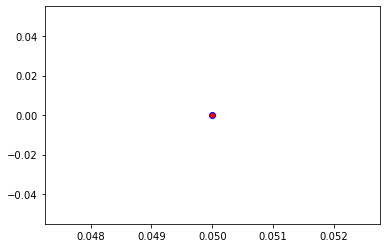

Counter: 261
000000300039 475 = car mirror
000000300155 94 = hummingbird
000000300233 329 = cucumber
000000300276 762 = restaurant
000000300341 722 = ping-pong ball
000000300659 701 = parachute
000000300842 870 = tricycle
000000300913 284 = Siamese cat
000000301061 358 = pole
000000301135 612 = jinrikisha
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


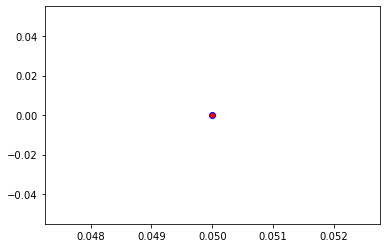

Counter: 262
000000301376 920 = traffic light
000000301421 526 = desk
000000301563 248 = ski
000000301718 461 = plate
000000301867 655 = miniskirt
000000301981 173 = Ibizan hound
000000302030 526 = desk
000000302107 429 = baseball
000000302165 37 = ox
000000302452 355 = llama
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


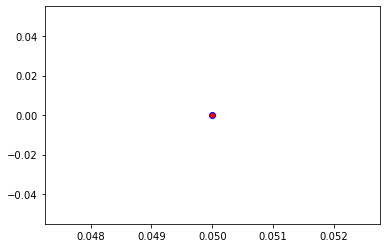

Counter: 263
000000302536 731 = plunger
000000302760 896 = washbasin
000000302882 761 = remote control
000000302990 223 = schipperke
000000303305 874 = trolleybus
000000303499 37 = ox
000000303566 582 = grocery store
000000303653 339 = sorrel
000000303713 819 = stage
000000303818 324 = cab
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


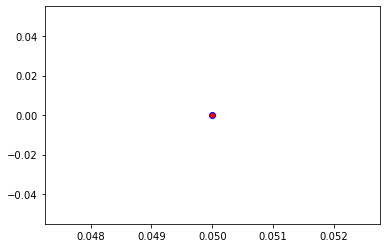

Counter: 264
000000303863 547 = electric locomotive
000000303893 703 = park bench
000000303908 703 = park bench
000000304180 862 = torch
000000304291 347 = bison
000000304365 547 = electric locomotive
000000304396 442 = bell cote
000000304404 981 = ballplayer
000000304545 636 = mailbag
000000304560 285 = Egyptian cat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


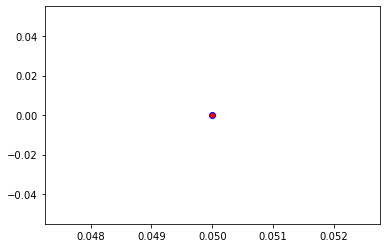

Counter: 265
000000304812 978 = seashore
000000304817 626 = lighter
000000304984 461 = plate
000000305309 768 = rugby ball
000000305317 701 = parachute
000000305343 883 = vase
000000305609 868 = tray
000000305695 791 = shopping cart
000000306136 874 = trolleybus
000000306139 526 = desk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


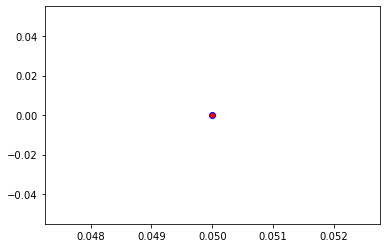

Counter: 266
000000306437 707 = pay-phone
000000306582 37 = ox
000000306700 963 = pizza
000000306733 794 = shower curtain
000000306893 829 = streetcar
000000307074 919 = street sign
000000307145 651 = microwave
000000307172 963 = pizza
000000307598 547 = electric locomotive
000000307658 294 = brown bear
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


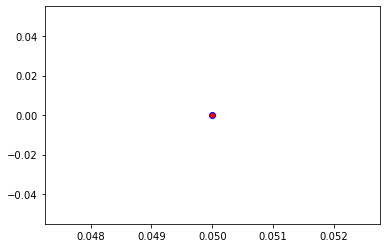

Counter: 267
000000308165 460 = breakwater
000000308193 442 = bell cote
000000308328 830 = stretcher
000000308391 424 = barbershop
000000308394 799 = sliding door
000000308430 909 = wok
000000308466 435 = tub
000000308476 296 = ice bear
000000308531 442 = bell cote
000000308545 787 = shield
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


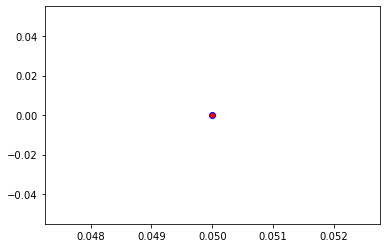

Counter: 268
000000308587 460 = breakwater
000000308631 665 = moped
000000308753 500 = cliff dwelling
000000308793 671 = mountain bike
000000308799 651 = microwave
000000309173 919 = street sign
000000309391 829 = streetcar
000000309452 95 = jacamar
000000309467 248 = ski
000000309484 234 = Rottweiler
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


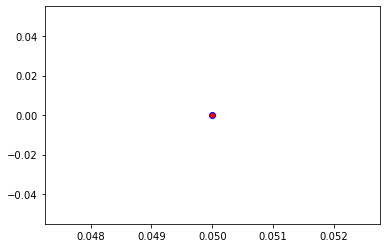

Counter: 269
000000309495 861 = toilet seat
000000309655 248 = ski
000000309678 964 = potpie
000000309938 259 = Pomeranian
000000309964 672 = mountain tent
000000310072 703 = park bench
000000310200 935 = mashed potato
000000310622 919 = street sign
000000310862 906 = Windsor tie
000000310980 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


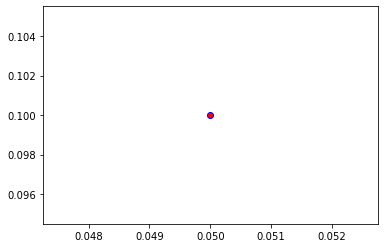

Counter: 270
000000311002 981 = ballplayer
000000311081 794 = shower curtain
000000311180 53 = ringneck snake
000000311190 211 = vizsla
000000311295 340 = zebra
000000311303 504 = coffee mug
000000311392 37 = ox
000000311394 929 = ice lolly
000000311518 576 = gondola
000000311789 673 = mouse
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


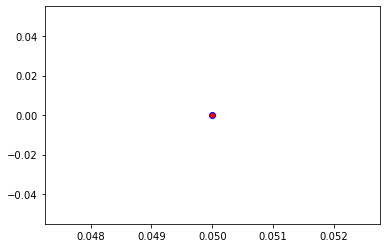

Counter: 271
000000311883 565 = freight car
000000311909 874 = trolleybus
000000311928 429 = baseball
000000311950 934 = hotdog
000000312192 461 = plate
000000312213 620 = laptop
000000312237 978 = seashore
000000312263 538 = dome
000000312278 791 = shopping cart
000000312340 264 = Cardigan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


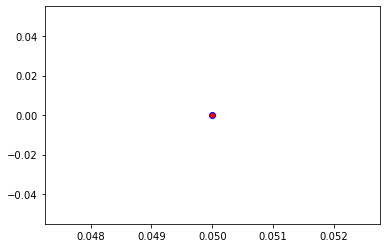

Counter: 272
000000312406 463 = bucket
000000312421 732 = Polaroid camera
000000312489 977 = sandbar
000000312549 919 = street sign
000000312552 813 = spatula
000000312586 295 = American black bear
000000312720 460 = breakwater
000000313034 899 = water jug
000000313130 553 = file
000000313182 654 = minibus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


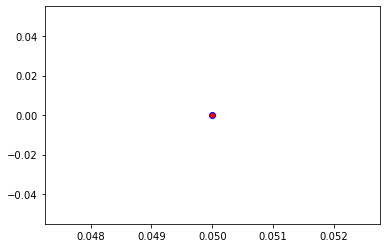

Counter: 273
000000313454 406 = altar
000000313562 454 = bookshop
000000313588 879 = umbrella
000000313783 962 = meat loaf
000000314034 274 = dhole
000000314177 857 = throne
000000314182 461 = plate
000000314251 863 = totem pole
000000314264 478 = carton
000000314294 386 = African elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


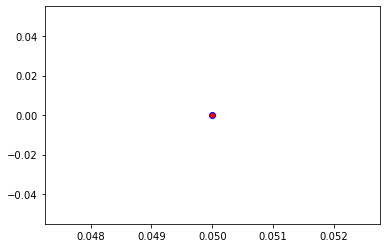

Counter: 274
000000314541 703 = park bench
000000314709 248 = ski
000000314914 919 = street sign
000000315001 354 = Arabian camel
000000315187 874 = trolleybus
000000315219 512 = corkscrew
000000315257 14 = indigo bunting
000000315450 569 = garbage truck
000000315492 816 = spindle
000000316015 527 = desktop computer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


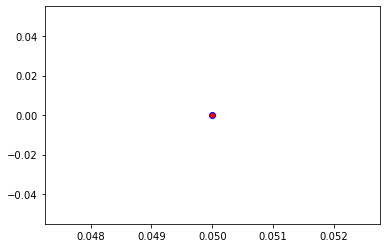

Counter: 275
000000316054 820 = steam locomotive
000000316404 752 = racket
000000316666 406 = altar
000000317024 340 = zebra
000000317433 730 = plow
000000317999 529 = diaper
000000318080 294 = brown bear
000000318114 962 = meat loaf
000000318138 589 = hand blower
000000318238 213 = Irish setter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


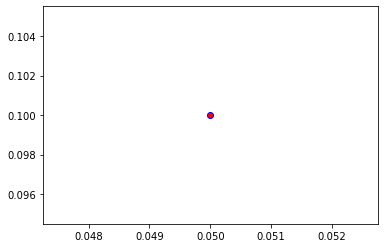

Counter: 276
000000318455 461 = plate
000000318908 204 = Lhasa
000000319100 470 = candle
000000319184 768 = rugby ball
000000319369 853 = thatch
000000319534 705 = passenger car
000000319607 920 = traffic light
000000319617 934 = hotdog
000000319696 651 = microwave
000000319721 339 = sorrel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


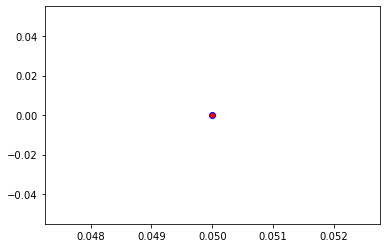

Counter: 277
000000319935 905 = window shade
000000320232 498 = cinema
000000320425 634 = lumbermill
000000320490 429 = baseball
000000320554 383 = Madagascar cat
000000320632 340 = zebra
000000320642 399 = abaya
000000320664 935 = mashed potato
000000320696 140 = alp
000000320706 505 = coffeepot
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


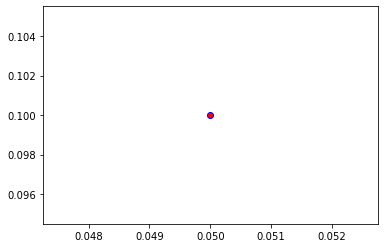

Counter: 278
000000320743 385 = Indian elephant
000000321118 620 = laptop
000000321214 953 = pineapple
000000321333 850 = teddy
000000321557 535 = disk brake
000000321790 752 = racket
000000321887 355 = llama
000000322163 582 = grocery store
000000322211 616 = knot
000000322352 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


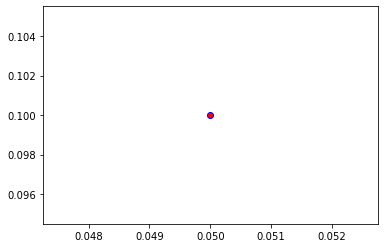

Counter: 279
000000322429 495 = china cabinet
000000322574 934 = hotdog
000000322610 879 = umbrella
000000322724 248 = ski
000000322829 703 = park bench
000000322844 850 = teddy
000000322864 324 = cab
000000322895 532 = dining table
000000322944 850 = teddy
000000322959 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


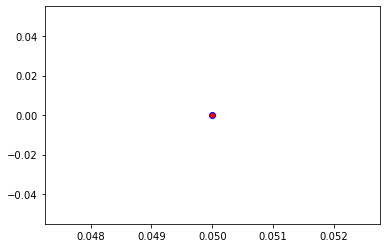

Counter: 280
000000322968 437 = beacon
000000323151 963 = pizza
000000323202 861 = toilet seat
000000323263 642 = marimba
000000323355 567 = frying pan
000000323496 752 = racket
000000323571 919 = street sign
000000323709 404 = airliner
000000323751 705 = passenger car
000000323799 522 = croquet ball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


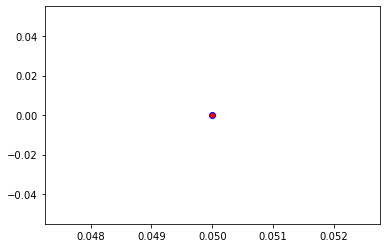

Counter: 281
000000323828 565 = freight car
000000323895 752 = racket
000000324158 880 = unicycle
000000324258 546 = electric guitar
000000324614 650 = microphone
000000324715 681 = notebook
000000324818 88 = macaw
000000324927 845 = syringe
000000325031 51 = triceratops
000000325114 896 = washbasin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


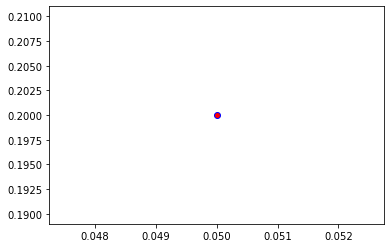

Counter: 282
000000325306 340 = zebra
000000325347 752 = racket
000000325483 593 = harmonica
000000325527 435 = bathtub
000000325838 620 = laptop
000000325991 429 = baseball
000000326082 564 = four-poster
000000326128 248 = ski
000000326174 978 = seashore
000000326248 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


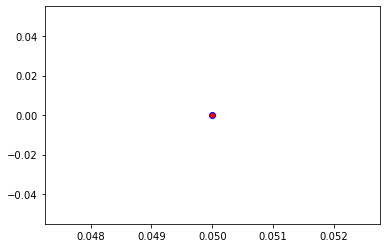

Counter: 283
000000326462 992 = agaric
000000326541 971 = bubble
000000326542 248 = ski
000000326627 919 = street sign
000000326970 838 = sunscreen
000000327306 921 = book jacket
000000327592 731 = plunger
000000327601 655 = miniskirt
000000327605 248 = ski
000000327617 828 = strainer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


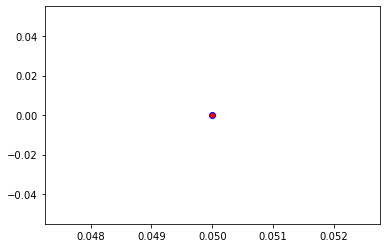

Counter: 284
000000327701 890 = volleyball
000000327769 896 = washbasin
000000327780 928 = ice cream
000000327890 660 = mobile home
000000328030 865 = toyshop
000000328117 766 = rotisserie
000000328238 429 = baseball
000000328286 536 = dock
000000328337 716 = picket fence
000000328430 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


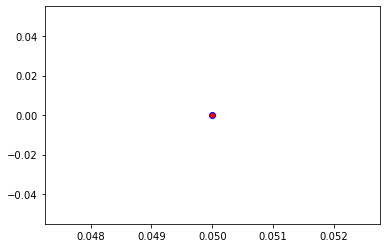

Counter: 285
000000328601 752 = racket
000000328683 704 = parking meter
000000328959 861 = toilet seat
000000329041 423 = barber chair
000000329080 750 = quilt
000000329219 212 = English setter
000000329319 279 = Arctic fox
000000329323 830 = stretcher
000000329447 37 = ox
000000329455 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


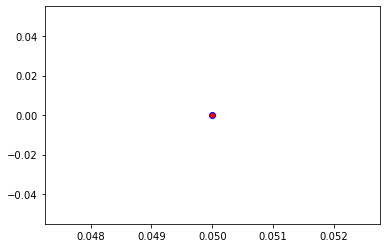

Counter: 286
000000329456 112 = conch
000000329542 928 = ice cream
000000329614 498 = palace
000000329827 248 = ski
000000330369 554 = fireboat
000000330396 189 = Lakeland terrier
000000330554 745 = projector
000000330790 101 = tusker
000000330818 788 = shoe shop
000000331075 239 = Bernese mountain dog
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


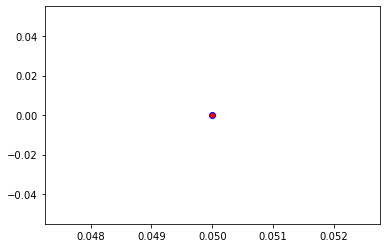

Counter: 287
000000331280 354 = Arabian camel
000000331317 409 = analog clock
000000331352 861 = toilet seat
000000331569 969 = eggnog
000000331604 701 = parachute
000000331799 641 = maraca
000000331817 509 = confectionery
000000332318 979 = valley
000000332351 977 = sandbar
000000332455 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


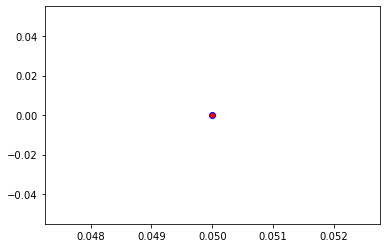

Counter: 288
000000332570 590 = hand-held computer
000000332845 564 = four-poster
000000332901 37 = ox
000000333069 282 = tiger cat
000000333237 743 = prison
000000333402 874 = trolleybus
000000333697 637 = mailbox
000000333745 879 = umbrella
000000333772 264 = Cardigan
000000333956 704 = parking meter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


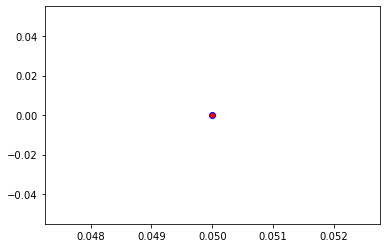

Counter: 289
000000334006 569 = garbage truck
000000334309 929 = ice lolly
000000334371 555 = fire engine
000000334399 786 = sewing machine
000000334417 499 = cleaver
000000334483 611 = jigsaw puzzle
000000334521 912 = worm fence
000000334530 500 = cliff
000000334555 37 = ox
000000334719 977 = sandbar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


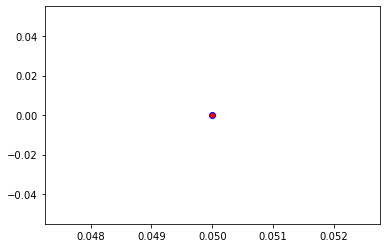

Counter: 290
000000334767 248 = ski
000000334977 886 = vending machine
000000335081 850 = teddy
000000335177 73 = barn
000000335328 693 = paddle
000000335427 937 = broccoli
000000335450 339 = sorrel
000000335529 536 = dock
000000335658 673 = mouse
000000335800 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


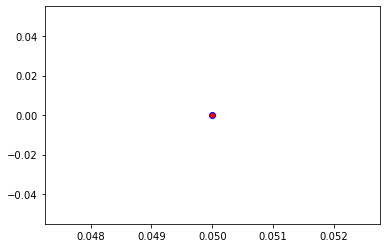

Counter: 291
000000335954 924 = guacamole
000000336053 118 = Dungeness crab
000000336209 880 = unicycle
000000336232 670 = motor scooter
000000336265 203 = West Highland white terrier
000000336309 404 = airliner
000000336356 963 = pizza
000000336587 919 = street sign
000000336628 614 = kimono
000000336658 978 = seashore
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


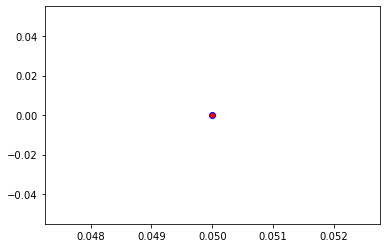

Counter: 292
000000337055 416 = balance beam
000000337498 962 = meat loaf
000000337987 21 = kite
000000338191 447 = binoculars
000000338219 665 = moped
000000338304 858 = tile roof
000000338325 318 = wing
000000338428 717 = pickup
000000338532 9 = ostrich
000000338560 412 = ashcan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


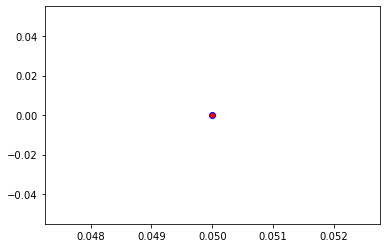

Counter: 293
000000338624 561 = forklift
000000338625 874 = trolleybus
000000338718 656 = minivan
000000338901 750 = quilt
000000338905 762 = restaurant
000000338986 829 = streetcar
000000339442 933 = cheeseburger
000000339823 879 = umbrella
000000339870 920 = traffic light
000000340015 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


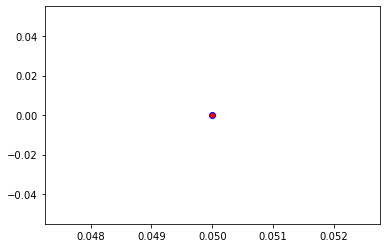

Counter: 294
000000340175 905 = window shade
000000340272 54 = hog
000000340451 703 = park bench
000000340697 711 = perfume
000000340894 526 = desk
000000340930 504 = coffee mug
000000341058 447 = binoculars
000000341094 866 = tractor
000000341196 148 = killer whale
000000341469 882 = vacuum
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


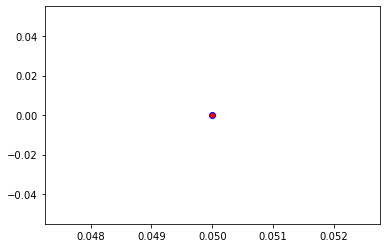

Counter: 295
000000341681 752 = racket
000000341719 140 = alp
000000341828 961 = dough
000000341921 703 = park bench
000000341973 965 = burrito
000000342006 498 = palace
000000342128 805 = soccer ball
000000342186 963 = pizza
000000342295 435 = tub
000000342367 851 = television
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


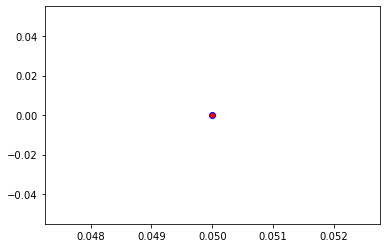

Counter: 296
000000342397 248 = ski
000000342971 792 = shovel
000000343076 282 = tiger cat
000000343149 498 = cinema
000000343218 752 = racket
000000343315 756 = rain barrel
000000343453 248 = ski
000000343466 651 = microwave
000000343496 920 = traffic light
000000343524 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


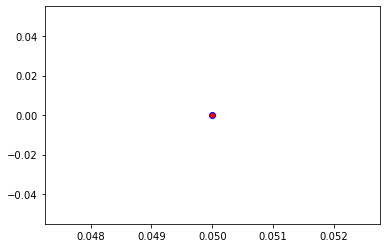

Counter: 297
000000343561 444 = bicycle-built-for-two
000000343706 785 = seat belt
000000343803 981 = ballplayer
000000343934 665 = moped
000000343937 248 = ski
000000343976 829 = streetcar
000000344029 874 = trolleybus
000000344059 293 = cheetah
000000344100 461 = plate
000000344268 639 = suit
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


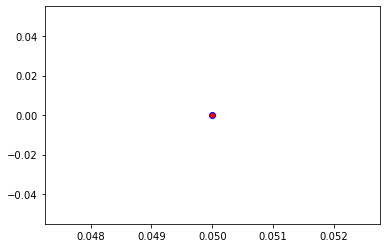

Counter: 298
000000344611 565 = freight car
000000344614 442 = bell cote
000000344621 831 = studio couch
000000344795 851 = television
000000344816 705 = passenger car
000000344888 730 = plow
000000344909 637 = mailbox
000000345027 460 = breakwater
000000345252 882 = vacuum
000000345261 355 = llama
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


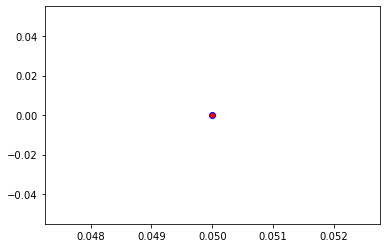

Counter: 299
000000345356 171 = Italian greyhound
000000345361 929 = ice lolly
000000345385 797 = sleeping bag
000000345397 813 = spatula
000000345466 981 = ballplayer
000000345469 860 = tobacco shop
000000345941 960 = chocolate sauce
000000346232 879 = umbrella
000000346638 673 = mouse
000000346703 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


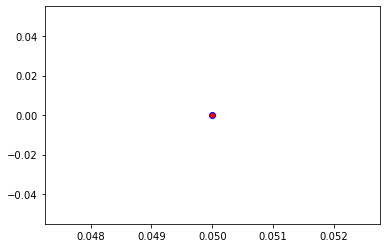

Counter: 300
000000346707 954 = banana
000000346905 386 = African elephant
000000346968 487 = cellular telephone
000000347163 919 = street sign
000000347174 831 = studio couch
000000347254 617 = lab coat
000000347265 248 = ski
000000347335 935 = mashed potato
000000347370 952 = fig
000000347456 386 = African elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


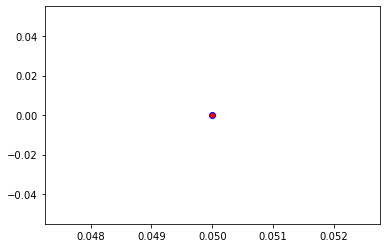

Counter: 301
000000347544 675 = moving van
000000347664 977 = sandbar
000000347693 559 = folding chair
000000347930 168 = redbone
000000348012 836 = sunglass
000000348045 861 = toilet seat
000000348216 756 = rain barrel
000000348243 343 = warthog
000000348481 592 = hard disc
000000348488 883 = vase
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


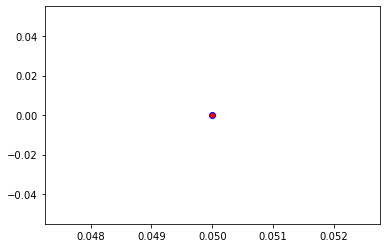

Counter: 302
000000348708 809 = soup bowl
000000348881 466 = bullet train
000000349152 934 = hotdog
000000349184 703 = park bench
000000349302 354 = Arabian camel
000000349480 850 = teddy
000000349594 697 = pajama
000000349678 442 = bell cote
000000349837 760 = refrigerator
000000349860 880 = unicycle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


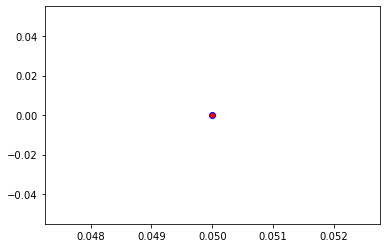

Counter: 303
000000350002 601 = hoopskirt
000000350003 779 = school bus
000000350019 423 = barber chair
000000350023 498 = palace
000000350054 598 = home theater
000000350122 829 = streetcar
000000350148 447 = binoculars
000000350388 809 = soup bowl
000000350405 248 = ski
000000350488 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


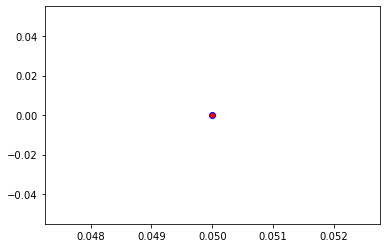

Counter: 304
000000350607 398 = abacus
000000350679 899 = water jug
000000350833 435 = bathtub
000000351096 623 = letter opener
000000351331 963 = pizza
000000351362 669 = mosquito net
000000351530 642 = marimba
000000351559 619 = lampshade
000000351589 703 = park bench
000000351609 950 = orange
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


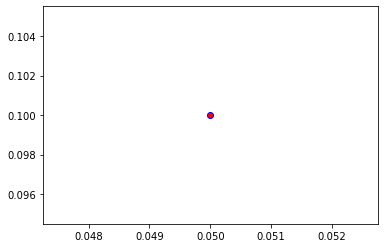

Counter: 305
000000351810 414 = backpack
000000351823 981 = ballplayer
000000352491 705 = passenger car
000000352582 420 = banjo
000000352584 532 = dining table
000000352618 950 = orange
000000352684 830 = stretcher
000000352760 319 = dragonfly
000000352900 959 = carbonara
000000353027 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


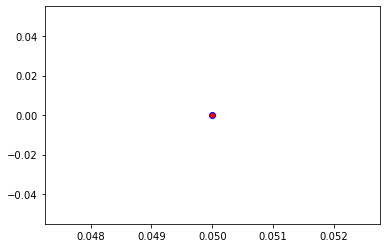

Counter: 306
000000353051 339 = sorrel
000000353096 527 = desktop computer
000000353180 829 = streetcar
000000353518 978 = seashore
000000353970 463 = bucket
000000354072 786 = sewing machine
000000354307 54 = hog
000000354547 639 = suit
000000354753 920 = traffic light
000000354829 627 = limousine
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


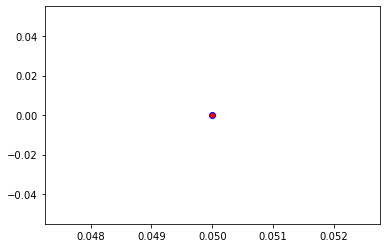

Counter: 307
000000355169 781 = scoreboard
000000355240 467 = butcher shop
000000355257 688 = oscilloscope
000000355325 963 = pizza
000000355610 850 = teddy
000000355677 693 = paddle
000000355817 874 = trolleybus
000000355905 180 = American Staffordshire terrier
000000356094 981 = ballplayer
000000356125 386 = African elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


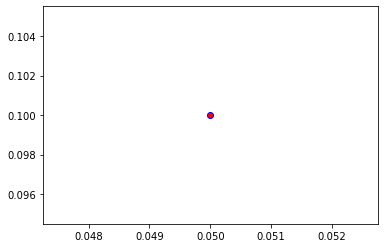

Counter: 308
000000356169 660 = mobile home
000000356248 762 = restaurant
000000356261 37 = ox
000000356347 469 = caldron
000000356387 324 = cab
000000356424 762 = restaurant
000000356427 634 = lumbermill
000000356428 788 = shoe shop
000000356432 831 = studio couch
000000356498 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


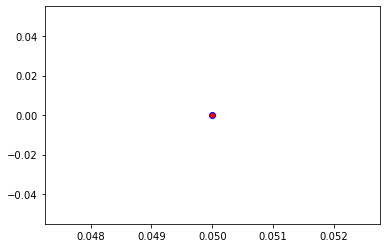

Counter: 309
000000356505 842 = swimming trunks
000000356531 66 = corn
000000356612 690 = oxcart
000000356968 339 = sorrel
000000357060 142 = dowitcher
000000357081 37 = ox
000000357238 701 = parachute
000000357430 963 = pizza
000000357459 192 = cairn
000000357501 849 = teapot
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


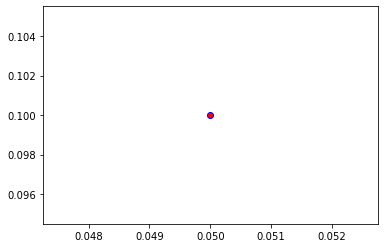

Counter: 310
000000357567 861 = toilet seat
000000357737 612 = jinrikisha
000000357742 248 = ski
000000357748 654 = minibus
000000357816 981 = ballplayer
000000357888 879 = umbrella
000000357903 963 = pizza
000000357941 851 = television
000000357978 799 = sliding door
000000358195 614 = kimono
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


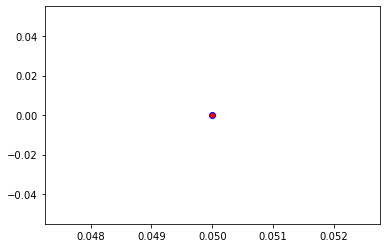

Counter: 311
000000358427 937 = broccoli
000000358525 508 = computer keyboard
000000358923 518 = crash helmet
000000359135 386 = African elephant
000000359219 962 = meat loaf
000000359540 981 = ballplayer
000000359677 484 = catamaran
000000359781 9 = ostrich
000000359833 952 = fig
000000359855 621 = lawn mower
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


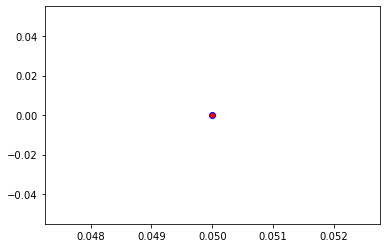

Counter: 312
000000359937 705 = passenger car
000000360097 408 = amphibian
000000360137 703 = park bench
000000360325 355 = llama
000000360393 963 = pizza
000000360564 534 = washer
000000360661 354 = Arabian camel
000000360943 539 = doormat
000000360951 664 = monitor
000000360960 879 = umbrella
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


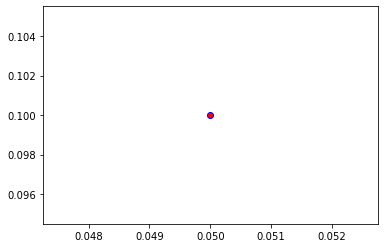

Counter: 313
000000361103 707 = pay-phone
000000361142 498 = palace
000000361147 752 = racket
000000361180 294 = brown bear
000000361238 963 = pizza
000000361268 339 = sorrel
000000361506 324 = cab
000000361551 537 = dogsled
000000361571 208 = Labrador retriever
000000361586 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


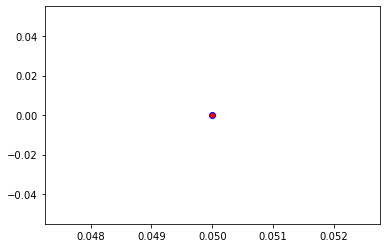

Counter: 314
000000361621 285 = Egyptian cat
000000361730 978 = seashore
000000361919 140 = alp
000000362434 850 = teddy
000000362520 408 = amphibian
000000362682 654 = minibus
000000362716 752 = racket
000000363072 565 = freight car
000000363188 467 = butcher shop
000000363207 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


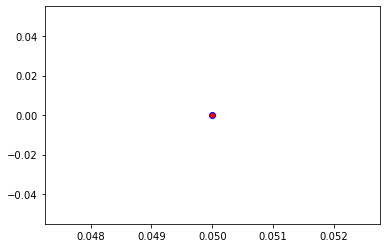

Counter: 315
000000363461 526 = desk
000000363666 461 = plate
000000363784 435 = bathtub
000000363840 620 = laptop
000000363875 670 = motor scooter
000000364102 416 = balance beam
000000364126 693 = paddle
000000364166 340 = zebra
000000364297 620 = laptop
000000364322 5 = ram
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


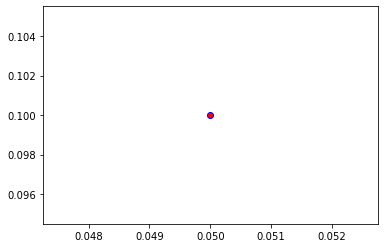

Counter: 316
000000364557 562 = fountain
000000364587 547 = electric locomotive
000000364636 243 = bull mastiff
000000364884 450 = bobsled
000000365095 805 = soccer ball
000000365098 472 = canoe
000000365207 475 = car mirror
000000365208 879 = umbrella
000000365385 647 = measuring cup
000000365387 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


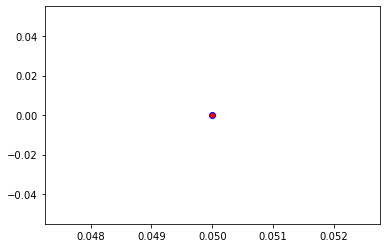

Counter: 317
000000365521 248 = ski
000000365642 655 = miniskirt
000000365655 609 = jeep
000000365745 569 = garbage truck
000000365766 651 = microwave
000000365886 487 = cellular telephone
000000366141 598 = home theater
000000366178 450 = bobsled
000000366199 112 = conch
000000366225 527 = desktop computer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


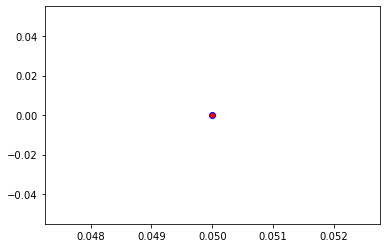

Counter: 318
000000366611 180 = American Staffordshire terrier
000000366711 950 = orange
000000366884 799 = sliding door
000000367082 234 = Rottweiler
000000367095 526 = desk
000000367195 263 = Pembroke
000000367228 879 = umbrella
000000367386 831 = studio couch
000000367569 598 = home theater
000000367680 654 = minibus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


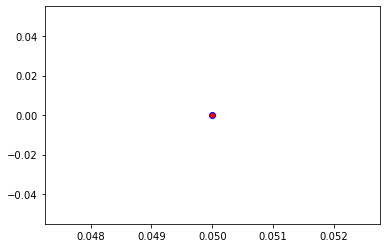

Counter: 319
000000367818 339 = sorrel
000000368038 547 = electric locomotive
000000368212 929 = ice lolly
000000368294 410 = apiary
000000368335 354 = Arabian camel
000000368456 565 = freight car
000000368684 851 = television
000000368752 461 = plate
000000368900 423 = barber chair
000000368940 896 = washbasin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


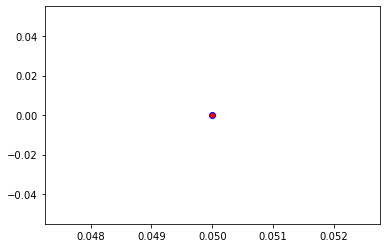

Counter: 320
000000368961 386 = African elephant
000000368982 784 = screwdriver
000000369037 385 = Indian elephant
000000369081 339 = sorrel
000000369310 981 = ballplayer
000000369323 752 = racket
000000369370 924 = guacamole
000000369442 54 = hog
000000369503 534 = dishwasher
000000369541 232 = Border collie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


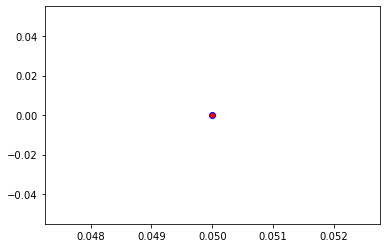

Counter: 321
000000369675 705 = passenger car
000000369751 704 = parking meter
000000369757 415 = bakery
000000369771 928 = ice cream
000000369812 919 = street sign
000000370042 775 = sarong
000000370208 704 = parking meter
000000370270 454 = bookshop
000000370375 981 = ballplayer
000000370478 742 = printer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


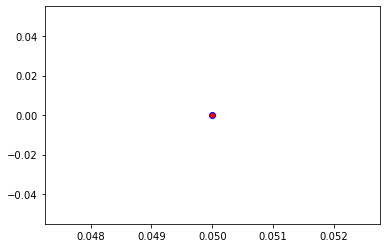

Counter: 322
000000370486 808 = sombrero
000000370677 582 = grocery store
000000370711 865 = toyshop
000000370813 920 = traffic light
000000370818 648 = medicine chest
000000370900 850 = teddy
000000370999 635 = magnetic compass
000000371042 752 = racket
000000371472 953 = pineapple
000000371529 861 = toilet seat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


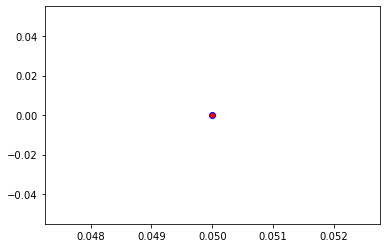

Counter: 323
000000371552 805 = soccer ball
000000371677 851 = television
000000371699 624 = library
000000371749 217 = English springer
000000372203 843 = swing
000000372260 409 = analog clock
000000372307 73 = barn
000000372317 555 = fire engine
000000372349 801 = snorkel
000000372466 673 = mouse
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


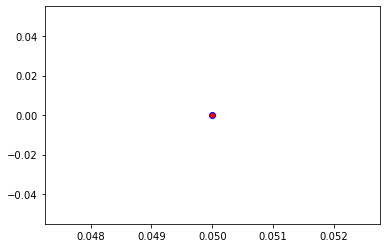

Counter: 324
000000372577 752 = racket
000000372718 883 = vase
000000372819 162 = beagle
000000373315 248 = ski
000000373353 829 = streetcar
000000373382 752 = racket
000000373705 862 = torch
000000374052 447 = binoculars
000000374083 891 = waffle iron
000000374369 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


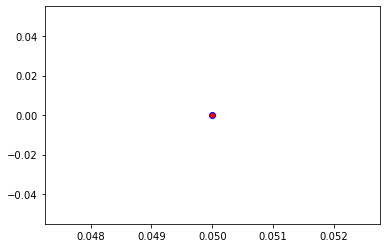

Counter: 325
000000374545 557 = flagpole
000000374551 13 = junco
000000374727 919 = street sign
000000374982 963 = pizza
000000375015 295 = American black bear
000000375078 512 = corkscrew
000000375278 223 = schipperke
000000375430 928 = ice cream
000000375469 148 = killer whale
000000375493 552 = feather boa
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


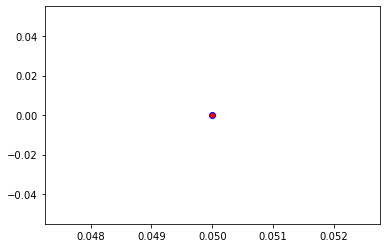

Counter: 326
000000375763 5 = ram
000000376093 589 = hand blower
000000376112 248 = ski
000000376206 693 = paddle
000000376264 131 = rule
000000376278 340 = zebra
000000376284 412 = ashcan
000000376307 954 = banana
000000376310 495 = china cabinet
000000376322 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


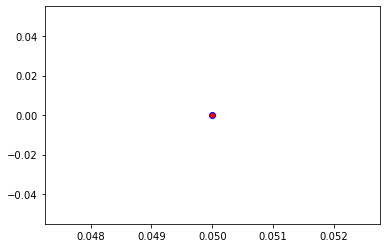

Counter: 327
000000376365 818 = spotlight
000000376442 999 = toilet tissue
000000376478 883 = vase
000000376625 829 = streetcar
000000376856 442 = bell cote
000000376900 752 = racket
000000377000 283 = Persian cat
000000377113 248 = ski
000000377239 879 = umbrella
000000377368 533 = dishrag
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


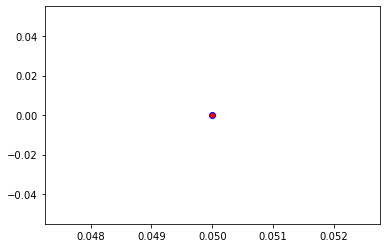

Counter: 328
000000377393 639 = tank
000000377486 346 = water buffalo
000000377497 340 = zebra
000000377575 266 = miniature poodle
000000377588 981 = ballplayer
000000377635 421 = bannister
000000377670 726 = plane
000000377723 874 = trolleybus
000000377814 931 = bagel
000000377882 489 = chainlink fence
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


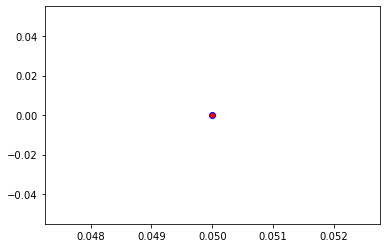

Counter: 329
000000377946 407 = ambulance
000000378099 673 = mouse
000000378116 148 = killer whale
000000378139 975 = lakeside
000000378244 802 = snowmobile
000000378284 963 = pizza
000000378453 340 = zebra
000000378454 146 = albatross
000000378515 582 = grocery store
000000378605 931 = bagel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


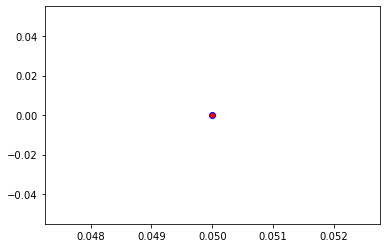

Counter: 330
000000378673 880 = unicycle
000000378873 949 = strawberry
000000379332 752 = racket
000000379441 453 = bookcase
000000379453 404 = airliner
000000379476 497 = church
000000379533 340 = zebra
000000379800 547 = electric locomotive
000000379842 709 = pencil box
000000380203 5 = ram
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


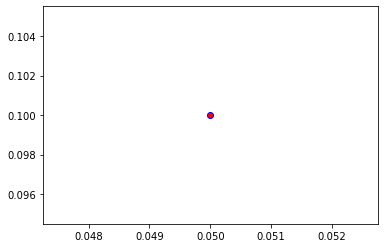

Counter: 331
000000380706 612 = jinrikisha
000000380711 143 = oystercatcher
000000380913 575 = golfcart
000000381360 148 = killer whale
000000381587 532 = dining table
000000381639 646 = maze
000000381971 603 = horse cart
000000382009 752 = racket
000000382030 903 = wig
000000382088 37 = ox
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


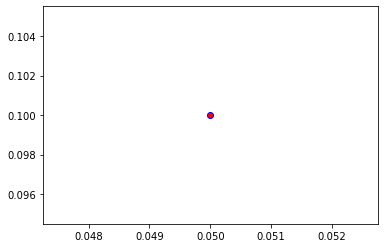

Counter: 332
000000382111 603 = horse cart
000000382122 497 = church
000000382125 470 = candle
000000382696 881 = upright
000000382734 648 = medicine chest
000000382743 701 = parachute
000000383289 880 = unicycle
000000383337 410 = apiary
000000383339 978 = seashore
000000383384 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


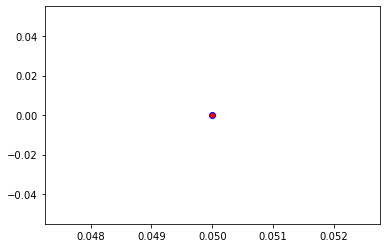

Counter: 333
000000383386 850 = teddy
000000383443 435 = tub
000000383606 896 = washbasin
000000383621 895 = warplane
000000383676 288 = leopard
000000383838 470 = candle
000000383842 617 = lab coat
000000383921 385 = Indian elephant
000000384136 589 = hand blower
000000384350 318 = wing
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


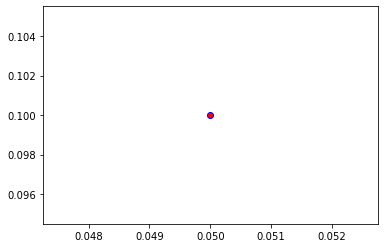

Counter: 334
000000384468 385 = Indian elephant
000000384513 537 = dogsled
000000384527 532 = dining table
000000384616 358 = pole
000000384651 619 = lampshade
000000384661 827 = stove
000000384666 248 = ski
000000384670 752 = racket
000000384808 896 = washbasin
000000384850 794 = shower curtain
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


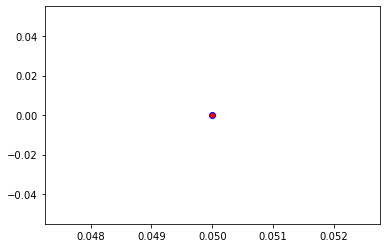

Counter: 335
000000384949 713 = pier
000000385029 910 = wooden spoon
000000385190 480 = cash machine
000000385205 281 = tabby
000000385719 527 = desktop computer
000000385997 471 = cannon
000000386134 962 = meat loaf
000000386210 28 = pot
000000386277 951 = lemon
000000386352 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


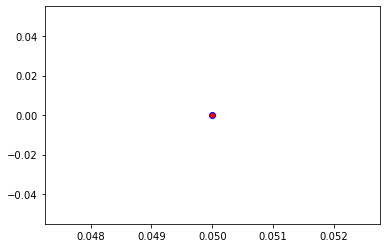

Counter: 336
000000386457 519 = crate
000000386879 752 = racket
000000386912 454 = bookshop
000000387098 526 = desk
000000387148 649 = megalith
000000387383 750 = quilt
000000387387 779 = school bus
000000387916 140 = alp
000000388056 981 = ballplayer
000000388215 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


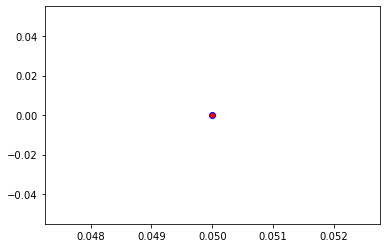

Counter: 337
000000388258 444 = bicycle-built-for-two
000000388846 830 = stretcher
000000388903 433 = bathing cap
000000388927 761 = remote control
000000389109 926 = hot pot
000000389197 450 = bobsled
000000389315 692 = packet
000000389316 386 = African elephant
000000389381 939 = zucchini
000000389451 978 = seashore
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


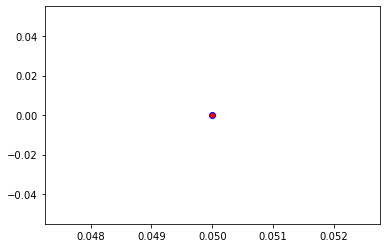

Counter: 338
000000389532 864 = wreck
000000389566 562 = fountain
000000389684 874 = trolleybus
000000389804 861 = toilet seat
000000389812 955 = jackfruit
000000389933 159 = Rhodesian ridgeback
000000390246 842 = swimming trunks
000000390301 562 = fountain
000000390555 715 = pickelhaube
000000390826 388 = giant panda
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


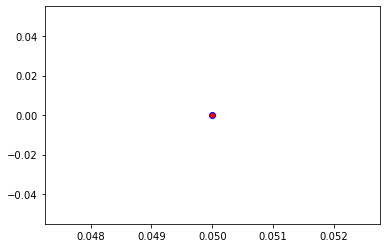

Counter: 339
000000390902 722 = ping-pong ball
000000391140 731 = plunger
000000391144 386 = African elephant
000000391290 805 = soccer ball
000000391375 884 = vault
000000391648 442 = bell cote
000000391722 470 = candle
000000392228 892 = wall clock
000000392481 895 = warplane
000000392722 829 = streetcar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


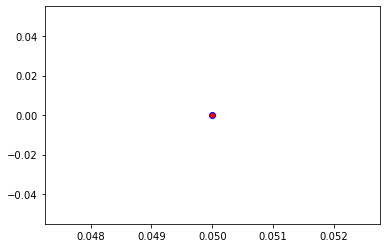

Counter: 340
000000392818 156 = Blenheim spaniel
000000392933 133 = bittern
000000393014 934 = hotdog
000000393056 814 = speedboat
000000393093 829 = streetcar
000000393115 428 = barrow
000000393226 864 = tow truck
000000393282 355 = llama
000000393469 248 = ski
000000393569 648 = medicine chest
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


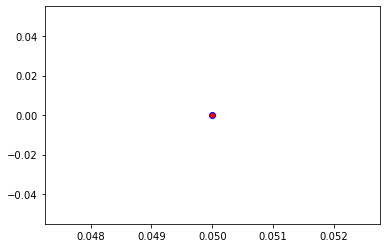

Counter: 341
000000393838 544 = Dutch oven
000000394199 665 = moped
000000394206 612 = jinrikisha
000000394275 874 = trolleybus
000000394328 861 = toilet seat
000000394510 775 = sarong
000000394559 752 = racket
000000394611 9 = ostrich
000000394677 513 = cornet
000000394940 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


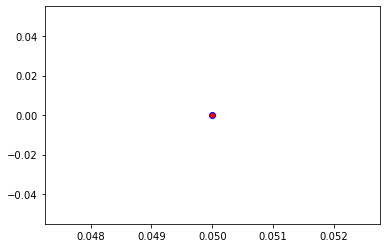

Counter: 342
000000395180 500 = cliff
000000395343 883 = vase
000000395388 634 = lumbermill
000000395575 449 = boathouse
000000395633 536 = dock
000000395701 598 = home theater
000000395801 880 = unicycle
000000395903 460 = breakwater
000000396200 880 = unicycle
000000396205 347 = bison
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


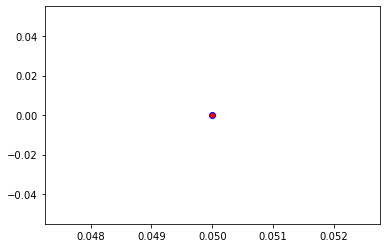

Counter: 343
000000396274 28 = pot
000000396338 324 = cab
000000396518 428 = barrow
000000396526 905 = window shade
000000396568 565 = freight car
000000396580 449 = boathouse
000000396729 662 = modem
000000396863 246 = Great Dane
000000396903 407 = ambulance
000000397133 788 = shoe shop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


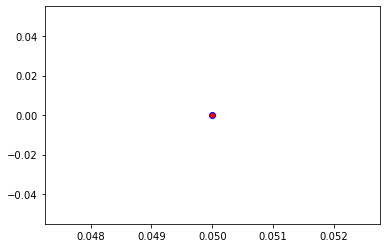

Counter: 344
000000397279 752 = racket
000000397303 788 = shoe shop
000000397327 896 = washbasin
000000397351 582 = grocery store
000000397354 521 = Crock Pot
000000397639 5 = ram
000000397681 950 = orange
000000398028 981 = ballplayer
000000398203 805 = soccer ball
000000398237 417 = balloon
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


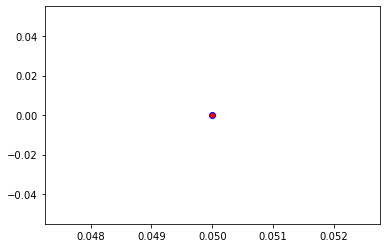

Counter: 345
000000398377 608 = jean
000000398438 112 = conch
000000398652 582 = grocery store
000000398742 768 = rugby ball
000000398810 223 = schipperke
000000398905 819 = stage
000000399205 929 = ice lolly
000000399296 909 = wok
000000399462 805 = soccer ball
000000399560 285 = Egyptian cat
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


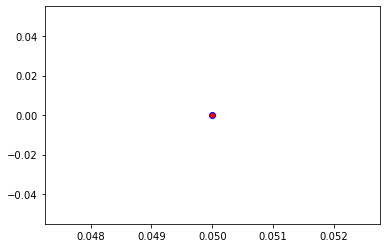

Counter: 346
000000399655 195 = Boston bull
000000399764 37 = ox
000000400044 248 = ski
000000400082 934 = hotdog
000000400161 626 = lighter
000000400367 324 = cab
000000400573 929 = ice lolly
000000400794 843 = swing
000000400803 625 = lifeboat
000000400815 573 = go-kart
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


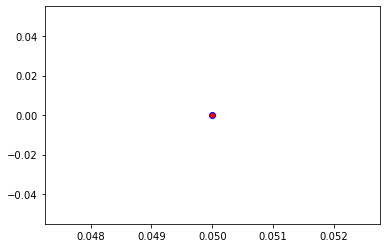

Counter: 347
000000400922 919 = street sign
000000401244 805 = soccer ball
000000401250 134 = crane
000000401446 879 = umbrella
000000401862 555 = fire engine
000000401991 202 = soft-coated wheaten terrier
000000402096 778 = scale
000000402118 248 = ski
000000402334 497 = church
000000402346 41 = hip
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


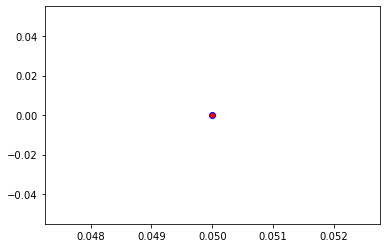

Counter: 348
000000402433 963 = pizza
000000402473 285 = Egyptian cat
000000402519 95 = jacamar
000000402615 981 = ballplayer
000000402720 762 = restaurant
000000402765 761 = remote control
000000402774 879 = umbrella
000000402783 461 = plate
000000402992 347 = bison
000000403122 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


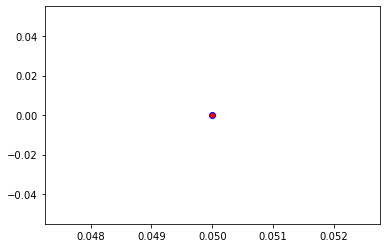

Counter: 349
000000403353 846 = table lamp
000000403385 435 = bathtub
000000403565 671 = mountain bike
000000403584 978 = seashore
000000403817 527 = desktop computer
000000404128 895 = warplane
000000404191 648 = medicine chest
000000404249 596 = hatchet
000000404479 404 = airliner
000000404484 237 = miniature pinscher
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


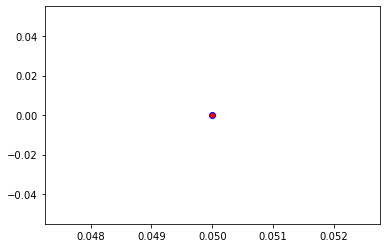

Counter: 350
000000404534 424 = barbershop
000000404568 146 = albatross
000000404601 919 = street sign
000000404678 892 = wall clock
000000404805 445 = bikini
000000404839 456 = bow
000000404922 655 = miniskirt
000000404923 981 = ballplayer
000000405195 415 = bakery
000000405205 874 = trolleybus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


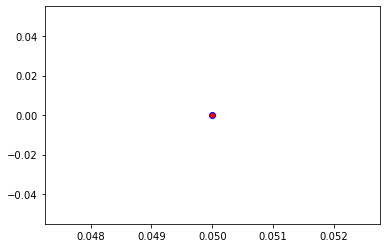

Counter: 351
000000405249 470 = candle
000000405279 975 = lakeside
000000405306 281 = tabby
000000405432 499 = cleaver
000000405691 966 = red wine
000000405970 598 = home theater
000000405972 385 = Indian elephant
000000406129 752 = racket
000000406417 608 = jean
000000406570 66 = corn
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


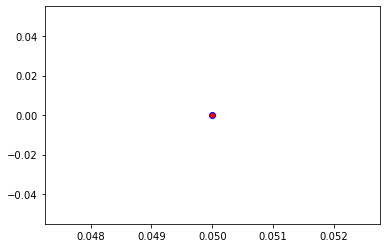

Counter: 352
000000406611 537 = dogsled
000000406997 5 = ram
000000407002 248 = ski
000000407083 785 = seat belt
000000407298 61 = boa constrictor
000000407403 899 = water jug
000000407518 85 = quail
000000407524 937 = broccoli
000000407574 954 = banana
000000407614 651 = microwave
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


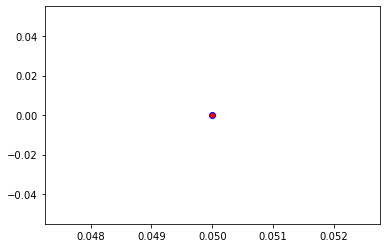

Counter: 353
000000407646 752 = racket
000000407650 140 = alp
000000407825 859 = toaster
000000407868 701 = parachute
000000407943 461 = breastplate
000000407960 285 = Egyptian cat
000000408112 403 = aircraft carrier
000000408120 671 = mountain bike
000000408696 424 = barbershop
000000408774 981 = ballplayer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


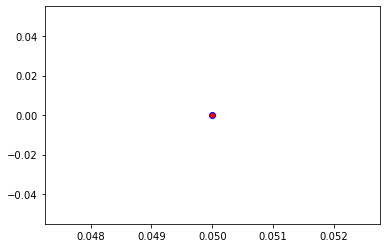

Counter: 354
000000408830 670 = motor scooter
000000409198 981 = ballplayer
000000409211 752 = racket
000000409268 850 = teddy
000000409358 896 = washbasin
000000409424 954 = banana
000000409475 248 = ski
000000409542 409 = analog clock
000000409630 673 = mouse
000000409867 905 = window shade
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


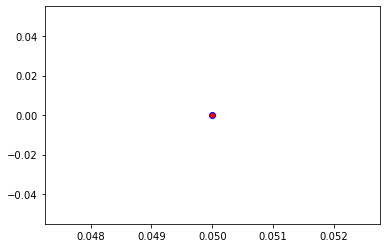

Counter: 355
000000410221 318 = wing
000000410428 5 = ram
000000410456 977 = sandbar
000000410487 827 = stove
000000410496 752 = racket
000000410510 248 = ski
000000410612 554 = fireboat
000000410650 752 = racket
000000410712 920 = traffic light
000000410735 926 = hot pot
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


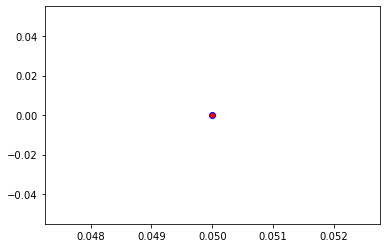

Counter: 356
000000410878 665 = moped
000000410880 267 = standard poodle
000000410934 938 = cauliflower
000000411530 248 = ski
000000411665 248 = Eskimo dog
000000411754 691 = oxygen mask
000000411774 740 = power drill
000000411817 886 = vending machine
000000411938 444 = bicycle-built-for-two
000000411953 546 = electric guitar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


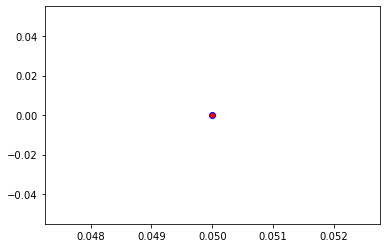

Counter: 357
000000412240 357 = mink
000000412286 752 = racket
000000412362 667 = mortarboard
000000412531 704 = parking meter
000000412887 355 = llama
000000412894 920 = traffic light
000000413247 526 = desk
000000413395 264 = Cardigan
000000413404 703 = park bench
000000413552 435 = tub
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


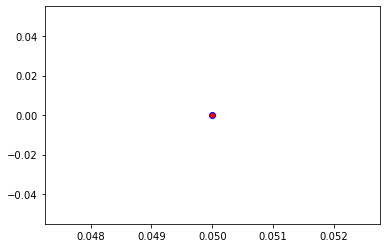

Counter: 358
000000413689 523 = crutch
000000414034 515 = cowboy hat
000000414133 637 = mailbox
000000414170 248 = ski
000000414261 297 = sloth bear
000000414340 663 = monastery
000000414385 484 = catamaran
000000414510 675 = moving van
000000414638 965 = burrito
000000414673 645 = maypole
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


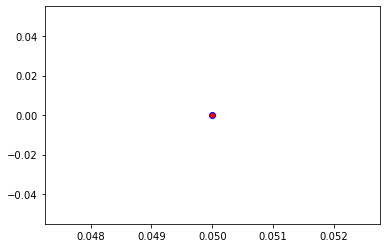

Counter: 359
000000414676 442 = bell cote
000000414795 385 = Indian elephant
000000415194 651 = microwave
000000415238 406 = altar
000000415536 829 = streetcar
000000415716 526 = desk
000000415727 593 = harp
000000415741 894 = wardrobe
000000415748 385 = Indian elephant
000000415882 831 = studio couch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


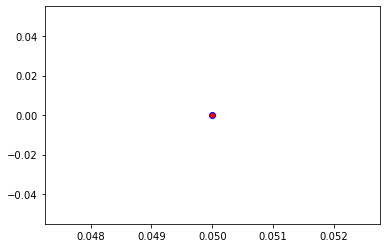

Counter: 360
000000415990 690 = oxcart
000000416104 450 = bobsled
000000416170 904 = window screen
000000416256 965 = burrito
000000416269 547 = electric locomotive
000000416330 284 = Siamese cat
000000416343 747 = punching bag
000000416451 420 = banjo
000000416534 765 = rocking chair
000000416745 648 = medicine chest
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


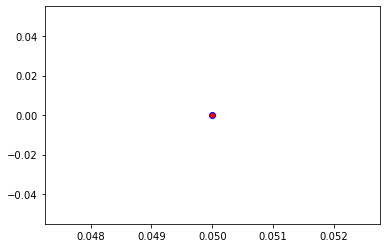

Counter: 361
000000416758 37 = ox
000000416837 350 = ibex
000000416885 572 = goblet
000000416991 829 = streetcar
000000417043 489 = chainlink fence
000000417085 354 = Arabian camel
000000417249 424 = barbershop
000000417285 965 = burrito
000000417465 295 = American black bear
000000417608 964 = potpie
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


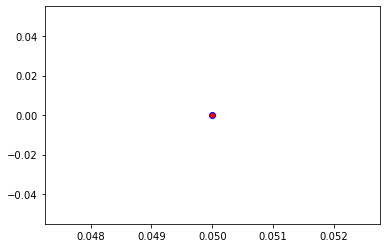

Counter: 362
000000417632 585 = hair spray
000000417779 412 = ashcan
000000417876 355 = llama
000000417911 562 = fountain
000000418062 490 = chain mail
000000418281 37 = ox
000000418696 497 = church
000000418959 49 = African crocodile
000000418961 892 = wall clock
000000419096 565 = freight car
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


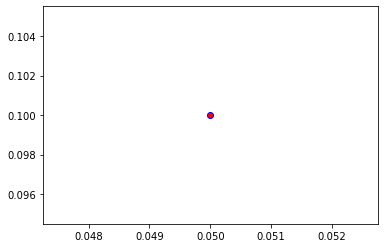

Counter: 363
000000419098 506 = coil
000000419201 958 = hay
000000419312 461 = plate
000000419379 931 = bagel
000000419408 491 = chain saw
000000419601 905 = window shade
000000419653 495 = china cabinet
000000419882 565 = freight car
000000419974 415 = bakery
000000420069 730 = plow
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


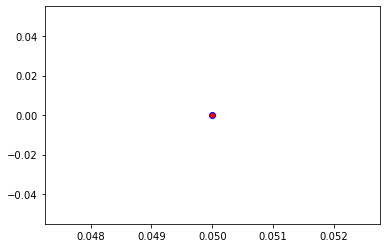

Counter: 364
000000420230 386 = African elephant
000000420281 934 = hotdog
000000420472 62 = rock python
000000420840 929 = ice lolly
000000420916 830 = stretcher
000000421060 404 = liner
000000421455 475 = car mirror
000000421757 536 = dock
000000421834 12 = house finch
000000421923 406 = altar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


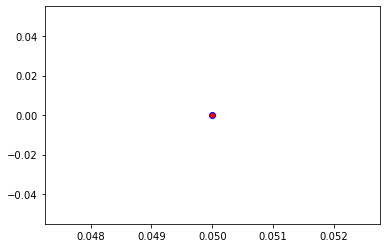

Counter: 365
000000422670 452 = bonnet
000000422706 625 = lifeboat
000000422836 634 = lumbermill
000000422886 965 = burrito
000000422998 909 = wok
000000423104 805 = soccer ball
000000423123 520 = crib
000000423229 820 = steam locomotive
000000423506 457 = bow tie
000000423519 829 = streetcar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


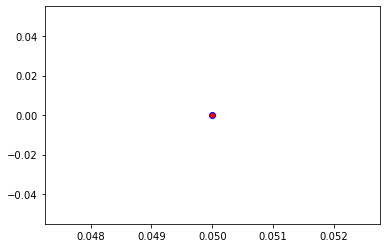

Counter: 366
000000423617 874 = trolleybus
000000423798 920 = traffic light
000000423944 879 = umbrella
000000423971 861 = toilet seat
000000424135 892 = wall clock
000000424162 225 = malinois
000000424349 766 = rotisserie
000000424521 146 = albatross
000000424545 478 = carton
000000424551 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


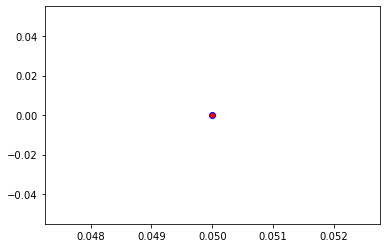

Counter: 367
000000424642 491 = chain saw
000000424721 909 = wok
000000424776 895 = warplane
000000424975 498 = cinema
000000425221 905 = window shade
000000425226 882 = vacuum
000000425227 701 = parachute
000000425361 907 = wine bottle
000000425390 284 = Siamese cat
000000425702 135 = limpkin
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


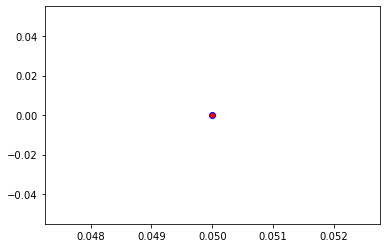

Counter: 368
000000425906 248 = ski
000000425925 668 = mosque
000000426166 880 = unicycle
000000426203 562 = fountain
000000426241 527 = desktop computer
000000426253 651 = microwave
000000426268 820 = steam locomotive
000000426297 340 = zebra
000000426329 999 = toilet tissue
000000426372 569 = garbage truck
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


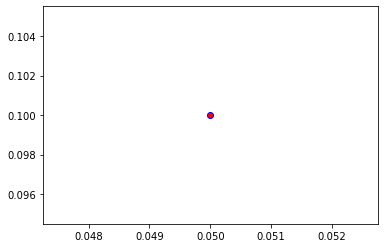

Counter: 369
000000426376 248 = ski
000000426795 118 = Dungeness crab
000000426836 975 = lakeside
000000427034 236 = Doberman
000000427055 498 = cinema
000000427077 981 = ballplayer
000000427160 981 = ballplayer
000000427256 981 = ballplayer
000000427338 663 = monastery
000000427500 324 = cab
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


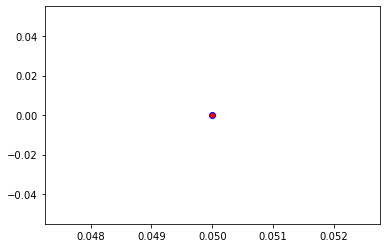

Counter: 370
000000427649 975 = lakeside
000000427655 603 = horse cart
000000427997 358 = pole
000000428111 93 = hornbill
000000428218 621 = lawn mower
000000428280 706 = patio
000000428454 701 = parachute
000000428562 5 = ram
000000428867 850 = teddy
000000429011 561 = forklift
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


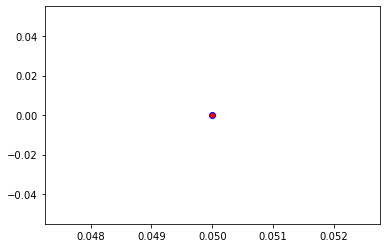

Counter: 371
000000429109 654 = minibus
000000429281 954 = banana
000000429530 883 = vase
000000429598 651 = microwave
000000429623 963 = pizza
000000429690 981 = ballplayer
000000429718 820 = steam locomotive
000000429761 752 = racket
000000430048 539 = doormat
000000430056 933 = cheeseburger
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


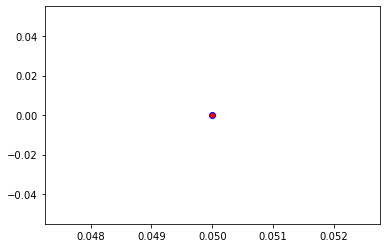

Counter: 372
000000430073 690 = oxcart
000000430286 770 = running shoe
000000430377 248 = ski
000000430871 704 = parking meter
000000430875 920 = traffic light
000000430961 981 = ballplayer
000000430973 963 = pizza
000000431140 896 = washbasin
000000431545 981 = ballplayer
000000431568 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


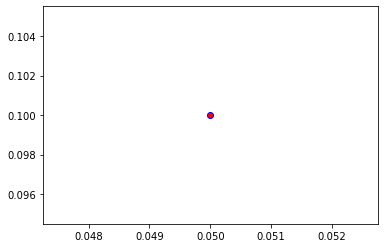

Counter: 373
000000431693 752 = racket
000000431727 334 = porcupine
000000431848 752 = racket
000000431876 433 = bathing cap
000000431896 547 = electric locomotive
000000432085 909 = wok
000000432468 636 = mailbag
000000432553 161 = basset
000000432898 805 = soccer ball
000000433103 830 = stretcher
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


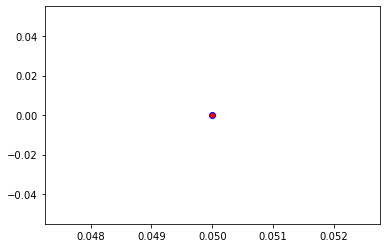

Counter: 374
000000433134 283 = Persian cat
000000433192 750 = quilt
000000433204 660 = mobile home
000000433243 340 = zebra
000000433374 343 = warthog
000000433515 557 = flagpole
000000433774 704 = parking meter
000000433915 851 = television
000000433980 593 = harmonica
000000434204 879 = umbrella
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


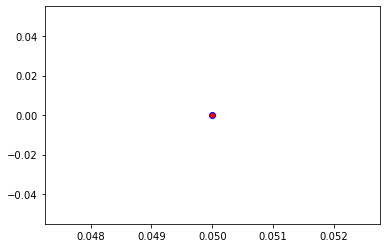

Counter: 375
000000434230 865 = toyshop
000000434247 340 = zebra
000000434297 461 = plate
000000434459 618 = ladle
000000434479 461 = plate
000000434548 981 = ballplayer
000000434996 265 = toy poodle
000000435003 527 = desktop computer
000000435081 932 = pretzel
000000435205 850 = teddy
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


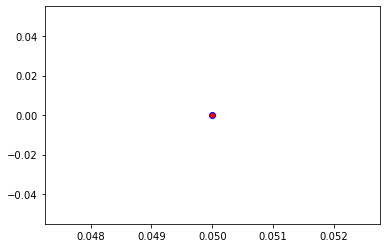

Counter: 376
000000435206 912 = worm fence
000000435208 620 = laptop
000000435299 184 = Irish terrier
000000435880 651 = microwave
000000436315 963 = pizza
000000436551 100 = black swan
000000436617 762 = restaurant
000000436738 874 = trolleybus
000000436883 829 = streetcar
000000437110 498 = palace
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


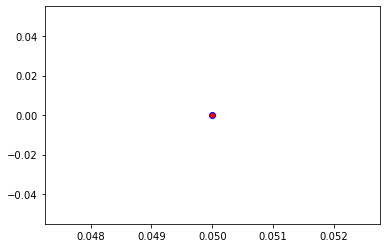

Counter: 377
000000437205 934 = hotdog
000000437239 544 = Dutch oven
000000437331 814 = speedboat
000000437351 859 = toaster
000000437392 861 = toilet seat
000000437514 28 = pot
000000437898 651 = microwave
000000438017 920 = traffic light
000000438226 965 = burrito
000000438269 131 = little blue heron
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


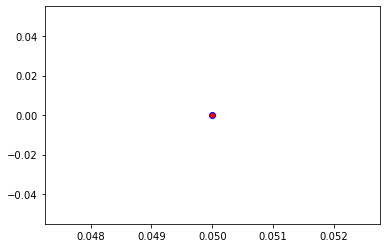

Counter: 378
000000438304 752 = racket
000000438774 762 = restaurant
000000438862 805 = soccer ball
000000438876 752 = racket
000000438907 248 = ski
000000438955 248 = ski
000000439180 354 = Arabian camel
000000439290 954 = banana
000000439426 932 = pretzel
000000439522 248 = ski
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


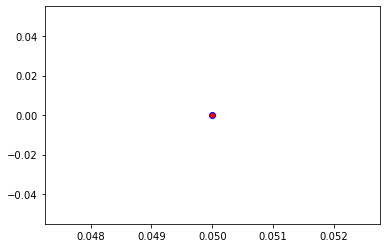

Counter: 379
000000439525 927 = trifle
000000439593 705 = passenger car
000000439623 708 = pedestal
000000439715 603 = horse cart
000000439773 697 = pajama
000000439854 358 = pole
000000439994 981 = ballplayer
000000440171 385 = Indian elephant
000000440184 752 = racket
000000440336 805 = soccer ball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


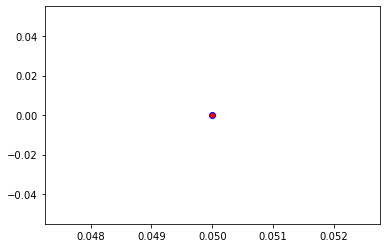

Counter: 380
000000440475 762 = restaurant
000000440507 492 = chest
000000440508 547 = electric locomotive
000000440617 547 = electric locomotive
000000441247 424 = barbershop
000000441286 209 = Chesapeake Bay retriever
000000441442 339 = sorrel
000000441468 637 = mailbox
000000441491 593 = harmonica
000000441543 417 = balloon
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


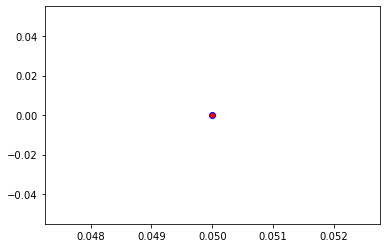

Counter: 381
000000441553 829 = streetcar
000000441586 671 = mountain bike
000000442009 435 = bathtub
000000442161 566 = French horn
000000442306 879 = umbrella
000000442323 851 = television
000000442456 656 = minivan
000000442463 880 = unicycle
000000442480 812 = space shuttle
000000442661 905 = window shade
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


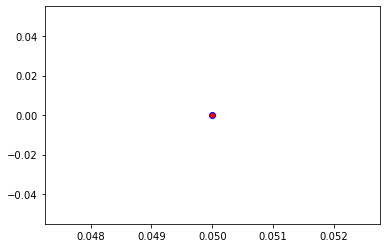

Counter: 382
000000442746 522 = croquet ball
000000442822 536 = dock
000000442836 981 = ballplayer
000000442993 498 = palace
000000443303 588 = hamper
000000443426 683 = oboe
000000443498 407 = ambulance
000000443844 600 = hook
000000443969 791 = shopping cart
000000444142 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


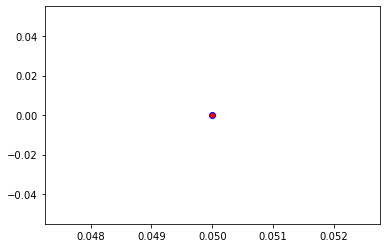

Counter: 383
000000444275 651 = microwave
000000444879 705 = passenger car
000000445248 385 = Indian elephant
000000445365 275 = hyena
000000445439 340 = zebra
000000445602 248 = ski
000000445658 534 = dishwasher
000000445675 288 = leopard
000000445722 476 = carousel
000000445792 845 = syringe
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


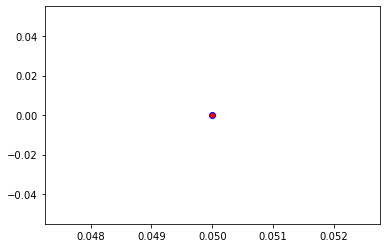

Counter: 384
000000445834 575 = golfcart
000000445846 534 = dishwasher
000000445999 629 = lipstick
000000446005 651 = microwave
000000446117 950 = orange
000000446206 829 = streetcar
000000446207 759 = reflex camera
000000446522 234 = Rottweiler
000000446574 794 = shower curtain
000000446651 518 = crash helmet
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


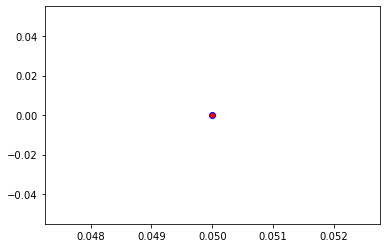

Counter: 385
000000446703 850 = teddy
000000447088 981 = ballplayer
000000447169 651 = microwave
000000447187 981 = ballplayer
000000447200 218 = Welsh springer spaniel
000000447313 340 = zebra
000000447314 140 = alp
000000447342 874 = trolleybus
000000447465 248 = ski
000000447522 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


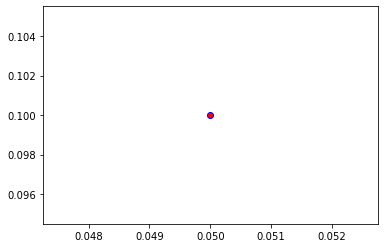

Counter: 386
000000447611 848 = tape player
000000447789 919 = street sign
000000447917 805 = soccer ball
000000448076 819 = stage
000000448256 672 = mountain tent
000000448263 981 = ballplayer
000000448365 880 = unicycle
000000448410 820 = steam locomotive
000000448448 290 = jaguar
000000448810 498 = cinema
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


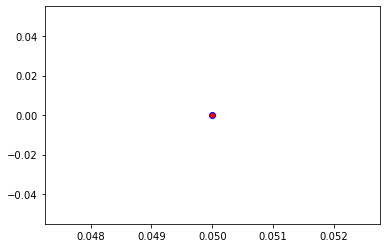

Counter: 387
000000449190 965 = burrito
000000449198 829 = streetcar
000000449312 762 = restaurant
000000449406 340 = zebra
000000449432 654 = minibus
000000449579 752 = racket
000000449603 694 = paddlewheel
000000449661 861 = toilet seat
000000449909 214 = Gordon setter
000000449996 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


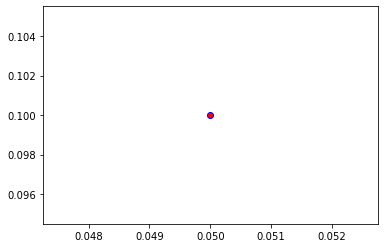

Counter: 388
000000450075 424 = barbershop
000000450100 415 = bakery
000000450202 118 = Dungeness crab
000000450303 526 = desk
000000450399 582 = grocery store
000000450439 701 = parachute
000000450488 598 = home theater
000000450559 752 = racket
000000450686 487 = cellular telephone
000000450758 351 = hartebeest
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


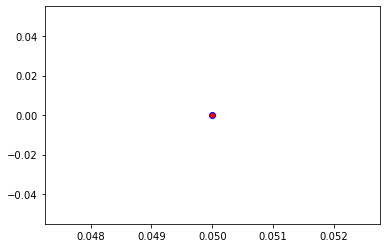

Counter: 389
000000451043 248 = ski
000000451084 248 = ski
000000451090 914 = yawl
000000451144 248 = ski
000000451150 932 = pretzel
000000451155 905 = window shade
000000451308 553 = file
000000451435 722 = ping-pong ball
000000451571 66 = corn
000000451693 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.6000000238418579
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


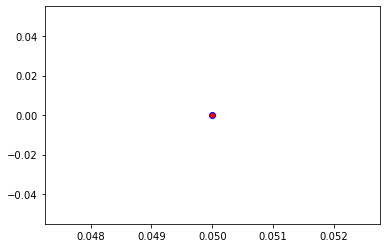

Counter: 390
000000451714 248 = ski
000000451879 429 = baseball
000000452084 813 = spatula
000000452122 404 = airliner
000000452321 874 = trolleybus
000000452515 752 = racket
000000452784 937 = broccoli
000000452793 534 = dishwasher
000000452891 266 = miniature poodle
000000453001 401 = accordion
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


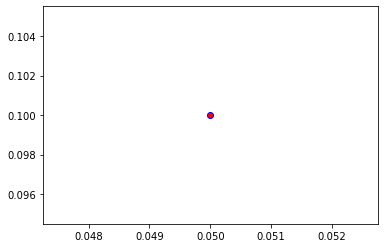

Counter: 391
000000453040 28 = pot
000000453166 652 = military uniform
000000453302 651 = microwave
000000453341 495 = china cabinet
000000453584 694 = paddlewheel
000000453634 896 = washbasin
000000453708 954 = banana
000000453722 564 = four-poster
000000453841 920 = traffic light
000000453860 636 = mailbag
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


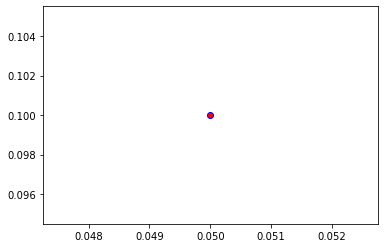

Counter: 392
000000453981 295 = American black bear
000000454067 851 = television
000000454404 899 = water jug
000000454661 324 = cab
000000454750 340 = zebra
000000454798 339 = sorrel
000000454978 671 = mountain bike
000000455085 705 = passenger car
000000455157 634 = lumbermill
000000455219 37 = ox
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


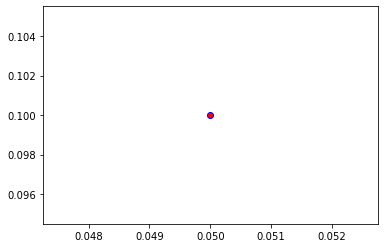

Counter: 393
000000455267 909 = wok
000000455301 529 = diaper
000000455352 442 = bell cote
000000455448 641 = maraca
000000455555 843 = swing
000000455597 424 = barbershop
000000455624 670 = motor scooter
000000455716 670 = motor scooter
000000455872 536 = dock
000000455937 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


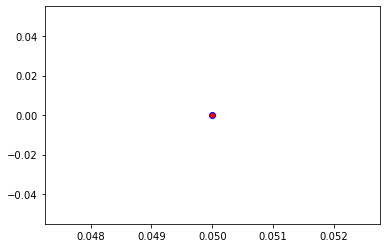

Counter: 394
000000455981 861 = toilet seat
000000456015 354 = Arabian camel
000000456143 933 = cheeseburger
000000456292 896 = washbasin
000000456303 802 = snowmobile
000000456394 665 = moped
000000456496 703 = park bench
000000456559 837 = sunglasses
000000456662 416 = balance beam
000000456865 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


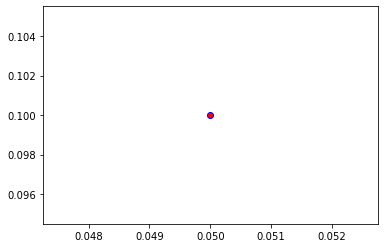

Counter: 395
000000457078 424 = barbershop
000000457262 954 = banana
000000457559 805 = soccer ball
000000457848 665 = moped
000000457884 981 = ballplayer
000000458045 981 = ballplayer
000000458054 391 = coho
000000458109 565 = freight car
000000458223 460 = breakwater
000000458255 750 = quilt
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


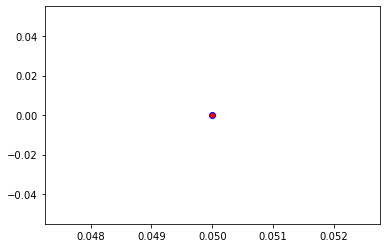

Counter: 396
000000458325 569 = garbage truck
000000458410 651 = microwave
000000458663 534 = dishwasher
000000458702 704 = parking meter
000000458755 5 = ram
000000458768 896 = washbasin
000000458790 851 = television
000000458992 963 = pizza
000000459153 703 = park bench
000000459195 491 = chain saw
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


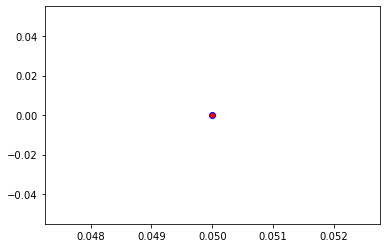

Counter: 397
000000459272 611 = jigsaw puzzle
000000459396 37 = ox
000000459437 354 = Arabian camel
000000459467 318 = wing
000000459500 409 = analog clock
000000459634 977 = sandbar
000000459662 641 = maraca
000000459757 9 = ostrich
000000459809 701 = parachute
000000459887 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


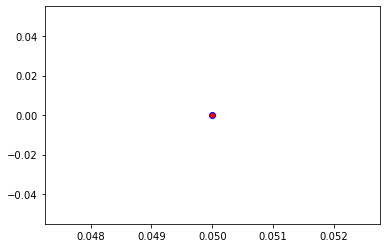

Counter: 398
000000459954 760 = refrigerator
000000460147 920 = traffic light
000000460160 99 = goose
000000460229 919 = street sign
000000460333 831 = studio couch
000000460347 675 = moving van
000000460379 9 = ostrich
000000460494 937 = broccoli
000000460682 693 = paddle
000000460683 639 = suit
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


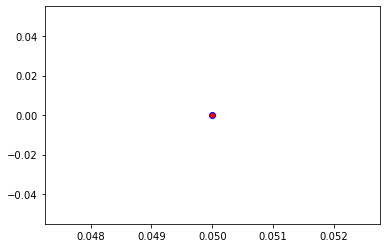

Counter: 399
000000460841 896 = washbasin
000000460927 294 = brown bear
000000460929 934 = hotdog
000000460967 874 = trolleybus
000000461009 852 = tennis ball
000000461036 379 = howler monkey
000000461275 919 = street sign
000000461405 5 = ram
000000461573 703 = park bench
000000461751 428 = barrow
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


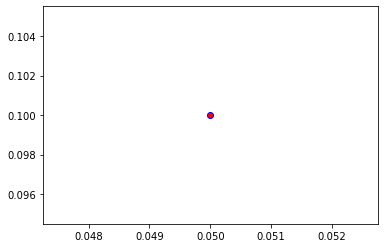

Counter: 400
000000462031 981 = ballplayer
000000462371 822 = steel drum
000000462576 935 = mashed potato
000000462614 896 = washbasin
000000462629 760 = refrigerator
000000462643 681 = notebook
000000462728 814 = speedboat
000000462756 856 = thresher
000000462904 37 = ox
000000463037 895 = warplane
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


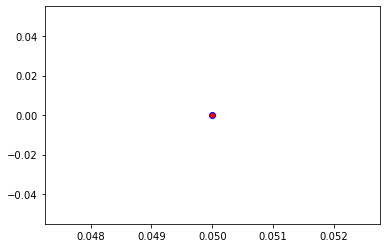

Counter: 401
000000463174 752 = racket
000000463199 515 = cowboy hat
000000463283 969 = eggnog
000000463522 603 = horse cart
000000463527 868 = tray
000000463542 248 = ski
000000463618 791 = shopping cart
000000463647 637 = mailbox
000000463690 675 = moving van
000000463730 569 = garbage truck
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


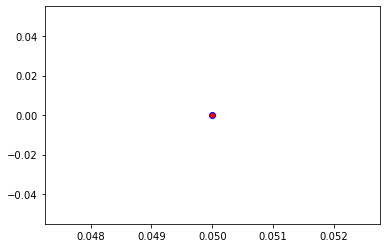

Counter: 402
000000463802 529 = diaper
000000463842 831 = studio couch
000000463849 536 = dock
000000463918 642 = marimba
000000464089 981 = ballplayer
000000464144 248 = ski
000000464251 12 = house finch
000000464358 532 = dining table
000000464476 799 = sliding door
000000464522 164 = bluetick
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


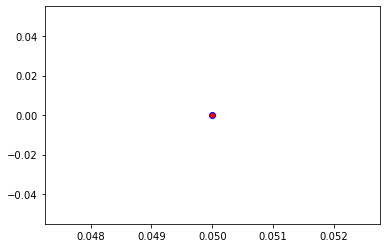

Counter: 403
000000464689 624 = library
000000464786 934 = hotdog
000000464824 544 = Dutch oven
000000464872 340 = zebra
000000465129 456 = bow
000000465179 422 = barbell
000000465180 385 = Indian elephant
000000465430 962 = meat loaf
000000465549 589 = hand blower
000000465585 937 = broccoli
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


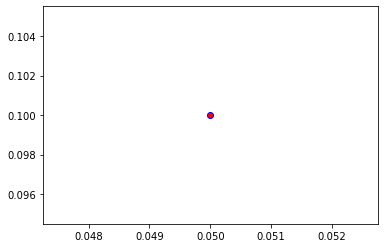

Counter: 404
000000465675 471 = cannon
000000465718 527 = desktop computer
000000465806 953 = pineapple
000000465822 589 = hand blower
000000465836 248 = ski
000000466085 435 = bathtub
000000466125 879 = umbrella
000000466156 285 = Egyptian cat
000000466256 461 = plate
000000466339 799 = sliding door
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


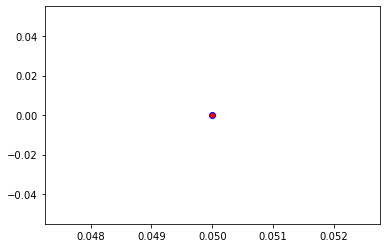

Counter: 405
000000466416 498 = palace
000000466567 607 = jack-o'-lantern
000000466602 792 = shovel
000000466835 954 = banana
000000466986 651 = microwave
000000467176 851 = television
000000467315 883 = vase
000000467511 670 = motor scooter
000000467776 355 = llama
000000467848 867 = trailer truck
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


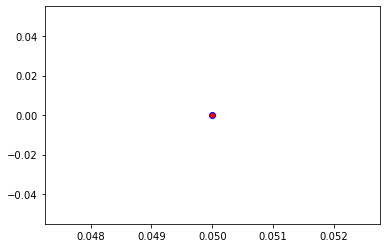

Counter: 406
000000468124 408 = amphibian
000000468233 710 = pencil sharpener
000000468245 905 = window shade
000000468332 575 = golfcart
000000468501 515 = cowboy hat
000000468505 532 = dining table
000000468577 209 = Chesapeake Bay retriever
000000468632 890 = volleyball
000000468925 461 = plate
000000468954 608 = jean
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


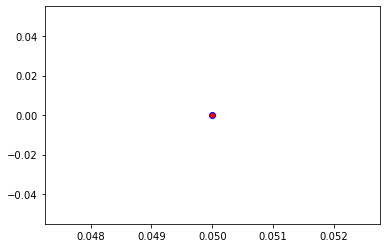

Counter: 407
000000468965 663 = monastery
000000469067 845 = syringe
000000469174 557 = flagpole
000000469192 656 = minivan
000000469246 705 = passenger car
000000469652 287 = lynx
000000469828 248 = ski
000000470121 461 = plate
000000470173 863 = totem pole
000000470773 415 = bakery
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


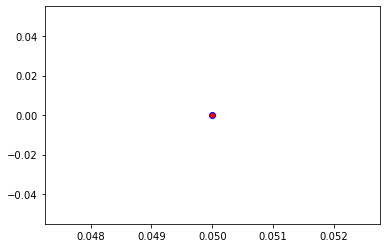

Counter: 408
000000470779 248 = ski
000000470924 982 = groom
000000470952 248 = ski
000000471023 475 = car mirror
000000471087 869 = trench coat
000000471450 294 = brown bear
000000471567 663 = monastery
000000471756 693 = paddle
000000471789 557 = flagpole
000000471869 850 = teddy
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


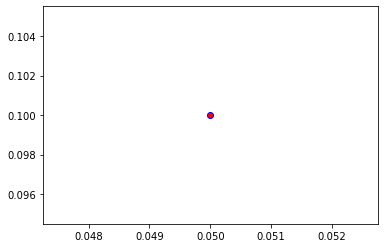

Counter: 409
000000471893 642 = marimba
000000471991 497 = church
000000472030 703 = park bench
000000472046 762 = restaurant
000000472298 472 = canoe
000000472375 235 = German shepherd
000000472623 671 = mountain bike
000000472678 527 = desktop computer
000000473015 58 = water snake
000000473118 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


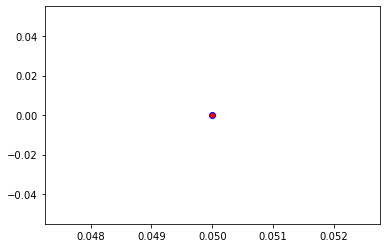

Counter: 410
000000473121 248 = ski
000000473219 982 = groom
000000473237 965 = burrito
000000473406 443 = bib
000000473821 598 = home theater
000000473869 909 = wok
000000473974 340 = zebra
000000474021 420 = banjo
000000474028 768 = rugby ball
000000474039 850 = teddy
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


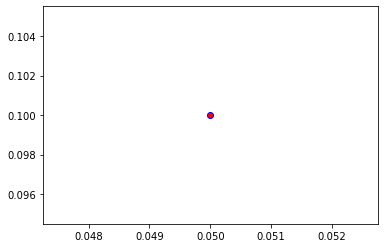

Counter: 411
000000474078 981 = ballplayer
000000474095 896 = washbasin
000000474164 212 = English setter
000000474167 934 = hotdog
000000474170 386 = African elephant
000000474293 860 = tobacco shop
000000474344 456 = bow
000000474452 919 = street sign
000000474786 896 = washbasin
000000474854 929 = ice lolly
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


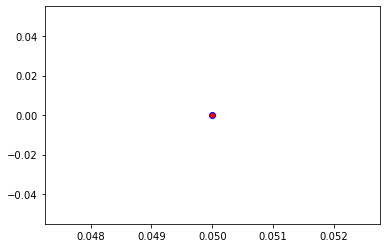

Counter: 412
000000474881 349 = bighorn
000000475064 932 = pretzel
000000475150 352 = impala
000000475191 752 = racket
000000475223 133 = bittern
000000475365 867 = trailer truck
000000475387 547 = electric locomotive
000000475484 704 = parking meter
000000475572 868 = tray
000000475678 461 = breastplate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


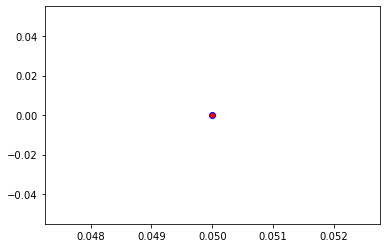

Counter: 413
000000475732 282 = tiger cat
000000475779 386 = African elephant
000000475904 879 = umbrella
000000476119 491 = chain saw
000000476215 603 = horse cart
000000476258 248 = ski
000000476415 906 = Windsor tie
000000476491 713 = pier
000000476514 982 = groom
000000476704 757 = recreational vehicle
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


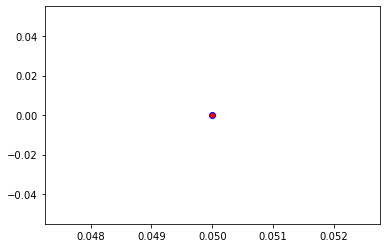

Counter: 414
000000476770 981 = ballplayer
000000476787 963 = pizza
000000476810 761 = remote control
000000477118 919 = street sign
000000477227 554 = fireboat
000000477288 456 = bow
000000477441 318 = wing
000000477623 547 = electric locomotive
000000477689 982 = groom
000000477805 639 = suit
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


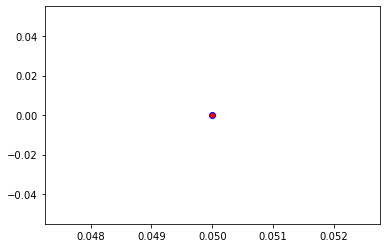

Counter: 415
000000477955 701 = parachute
000000478136 415 = bakery
000000478286 779 = school bus
000000478393 162 = beagle
000000478420 775 = sarong
000000478474 867 = trailer truck
000000478721 843 = swing
000000478862 895 = warplane
000000479030 547 = electric locomotive
000000479099 73 = barn
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


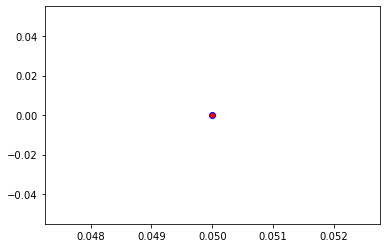

Counter: 416
000000479126 620 = laptop
000000479155 248 = Eskimo dog
000000479248 851 = television
000000479448 954 = banana
000000479596 950 = orange
000000479732 933 = cheeseburger
000000479912 404 = airliner
000000479953 752 = racket
000000480021 665 = moped
000000480122 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


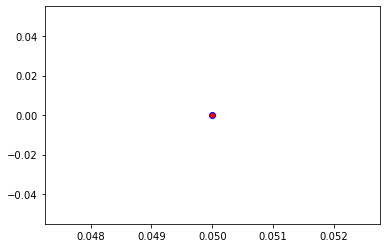

Counter: 417
000000480212 761 = remote control
000000480275 66 = corn
000000480842 383 = Madagascar cat
000000480936 655 = miniskirt
000000480944 920 = traffic light
000000480985 524 = cuirass
000000481159 703 = park bench
000000481386 860 = tobacco shop
000000481390 430 = basketball
000000481404 497 = church
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


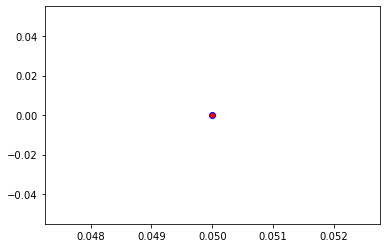

Counter: 418
000000481413 978 = seashore
000000481480 557 = flagpole
000000481567 665 = moped
000000481573 807 = solar dish
000000481582 385 = Indian elephant
000000482100 861 = toilet seat
000000482275 982 = groom
000000482319 680 = nipple
000000482436 424 = barbershop
000000482477 21 = kite
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


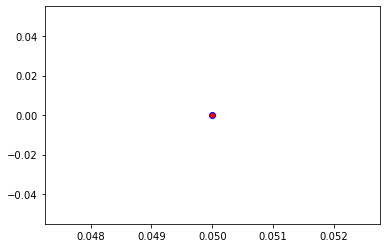

Counter: 419
000000482487 778 = scale
000000482585 705 = passenger car
000000482719 954 = banana
000000482735 148 = killer whale
000000482800 522 = croquet ball
000000482917 264 = Cardigan
000000482970 620 = laptop
000000482978 705 = passenger car
000000483050 750 = quilt
000000483531 831 = studio couch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


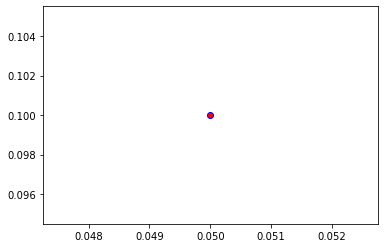

Counter: 420
000000483667 515 = cowboy hat
000000483999 762 = restaurant
000000484029 919 = street sign
000000484296 340 = zebra
000000484351 624 = library
000000484404 705 = passenger car
000000484415 861 = toilet seat
000000484760 442 = bell cote
000000484893 105 = koala
000000484978 532 = dining table
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


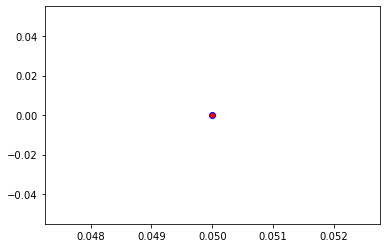

Counter: 421
000000485027 752 = racket
000000485071 814 = speedboat
000000485130 478 = carton
000000485237 404 = airliner
000000485424 651 = microwave
000000485480 981 = ballplayer
000000485802 79 = centipede
000000485844 424 = barbershop
000000485895 649 = megalith
000000485972 813 = spatula
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


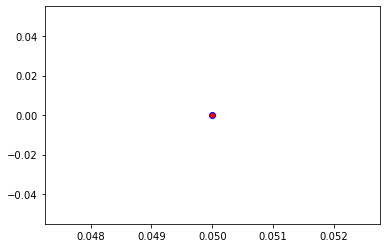

Counter: 422
000000486040 4 = hammer
000000486046 340 = zebra
000000486104 981 = ballplayer
000000486112 385 = Indian elephant
000000486438 932 = pretzel
000000486479 161 = basset
000000486573 870 = tricycle
000000487583 412 = ashcan
000000488075 532 = dining table
000000488166 696 = paintbrush
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


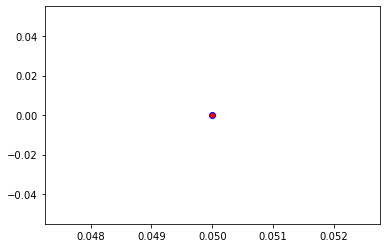

Counter: 423
000000488251 339 = sorrel
000000488270 977 = sandbar
000000488385 665 = moped
000000488592 582 = grocery store
000000488664 820 = steam locomotive
000000488673 505 = coffeepot
000000488710 610 = jersey
000000488736 409 = analog clock
000000489014 914 = yawl
000000489046 326 = lycaenid
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


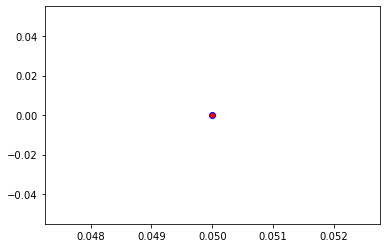

Counter: 424
000000489091 648 = medicine chest
000000489305 942 = butternut squash
000000489339 456 = bow
000000489611 845 = syringe
000000489764 424 = barbershop
000000489842 903 = wig
000000489924 774 = sandal
000000490125 144 = pelican
000000490171 175 = otter
000000490413 489 = chainlink fence
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


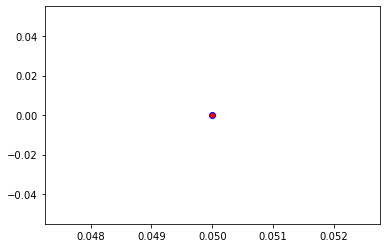

Counter: 425
000000490470 484 = catamaran
000000490515 248 = ski
000000490936 601 = hoopskirt
000000491008 752 = racket
000000491071 598 = home theater
000000491090 665 = moped
000000491130 248 = ski
000000491213 665 = moped
000000491216 526 = desk
000000491366 851 = television
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


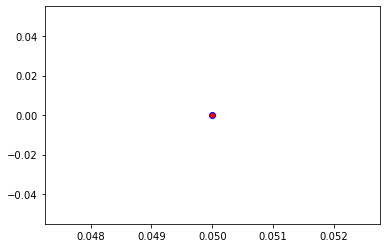

Counter: 426
000000491464 981 = ballplayer
000000491470 888 = viaduct
000000491497 564 = four-poster
000000491613 340 = zebra
000000491683 958 = hay
000000491725 536 = dock
000000491757 284 = Siamese cat
000000491867 887 = vestment
000000492077 665 = moped
000000492110 620 = laptop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


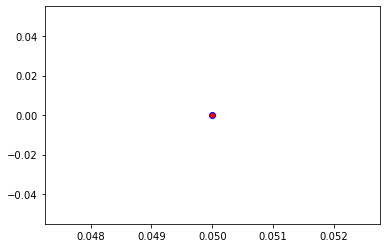

Counter: 427
000000492282 603 = horse cart
000000492284 37 = ox
000000492362 582 = grocery store
000000492758 706 = patio
000000492878 896 = washbasin
000000492905 526 = desk
000000492937 872 = tripod
000000492968 248 = ski
000000492992 346 = water buffalo
000000493019 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


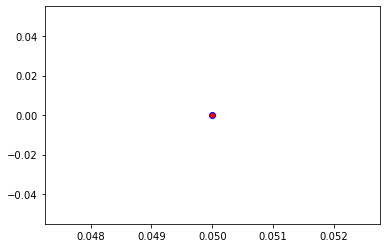

Counter: 428
000000493284 386 = African elephant
000000493286 511 = convertible
000000493334 520 = crib
000000493442 248 = ski
000000493566 565 = freight car
000000493613 770 = running shoe
000000493772 879 = umbrella
000000493799 461 = plate
000000493864 879 = umbrella
000000493905 805 = soccer ball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


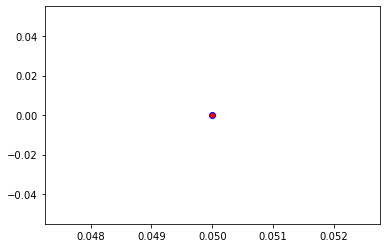

Counter: 429
000000494188 23 = vulture
000000494427 681 = notebook
000000494634 664 = monitor
000000494759 701 = parachute
000000494863 547 = electric locomotive
000000494869 788 = shoe shop
000000494913 598 = home theater
000000495054 404 = airliner
000000495146 557 = flagpole
000000495448 415 = bakery
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


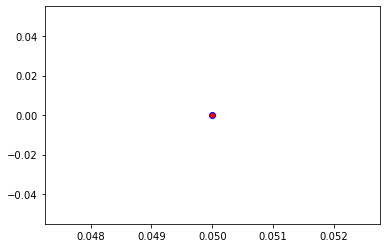

Counter: 430
000000495732 608 = jean
000000496409 314 = cockroach
000000496571 532 = dining table
000000496597 976 = promontory
000000496722 637 = mailbox
000000496854 879 = umbrella
000000496954 461 = plate
000000497344 681 = notebook
000000497568 404 = airliner
000000497599 739 = potter's wheel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


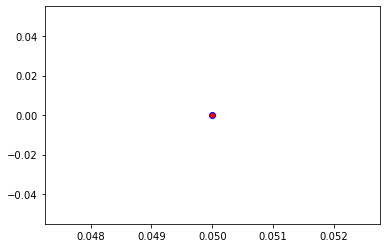

Counter: 431
000000497628 564 = four-poster
000000497867 654 = minibus
000000498032 585 = hair spray
000000498286 182 = Border terrier
000000498463 760 = refrigerator
000000498709 670 = motor scooter
000000498747 523 = crutch
000000498807 693 = paddle
000000498857 134 = crane
000000498919 950 = orange
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


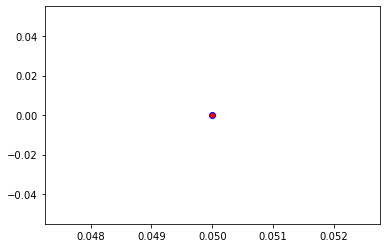

Counter: 432
000000499031 655 = miniskirt
000000499109 329 = cucumber
000000499181 920 = traffic light
000000499266 605 = iPod
000000499313 963 = pizza
000000499622 518 = crash helmet
000000499768 637 = mailbox
000000499775 874 = trolleybus
000000500049 404 = airliner
000000500211 716 = picket fence
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


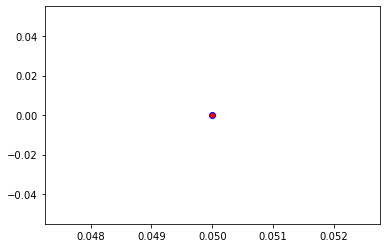

Counter: 433
000000500257 670 = motor scooter
000000500270 532 = dining table
000000500423 705 = passenger car
000000500464 896 = washbasin
000000500477 961 = dough
000000500478 981 = ballplayer
000000500565 434 = bath towel
000000500613 555 = fire engine
000000500663 975 = lakeside
000000500716 487 = cellular telephone
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


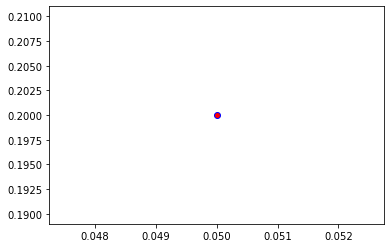

Counter: 434
000000500826 919 = street sign
000000501005 981 = ballplayer
000000501023 919 = street sign
000000501243 340 = zebra
000000501368 589 = hand blower
000000501523 896 = washbasin
000000502136 743 = prison
000000502168 833 = submarine
000000502229 611 = jigsaw puzzle
000000502336 424 = barbershop
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


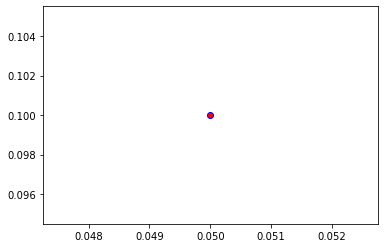

Counter: 435
000000502347 405 = airship
000000502599 657 = missile
000000502732 877 = turnstile
000000502737 960 = chocolate sauce
000000502910 637 = mailbox
000000503755 752 = racket
000000503823 864 = wreck
000000503841 920 = traffic light
000000503855 672 = mountain tent
000000504000 807 = solar dish
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


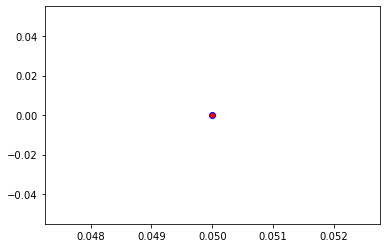

Counter: 436
000000504074 401 = accordion
000000504389 792 = shovel
000000504415 890 = volleyball
000000504439 340 = zebra
000000504580 83 = prairie chicken
000000504589 890 = volleyball
000000504635 340 = zebra
000000504711 960 = chocolate sauce
000000505169 794 = shower curtain
000000505451 801 = snorkel
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


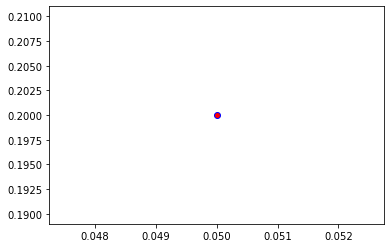

Counter: 437
000000505565 127 = white stork
000000505573 245 = French bulldog
000000505638 820 = steam locomotive
000000505789 663 = monastery
000000505942 704 = parking meter
000000506004 540 = drilling platform
000000506178 851 = television
000000506279 441 = beer glass
000000506310 707 = pay-phone
000000506454 703 = park bench
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


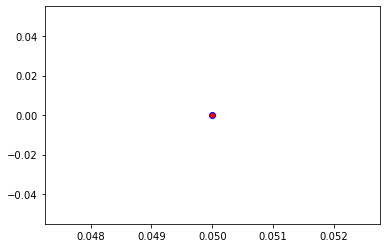

Counter: 438
000000506656 603 = horse cart
000000506707 981 = ballplayer
000000506933 487 = cellular telephone
000000507015 981 = ballplayer
000000507037 880 = unicycle
000000507042 293 = cheetah
000000507081 799 = sliding door
000000507223 981 = ballplayer
000000507235 461 = plate
000000507473 487 = cellular telephone
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


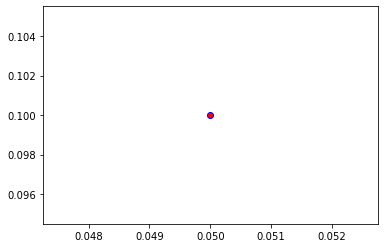

Counter: 439
000000507575 526 = desk
000000507667 407 = ambulance
000000507797 829 = streetcar
000000507893 648 = medicine chest
000000507975 603 = horse cart
000000508101 693 = paddle
000000508312 651 = microwave
000000508370 444 = bicycle-built-for-two
000000508482 877 = turnstile
000000508586 340 = zebra
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


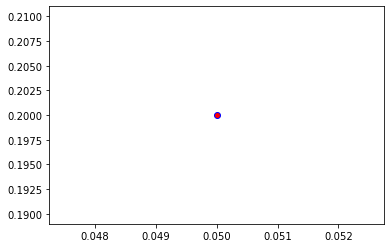

Counter: 440
000000508602 132 = American egret
000000508639 603 = horse cart
000000508730 793 = shower cap
000000508917 705 = passenger car
000000509008 779 = school bus
000000509014 248 = ski
000000509131 986 = yellow lady's slipper
000000509258 498 = cinema
000000509260 453 = bookcase
000000509403 173 = Ibizan hound
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


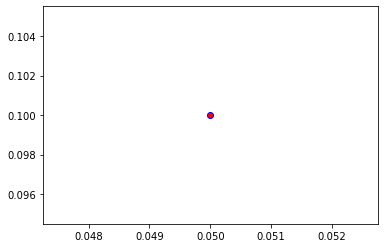

Counter: 441
000000509451 541 = drum
000000509656 340 = zebra
000000509699 424 = barbershop
000000509719 82 = ruffed grouse
000000509735 340 = zebra
000000509824 831 = studio couch
000000510095 984 = rapeseed
000000510329 471 = cannon
000000511076 634 = lumbermill
000000511321 404 = liner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


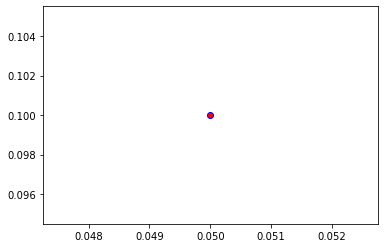

Counter: 442
000000511384 417 = balloon
000000511398 161 = basset
000000511453 934 = hotdog
000000511599 977 = sandbar
000000511647 99 = goose
000000511760 701 = parachute
000000511999 705 = passenger car
000000512194 883 = vase
000000512248 409 = analog clock
000000512330 760 = refrigerator
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


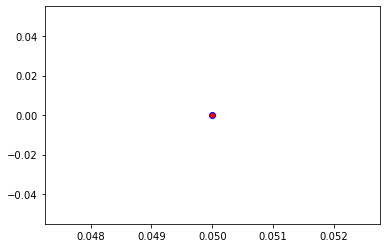

Counter: 443
000000512403 749 = quill
000000512476 786 = sewing machine
000000512564 829 = streetcar
000000512648 37 = ox
000000512657 608 = jean
000000512776 981 = ballplayer
000000512836 879 = umbrella
000000512929 910 = wooden spoon
000000512985 978 = seashore
000000513041 544 = Dutch oven
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


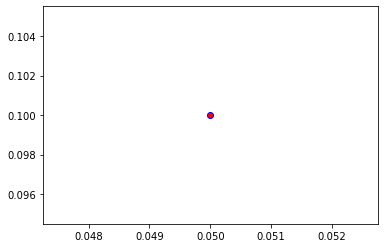

Counter: 444
000000513181 536 = dock
000000513283 461 = plate
000000513484 294 = brown bear
000000513524 178 = Weimaraner
000000513567 971 = bubble
000000513580 318 = wing
000000513688 526 = desk
000000514376 829 = streetcar
000000514508 654 = minibus
000000514540 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


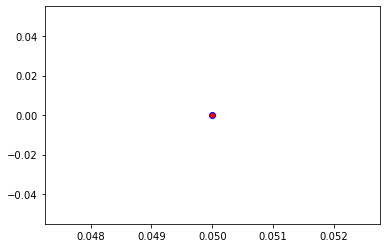

Counter: 445
000000514586 456 = bow
000000514797 538 = dome
000000514914 896 = washbasin
000000514979 385 = Indian elephant
000000515025 231 = collie
000000515077 598 = home theater
000000515266 864 = tow truck
000000515350 241 = EntleBucher
000000515445 978 = seashore
000000515577 140 = alp
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


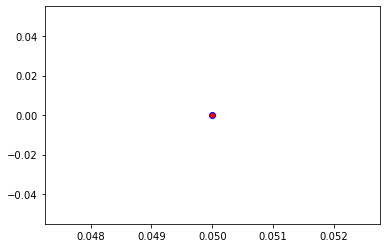

Counter: 446
000000515579 805 = soccer ball
000000515828 752 = racket
000000515982 981 = ballplayer
000000516038 981 = ballplayer
000000516143 654 = minibus
000000516173 978 = seashore
000000516316 340 = zebra
000000516318 693 = paddle
000000516601 140 = alp
000000516677 140 = alp
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


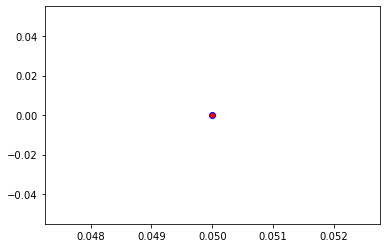

Counter: 447
000000516708 919 = street sign
000000516804 920 = traffic light
000000516871 748 = purse
000000516916 526 = desk
000000517056 762 = restaurant
000000517069 420 = banjo
000000517523 404 = airliner
000000517687 487 = cellular telephone
000000517832 179 = Staffordshire bullterrier
000000518213 347 = bison
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


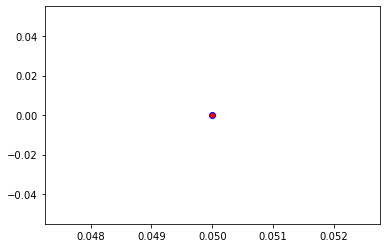

Counter: 448
000000518326 791 = shopping cart
000000518770 523 = crutch
000000519039 569 = garbage truck
000000519208 385 = Indian elephant
000000519338 565 = freight car
000000519491 442 = bell cote
000000519522 498 = palace
000000519569 896 = washbasin
000000519611 296 = ice bear
000000519688 361 = skunk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


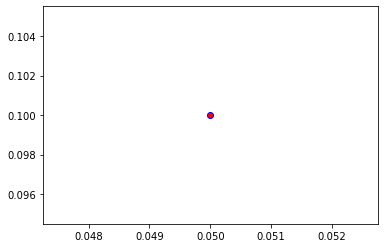

Counter: 449
000000519764 281 = tabby
000000520009 498 = palace
000000520077 481 = cassette
000000520264 534 = dishwasher
000000520301 227 = kelpie
000000520324 575 = golfcart
000000520531 453 = bookcase
000000520659 476 = carousel
000000520707 297 = slot
000000520832 829 = streetcar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


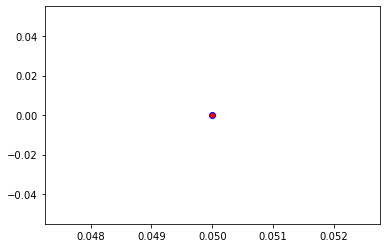

Counter: 450
000000520871 963 = pizza
000000520910 697 = pajama
000000521052 660 = mobile home
000000521141 919 = street sign
000000521231 296 = ice bear
000000521259 880 = unicycle
000000521282 883 = vase
000000521405 816 = spindle
000000521509 523 = crutch
000000521540 461 = plate
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


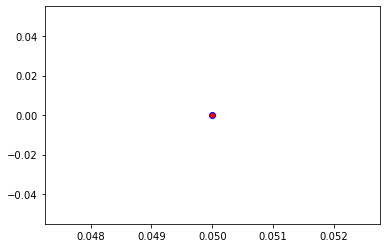

Counter: 451
000000521601 896 = washbasin
000000521717 752 = racket
000000521719 723 = pinwheel
000000521819 522 = croquet ball
000000521956 752 = racket
000000522007 651 = microwave
000000522156 461 = plate
000000522393 914 = yawl
000000522638 850 = teddy
000000522713 703 = park bench
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


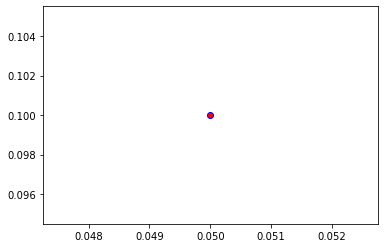

Counter: 452
000000522751 920 = traffic light
000000522889 752 = racket
000000522940 919 = street sign
000000523033 977 = sandbar
000000523100 909 = wok
000000523175 809 = soup bowl
000000523194 879 = umbrella
000000523229 861 = toilet seat
000000523241 920 = traffic light
000000523782 656 = minivan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


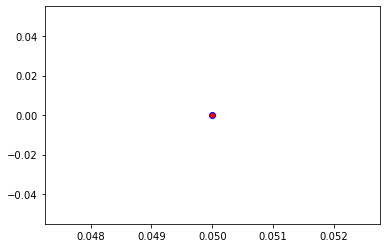

Counter: 453
000000523807 934 = hotdog
000000523811 912 = worm fence
000000523957 460 = breakwater
000000524108 670 = motor scooter
000000524280 285 = Egyptian cat
000000524456 882 = vacuum
000000524742 709 = pencil box
000000524850 404 = airliner
000000525083 424 = barbershop
000000525155 5 = ram
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


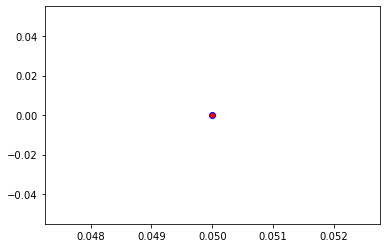

Counter: 454
000000525247 508 = computer keyboard
000000525286 635 = magnetic compass
000000525322 318 = wing
000000525600 355 = llama
000000526103 385 = Indian elephant
000000526197 415 = bakery
000000526256 663 = monastery
000000526392 656 = minivan
000000526706 347 = bison
000000526728 412 = ashcan
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


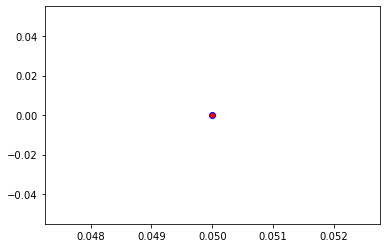

Counter: 455
000000526751 484 = catamaran
000000527029 415 = bakery
000000527215 890 = volleyball
000000527220 571 = gas pump
000000527427 778 = scale
000000527528 701 = parachute
000000527616 421 = bannister
000000527695 937 = broccoli
000000527750 882 = vacuum
000000527784 118 = Dungeness crab
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


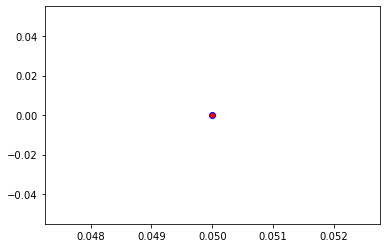

Counter: 456
000000527960 703 = park bench
000000528314 248 = ski
000000528399 461 = plate
000000528524 346 = water buffalo
000000528578 498 = palace
000000528705 850 = teddy
000000528862 176 = gazelle
000000528977 713 = pier
000000528980 879 = umbrella
000000529105 197 = giant schnauzer
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.5
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


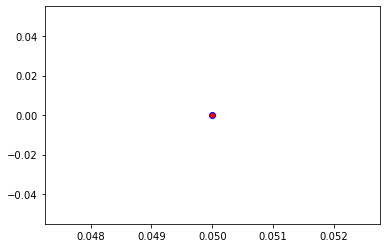

Counter: 457
000000529122 582 = grocery store
000000529148 681 = notebook
000000529528 961 = dough
000000529568 526 = desk
000000529762 762 = restaurant
000000529939 523 = crutch
000000529966 950 = orange
000000530052 932 = pretzel
000000530061 910 = wooden spoon
000000530099 263 = Pembroke
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


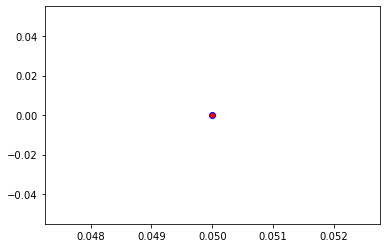

Counter: 458
000000530146 461 = plate
000000530162 568 = fur coat
000000530457 28 = pot
000000530466 829 = streetcar
000000530470 975 = lakeside
000000530624 434 = bath towel
000000530820 981 = ballplayer
000000530836 424 = barbershop
000000530854 750 = quilt
000000530975 934 = hotdog
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


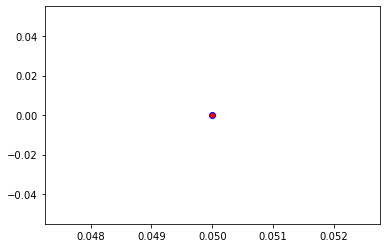

Counter: 459
000000531036 874 = trolleybus
000000531134 920 = traffic light
000000531135 981 = ballplayer
000000531495 536 = dock
000000531707 703 = park bench
000000531771 848 = tape player
000000532058 116 = cradle
000000532071 295 = American black bear
000000532129 963 = pizza
000000532481 701 = parachute
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


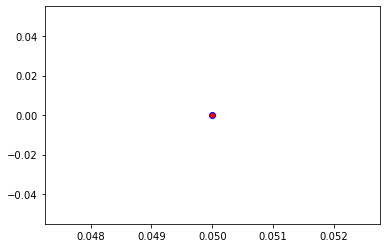

Counter: 460
000000532493 2 = great white shark
000000532530 454 = bookshop
000000532575 225 = malinois
000000532690 608 = jean
000000532761 905 = window shade
000000532855 543 = dumbbell
000000532901 564 = four-poster
000000533145 745 = projector
000000533206 461 = plate
000000533493 747 = punching bag
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


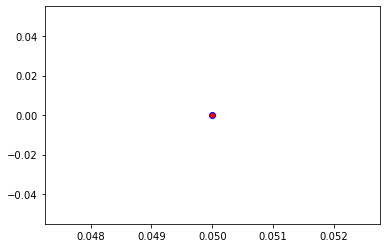

Counter: 461
000000533536 851 = television
000000533816 791 = shopping cart
000000533855 616 = knot
000000533958 461 = plate
000000534041 680 = nipple
000000534270 447 = binoculars
000000534394 385 = Indian elephant
000000534601 850 = teddy
000000534605 802 = snowmobile
000000534639 829 = streetcar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


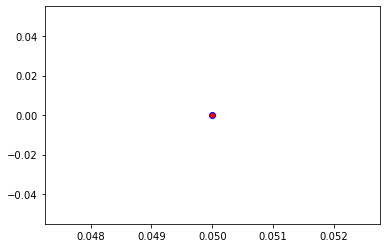

Counter: 462
000000534664 597 = holster
000000534673 705 = passenger car
000000534827 665 = moped
000000535094 178 = Weimaraner
000000535156 385 = Indian elephant
000000535253 865 = toyshop
000000535306 491 = chain saw
000000535523 550 = espresso maker
000000535578 5 = ram
000000535608 977 = sandbar
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


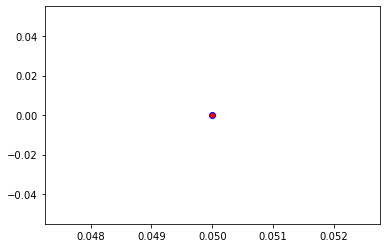

Counter: 463
000000535858 147 = grey whale
000000536038 658 = mitten
000000536073 505 = coffeepot
000000536343 435 = bathtub
000000536947 637 = mailbox
000000537053 9 = ostrich
000000537153 978 = seashore
000000537241 962 = meat loaf
000000537270 314 = cockroach
000000537355 660 = mobile home
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


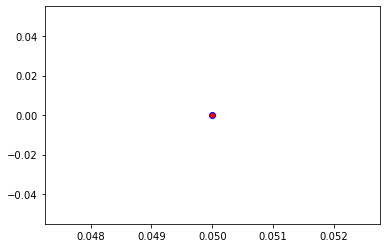

Counter: 464
000000537506 879 = umbrella
000000537672 707 = pay-phone
000000537802 850 = teddy
000000537812 861 = toilet seat
000000537827 981 = ballplayer
000000537964 637 = mailbox
000000537991 650 = microphone
000000538067 671 = mountain bike
000000538236 931 = bagel
000000538364 670 = motor scooter
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


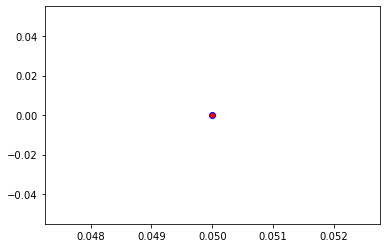

Counter: 465
000000538458 791 = shopping cart
000000539143 547 = electric locomotive
000000539445 547 = electric locomotive
000000539883 664 = monitor
000000539962 713 = pier
000000540280 879 = umbrella
000000540414 582 = grocery store
000000540466 879 = umbrella
000000540502 896 = washbasin
000000540928 361 = skunk
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


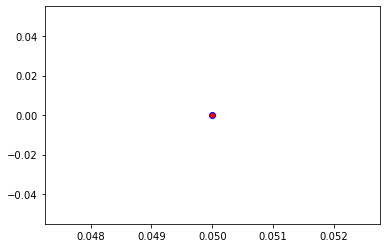

Counter: 466
000000540932 977 = sandbar
000000540962 526 = desk
000000541055 248 = ski
000000541123 781 = scoreboard
000000541291 743 = prison
000000541634 809 = soup bowl
000000541664 613 = joystick
000000541773 882 = vacuum
000000541952 557 = flagpole
000000542073 415 = bakery
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


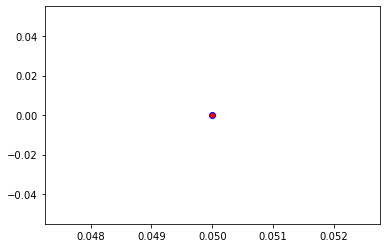

Counter: 467
000000542089 896 = washbasin
000000542127 248 = ski
000000542423 703 = park bench
000000542625 324 = cab
000000542776 158 = toy terrier
000000542856 874 = trolleybus
000000543043 705 = passenger car
000000543047 831 = studio couch
000000543300 536 = dock
000000543528 404 = airliner
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


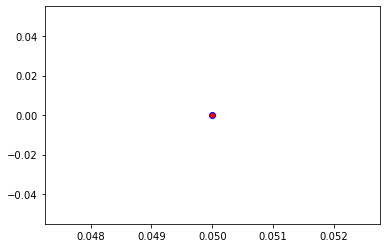

Counter: 468
000000543581 831 = studio couch
000000544052 870 = tricycle
000000544306 497 = church
000000544444 248 = ski
000000544519 419 = Band Aid
000000544565 960 = chocolate sauce
000000544605 919 = street sign
000000544811 144 = pelican
000000545007 708 = pedestal
000000545100 639 = suit
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


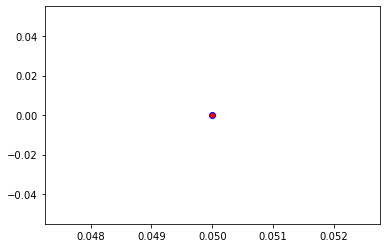

Counter: 469
000000545129 340 = zebra
000000545219 569 = garbage truck
000000545407 318 = wing
000000545594 654 = minibus
000000545730 99 = goose
000000545826 879 = umbrella
000000545958 343 = warthog
000000546011 340 = zebra
000000546219 762 = restaurant
000000546325 831 = studio couch
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.8], dtype=float32)>)
Model accuracy after perturbation: [0.19999999]


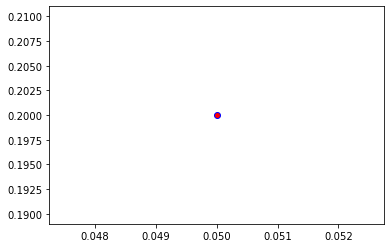

Counter: 470
000000546475 761 = remote control
000000546556 127 = white stork
000000546626 647 = measuring cup
000000546659 547 = electric locomotive
000000546717 611 = jigsaw puzzle
000000546823 873 = triumphal arch
000000546826 473 = can opener
000000546829 202 = soft-coated wheaten terrier
000000546964 762 = restaurant
000000546976 813 = spatula
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


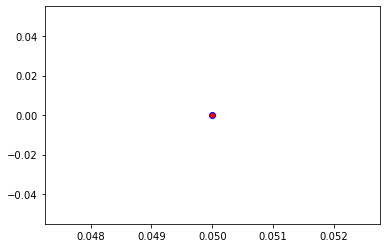

Counter: 471
000000547144 527 = desktop computer
000000547336 620 = laptop
000000547383 5 = ram
000000547502 162 = beagle
000000547519 294 = brown bear
000000547816 794 = shower curtain
000000547854 934 = hotdog
000000547886 354 = Arabian camel
000000548246 752 = racket
000000548267 979 = valley
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


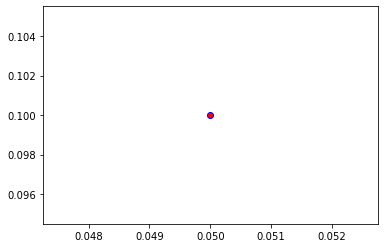

Counter: 472
000000548339 429 = baseball
000000548506 954 = banana
000000548524 460 = breakwater
000000548555 934 = hotdog
000000548780 655 = miniskirt
000000549055 864 = wreck
000000549136 358 = pole
000000549167 461 = plate
000000549220 355 = llama
000000549390 444 = bicycle-built-for-two
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


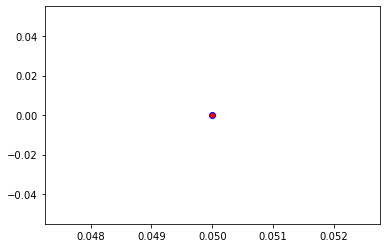

Counter: 473
000000549674 664 = monitor
000000549738 557 = flagpole
000000549930 879 = umbrella
000000550084 864 = tow truck
000000550322 473 = can opener
000000550349 625 = lifeboat
000000550426 883 = vase
000000550471 950 = orange
000000550691 874 = trolleybus
000000550714 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


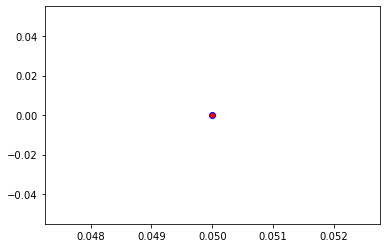

Counter: 474
000000550797 861 = toilet seat
000000550939 919 = street sign
000000551215 805 = soccer ball
000000551304 861 = toilet seat
000000551350 703 = park bench
000000551439 617 = lab coat
000000551660 937 = broccoli
000000551780 409 = analog clock
000000551794 665 = moped
000000551804 752 = racket
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


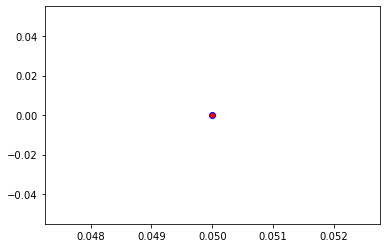

Counter: 475
000000551815 287 = lynx
000000551820 890 = volleyball
000000551822 960 = chocolate sauce
000000552371 339 = sorrel
000000552612 54 = hog
000000552775 827 = stove
000000552842 981 = ballplayer
000000552883 651 = microwave
000000552902 340 = zebra
000000553094 895 = warplane
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


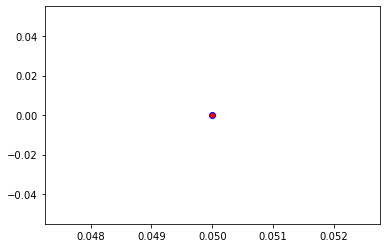

Counter: 476
000000553221 701 = parachute
000000553339 358 = pole
000000553511 920 = traffic light
000000553664 526 = desk
000000553669 703 = park bench
000000553731 731 = plunger
000000553776 670 = motor scooter
000000553788 681 = notebook
000000553990 339 = sorrel
000000554002 233 = Bouvier des Flandres
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


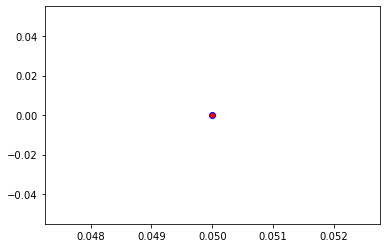

Counter: 477
000000554156 752 = racket
000000554266 887 = vestment
000000554291 162 = beagle
000000554328 515 = cowboy hat
000000554579 263 = Pembroke
000000554595 693 = paddle
000000554735 963 = pizza
000000554838 760 = refrigerator
000000555005 435 = bathtub
000000555009 664 = monitor
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


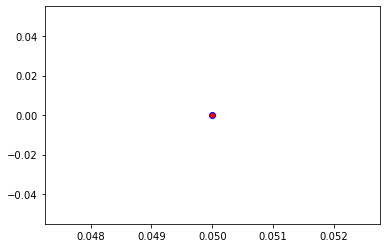

Counter: 478
000000555012 435 = bathtub
000000555050 829 = streetcar
000000555412 934 = hotdog
000000555597 497 = church
000000555705 282 = tiger cat
000000555972 532 = dining table
000000556000 776 = sax
000000556158 248 = ski
000000556193 882 = vacuum
000000556498 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


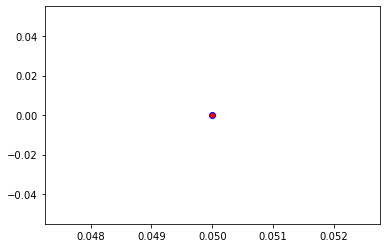

Counter: 479
000000556765 385 = Indian elephant
000000556873 835 = sundial
000000557172 896 = washbasin
000000557258 861 = toilet seat
000000557501 840 = swab
000000557672 879 = umbrella
000000557884 883 = vase
000000557916 116 = cradle
000000558073 435 = tub
000000558114 430 = basketball
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


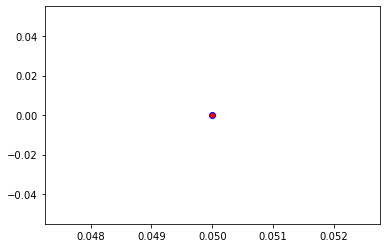

Counter: 480
000000558213 471 = cannon
000000558421 705 = passenger car
000000558558 920 = traffic light
000000558854 933 = cheeseburger
000000559099 37 = ox
000000559160 416 = balance beam
000000559348 981 = ballplayer
000000559513 461 = plate
000000559543 496 = Christmas stocking
000000559547 715 = pickelhaube
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


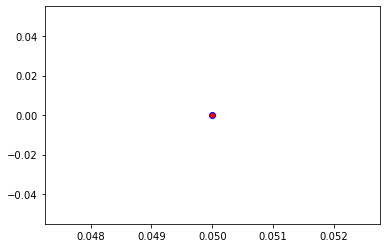

Counter: 481
000000559707 937 = broccoli
000000559842 805 = soccer ball
000000559956 5 = ram
000000560011 673 = mouse
000000560178 41 = hip
000000560256 954 = banana
000000560266 294 = brown bear
000000560279 896 = washbasin
000000560312 743 = prison
000000560371 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


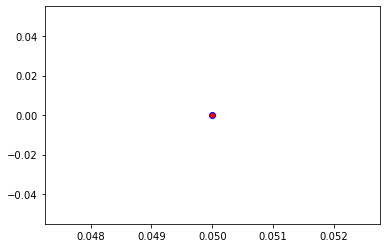

Counter: 482
000000560474 582 = grocery store
000000560880 471 = cannon
000000560911 457 = bow tie
000000561009 16 = bulbul
000000561223 842 = swimming trunks
000000561256 400 = gown
000000561335 472 = canoe
000000561366 673 = mouse
000000561465 962 = meat loaf
000000561679 919 = street sign
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


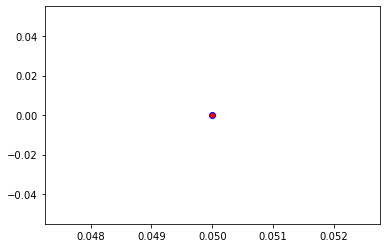

Counter: 483
000000561889 461 = plate
000000561958 248 = ski
000000562059 910 = wooden spoon
000000562121 340 = zebra
000000562197 937 = broccoli
000000562207 101 = tusker
000000562229 248 = ski
000000562243 906 = Windsor tie
000000562443 340 = zebra
000000562448 874 = trolleybus
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.699999988079071
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


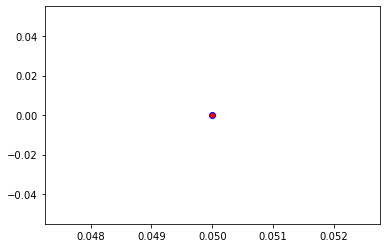

Counter: 484
000000562561 250 = Siberian husky
000000562581 722 = ping-pong ball
000000562818 140 = alp
000000562843 504 = coffee mug
000000563267 775 = sarong
000000563281 496 = Christmas stocking
000000563349 701 = parachute
000000563470 702 = parallel bars
000000563603 138 = bustard
000000563604 920 = traffic light
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


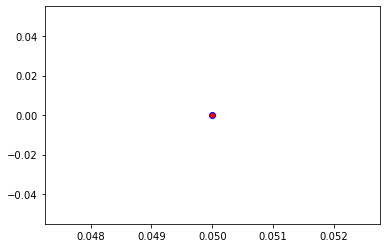

Counter: 485
000000563648 491 = chain saw
000000563653 920 = traffic light
000000563702 555 = fire engine
000000563758 191 = Airedale
000000563882 761 = remote control
000000564023 632 = loudspeaker
000000564091 611 = jigsaw puzzle
000000564127 861 = toilet seat
000000564133 101 = tusker
000000564280 172 = whippet
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


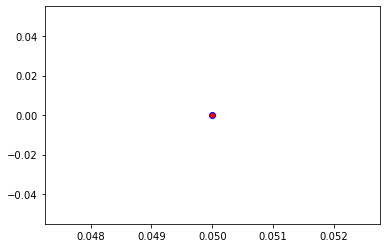

Counter: 486
000000564336 822 = steel drum
000000565012 829 = streetcar
000000565045 894 = wardrobe
000000565153 919 = street sign
000000565391 609 = jeep
000000565469 442 = bell cote
000000565563 704 = parking meter
000000565597 963 = pizza
000000565607 898 = water bottle
000000565624 385 = Indian elephant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


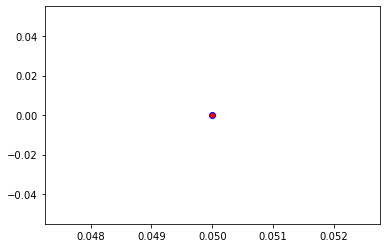

Counter: 487
000000565776 651 = microwave
000000565778 705 = passenger car
000000565853 598 = home theater
000000565877 681 = notebook
000000565962 715 = pickelhaube
000000565989 442 = bell cote
000000566042 172 = whippet
000000566282 880 = unicycle
000000566436 703 = park bench
000000566524 705 = passenger car
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


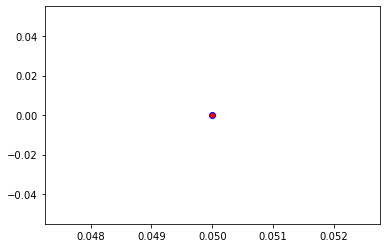

Counter: 488
000000566758 779 = school bus
000000566923 830 = stretcher
000000567011 814 = speedboat
000000567197 498 = cinema
000000567432 318 = wing
000000567640 805 = soccer ball
000000567740 248 = ski
000000567825 933 = cheeseburger
000000567886 850 = teddy
000000567898 712 = Petri dish
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


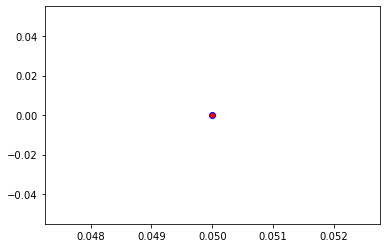

Counter: 489
000000568147 704 = parking meter
000000568195 809 = soup bowl
000000568213 805 = soccer ball
000000568290 874 = trolleybus
000000568439 829 = streetcar
000000568584 564 = four-poster
000000568690 861 = toilet seat
000000568710 811 = space heater
000000568814 784 = screwdriver
000000568981 615 = knee pad
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


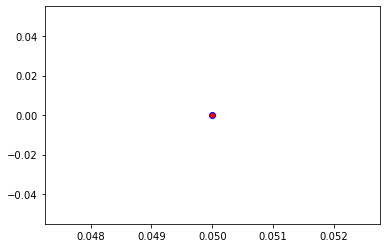

Counter: 490
000000569030 920 = traffic light
000000569059 526 = desk
000000569273 637 = mailbox
000000569565 779 = school bus
000000569700 883 = vase
000000569825 981 = ballplayer
000000569917 648 = medicine chest
000000569972 693 = paddle
000000569976 398 = abacus
000000570169 767 = rubber eraser
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


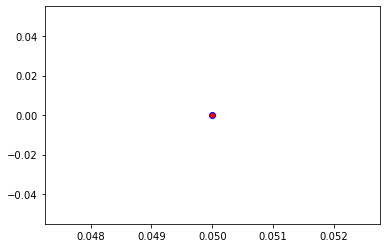

Counter: 491
000000570448 724 = pirate
000000570456 651 = microwave
000000570471 582 = grocery store
000000570539 865 = toyshop
000000570664 282 = tiger cat
000000570688 701 = parachute
000000570736 435 = bathtub
000000570756 978 = seashore
000000570782 527 = desktop computer
000000570834 671 = mountain bike
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


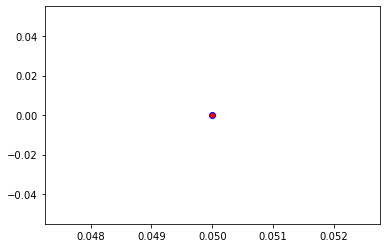

Counter: 492
000000571008 919 = street sign
000000571264 665 = moped
000000571313 453 = bookcase
000000571598 457 = bow tie
000000571718 954 = banana
000000571804 861 = toilet seat
000000571857 977 = sandbar
000000571893 579 = grand piano
000000571943 821 = steel arch bridge
000000572303 565 = freight car
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


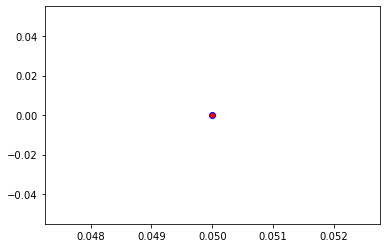

Counter: 493
000000572388 722 = ping-pong ball
000000572408 184 = Irish terrier
000000572462 829 = streetcar
000000572517 296 = ice bear
000000572555 547 = electric locomotive
000000572620 880 = unicycle
000000572678 762 = restaurant
000000572900 480 = cash machine
000000572956 670 = motor scooter
000000573008 460 = breakwater
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


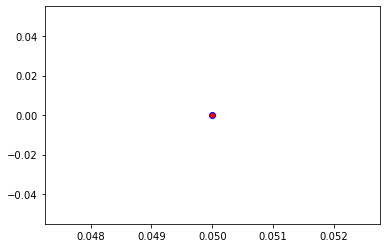

Counter: 494
000000573094 495 = china cabinet
000000573258 248 = ski
000000573391 342 = wild boar
000000573626 979 = valley
000000573943 582 = grocery store
000000574297 339 = sorrel
000000574315 281 = tabby
000000574425 864 = tow truck
000000574520 693 = paddle
000000574702 665 = moped
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


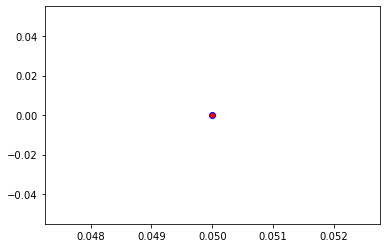

Counter: 495
000000574810 283 = Persian cat
000000574823 981 = ballplayer
000000575081 840 = swab
000000575187 150 = sea lion
000000575205 318 = wing
000000575243 576 = gondola
000000575357 184 = Irish terrier
000000575372 920 = traffic light
000000575500 954 = banana
000000575815 963 = pizza
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


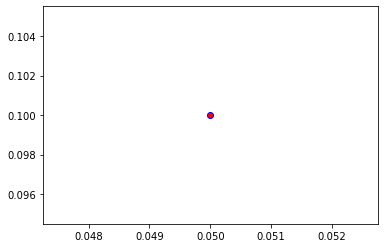

Counter: 496
000000575970 532 = dining table
000000576031 248 = ski
000000576052 140 = alp
000000576566 880 = unicycle
000000576654 701 = parachute
000000576955 562 = fountain
000000577149 340 = zebra
000000577182 703 = park bench
000000577539 928 = ice cream
000000577584 651 = microwave
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.9], dtype=float32)>)
Model accuracy after perturbation: [0.10000002]


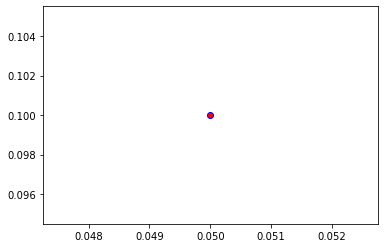

Counter: 497
000000577735 539 = doormat
000000577862 288 = leopard
000000577864 805 = soccer ball
000000577932 880 = unicycle
000000577959 977 = sandbar
000000577976 920 = traffic light
000000578093 705 = passenger car
000000578236 435 = bathtub
000000578489 831 = studio couch
000000578500 762 = restaurant
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


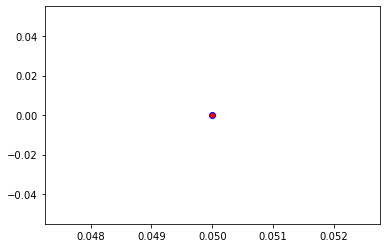

Counter: 498
000000578545 697 = pajama
000000578792 518 = crash helmet
000000578871 461 = plate
000000578922 883 = vase
000000578967 705 = passenger car
000000579070 720 = pill bottle
000000579091 937 = broccoli
000000579158 404 = airliner
000000579307 977 = sandbar
000000579321 201 = silky terrier
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.8999999761581421
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


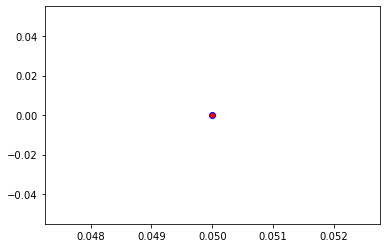

Counter: 499
000000579635 814 = speedboat
000000579655 678 = neck brace
000000579818 820 = steam locomotive
000000579893 919 = street sign
000000579900 963 = pizza
000000579902 518 = crash helmet
000000579970 799 = sliding door
000000580197 457 = bow tie
000000580294 909 = wok
000000580410 453 = bookcase
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 1.0
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


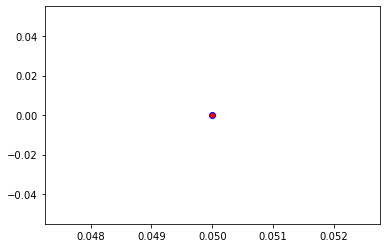

Counter: 500
000000580418 37 = ox
000000580757 704 = parking meter
000000581062 792 = shovel
000000581100 355 = llama
000000581206 934 = hotdog
000000581317 596 = hatchet
000000581357 248 = ski
000000581482 409 = analog clock
000000581615 861 = toilet seat
000000581781 954 = banana
Min values in image-array: -1.0 Max values in image-array: 1.0
Min values in image-array: 0.0 Max values in image-array: 1.0
Model accuracy on own images: 0.800000011920929
LinfFastGradientAttack(rel_stepsize=1.0, abs_stepsize=None, steps=1, random_start=False)
TensorFlowTensor(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)
Model accuracy after perturbation: [0.]


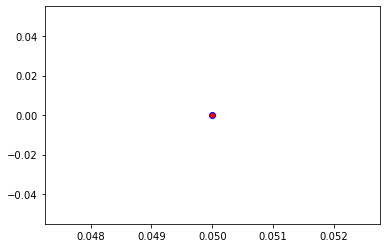

In [17]:
# Creates figure object containing image, class and class confidence
class MyFigure:
    def __init__(self, image , image_class, class_confidence):
        self.image = image
        self.image_class = image_class
        self.class_confidence = class_confidence

# instantiate the corresponding attack class
def attack_type(attack):
    if attack == 'LinfPGD':
        return fb.attacks.LinfProjectedGradientDescentAttack()
    elif attack == 'FGSM':
        return fb.attacks.LinfFastGradientAttack()
    elif attack == 'CW_L2':
        return fb.attacks.L2CarliniWagnerAttack()
    elif attack == 'DeepFool':
        return fb.attacks.L2DeepFoolAttack()
    else:
        print('Select valid attack')     

# divide files into successive n-sized chunks.
def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n): 
        yield l[i:i + n]

# Save images
def save_images(images):
    for x in range(0, len(images)):
        _, image_class, class_confidence = get_imagenet_label(image_probs)
        name = original_name[x]
        try:
            plt.imsave('adv_data_fgsm/{}.jpg'.format(original_name[x]), images[x].image)
        except:
            print('ERROR while saving')
        
# load images into a list
list_images = glob.glob('data/*.jpg')

# size of batches that are created from list of images
n = 10
batches = list(divide_chunks(list_images, n))
counter = 0

#steps = 10
#epsilons = np.linspace(0.0, 0.10, num=steps)
epsilons = [0.05]
attacks = ['LinfPGD',
          'FGSM',
          'CW_L2',
          'DeepFool']
attack = attack_type(attacks[1])

# for each batch do following steps
# 1: Process image and get original image name and predict class for image.
# 2: Convert the image pixel values and labels for foolbox approved type
# 3: Create attack
# 4: Save crafted images into folder

for batch in batches:
    own_images = [] #preprocessed images
    image_probabilities = []
    image_ids = []
    original_name = []
    counter += 1
    print('Counter:', counter)

    for fname in batch:
        image_name = fname.split('\\')[1].split('.').pop(0)
        original_name.append(image_name)
        image_raw = tf.io.read_file(fname)
        image = tf.image.decode_image(image_raw)
        image = preprocess(image)
        own_images.append(image)
        image_probs = pretrained_model.predict(image)
        image_probabilities.append(image_probs)
    if path.exists('adv_data_fgsm/{}'.format(image_name) + '.jpg'):
        print('Adversarial file exists')
        continue
    for x, y, name in zip(own_images, image_probabilities, original_name):
        #plt.figure()
        #plt.imshow(x[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]?
        _, image_class, class_confidence = get_imagenet_label(y)
        image_class = image_class.replace("_", " ")
        print(name, str(find_label_id(image_class)) + ' = ' + image_class) # if none error incurs later
        image_ids.append(find_label_id(image_class))
        #plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
        #plt.close()

    # Prints values of pixels
    print('Min values in image-array: ' + str(np.amin(own_images)) + ' Max values in image-array: ' + str(np.amax(own_images)))
    #Convert own images and corresponding labels for foolbox approved type
    own_images_tf = []
    own_labels_tf = tf.convert_to_tensor(image_ids, dtype=tf.int32)
    for x in own_images.copy():
        a = tf.squeeze(x)
        a = (a + 1.0)/2 # shift from [-1,1] to [0,1] with 0.5 mean
        own_images_tf.append(a)
    own_images_tf = tf.convert_to_tensor(own_images_tf, dtype=tf.float32)
    # Prints values of pixels after processing
    print('Min values in image-array: ' + str(np.amin(own_images_tf)) + ' Max values in image-array: ' + str(np.amax(own_images_tf)))
    # Testing that conversion works
    #fb.plot.images(own_images_tf)
    accuracy = fb.utils.accuracy(fmodel, own_images_tf, own_labels_tf)
    print('Model accuracy on own images:', accuracy)

    # use eagerpy tensors own images
    images = ep.astensor(own_images_tf)
    labels = ep.astensor(own_labels_tf)
    # all are tensors
    # raw = The raw adversarial examples. --> depends on attack
    # clipped = The clipped adversarial examples --> guaranteed to not be perturbed more than epsilon.
    # is_adv = boolean for each sample image. True if misclassified and within the epsilon balls around the clean sample.
    print(attack)
    raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)
    print(is_adv.float32().mean(axis=-1))
    robust_accuracy = 1 - is_adv.float32().mean(axis=-1)
    # show accuracy vs epsilons
    print('Model accuracy after perturbation:', robust_accuracy.numpy())
    plt.plot(epsilons, robust_accuracy.numpy(), color='blue', linestyle='solid', marker='o', markerfacecolor='red')
    plt.show()
    plt.close()

    for perturbed_step, epsilon in zip(clipped, epsilons):
        list_of_figures = []

        for x in perturbed_step:
            x = x.numpy()
            image = np.expand_dims(x, axis=0)
            image_probs = pretrained_model.predict(image)
            _, image_class, class_confidence = get_imagenet_label(image_probs)       

            #create fig object
            a = MyFigure(x, image_class, class_confidence)
            list_of_figures.append(a)

        save_images(list_of_figures)

Epsilon value of adversary: 0.05


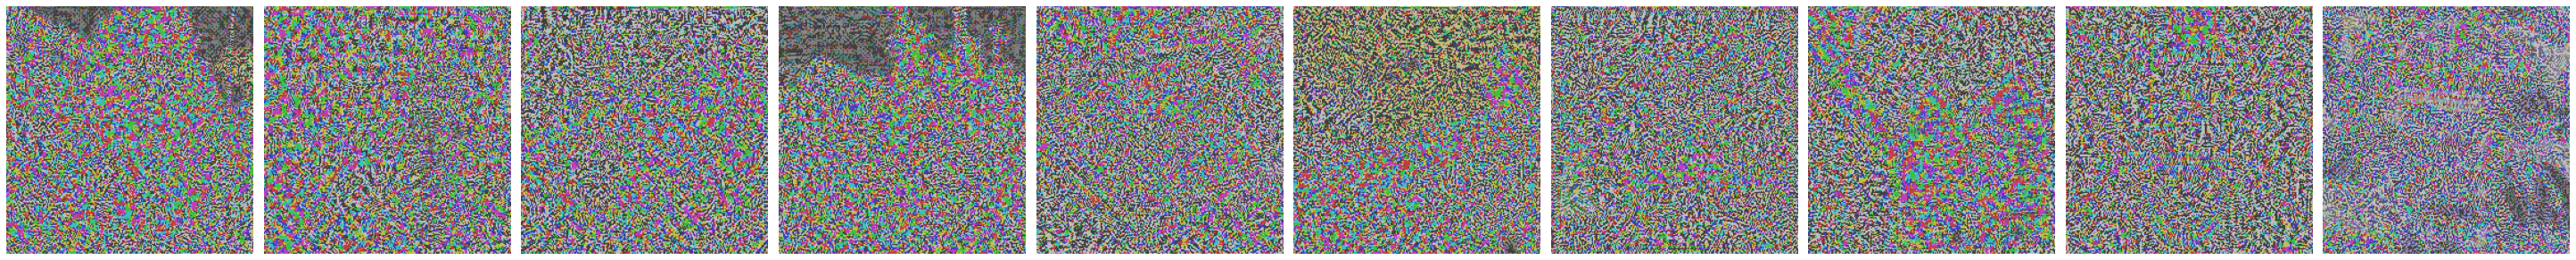

In [18]:
# show adversary
for adversary, epsilon in zip(clipped, epsilons):
    print('Epsilon value of adversary:', str(epsilon))
    fb.plot.images(adversary - images, bounds=(-0.1, 0.1), scale=4.)
    plt.show()
    plt.close()

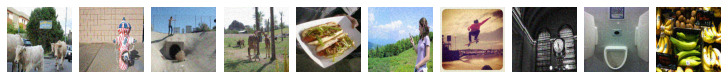

In [19]:
# show adversarial images using fb.plot
for adversary in clipped:
    fb.plot.images(adversary)
    plt.show()
    plt.close()

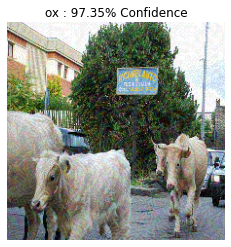

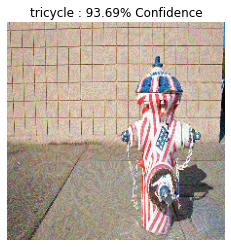

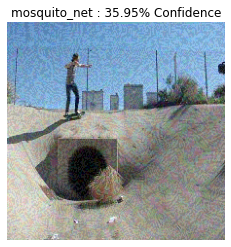

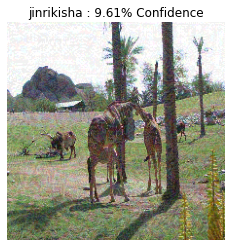

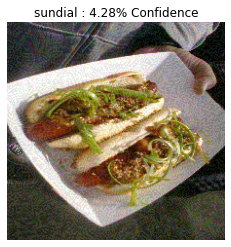

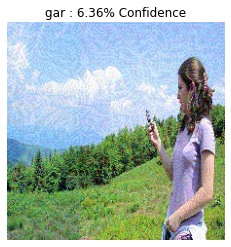

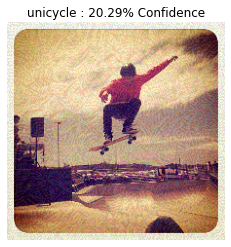

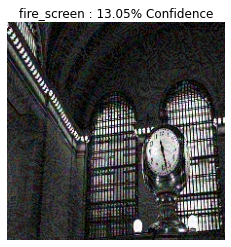

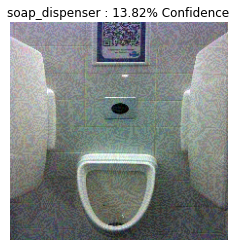

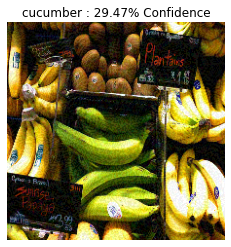

In [20]:
# helper variables for visualizing only one image
row_number = 0 # 0-len(epsilon)

raw_adversarial_images = raw[row_number].numpy()
clipped_adversarial_images = clipped[row_number].numpy()

# Predict adversarial image and show visualization
for x in clipped_adversarial_images:
    image = np.expand_dims(x, axis=0)
    image_probs = pretrained_model.predict(image)
    plt.figure()
    plt.imshow(x)  # To change [-1, 1] to [0,1] #  * 0.5 + 0.2
    _, image_class, class_confidence = get_imagenet_label(image_probs)
    plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
    plt.axis('off')
    plt.show()